# עבודת סיכום מס' 4

In [1]:
library(DBI)
library(odbc)
library(RSQLite)
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
#sort(unique(odbcListDrivers()[[1]]))

In [4]:
#con <- dbConnect(odbc(), 
     #            Driver = "SQL Server", 
      #           Server = "DESKTOP-AAGNMGA\\SQLEXPRESS", 
       #          Database = "BoxOffice", 
        #         Trusted_Connection = "True")

In [5]:
 #movies_ff <- dbReadTable(con,"movies_ff_v")

In [6]:
 #save(movies_ff,file="C:/Users/Mayer/Documents/DataScience/data/BoxOffice_ff.RData")

In [7]:
 BoxOffice_ff <- load("C:/Users/Mayer/Documents/DataScience/data/BoxOffice_ff.RData")

In [8]:
head(movies_ff)

movie_id original_language release_date runtime_cat runtime budget  
1 1        en                2015-02-20   Short        93     14000000
2 2        en                2004-08-06   Medium      113     40000000
3 3        en                2014-10-10   Medium      105      3300000
4 4        hi                2012-03-09   Large       122      1200000
5 5        ko                2009-02-05   Medium      118            0
6 6        en                1987-08-06   Short        83      8000000
  popularity revenue  sw_lang_en sw_web_presence ... depart_Camera_female
1  6.575393  12314651 1          0               ... 0                   
2  8.248895  95149435 1          0               ... 0                   
3 64.299990  13092000 1          1               ... 0                   
4  3.174936  16000000 0          1               ... 0                   
5  1.148070   3923970 0          0               ... 0                   
6  0.743274   3261638 1          0               ... 0                   
  depart_Crew_female depart_Custom_Mkup_female depart_Directing_female
1 0                  0                         0                      
2 0                  0                         0                      
3 1                  0                         0                      
4 0                  0                         0                      
5 0                  0                         0                      
6 0                  0                         0                      
  depart_Editing_female depart_Lighting_female depart_Production_female
1 0                     0                      0                       
2 0                     0                      3                       
3 0                     0                      2                       
4 0                     0                      0                       
5 0                     0                      0                       
6 0                     0                      0                       
  depart_Sound_female depart_Visual_Effects_female depart_Writing_female
1 0                   0                            0                    
2 0                   0                            1                    
3 0                   0                            0                    
4 0                   0                            0                    
5 0                   0                            0                    
6 0                   0                            0

### Exploratory data analysis - חלק 2 - בדיקת הנתונים

##  2.1 Descriptive Statistics for BoxOffice

In [6]:
summary(movies_ff)

    movie_id    original_language  release_date       runtime_cat       
 Min.   :   1   Length:7375        Length:7375        Length:7375       
 1st Qu.:1848   Class :character   Class :character   Class :character  
 Median :3696   Mode  :character   Mode  :character   Mode  :character  
 Mean   :3698                                                           
 3rd Qu.:5550                                                           
 Max.   :7398                                                           
                                                                        
    runtime          budget            popularity         revenue         
 Min.   :  0.0   Min.   :        0   Min.   :  0.000   Min.   :1.000e+00  
 1st Qu.: 94.0   1st Qu.:        0   1st Qu.:  3.970   1st Qu.:2.405e+06  
 Median :104.0   Median :  8000000   Median :  7.456   Median :1.693e+07  
 Mean   :107.7   Mean   : 22666657   Mean   :  8.540   Mean   :6.688e+07  
 3rd Qu.:118.0   3rd Qu.: 29000000   3rd 

In [21]:
rapply(movies_ff,function(x)length(unique(x)))

movie_id            original_language 
                        7375                           44 
                release_date                  runtime_cat 
                        4697                            3 
                     runtime                       budget 
                         168                          704 
                  popularity                      revenue 
                        7371                         2845 
                  sw_lang_en              sw_web_presence 
                           2                            2 
               sw_has_poster                   sw_tagline 
                           2                            2 
                release_year                release_month 
                          99                           13 
          high_release_month                  release_day 
                           2                           32 
                 seasonality                sw_collection 
                          13                            3 
               producers_cnt                countries_cnt 
                          25                           12 
                     lang_US                      lang_FR 
                           2                            2 
                     lang_RU                      lang_ES 
                           2                            2 
                     lang_JA                 keywords_cnt 
                           2                           46 
           actor0_movies_cnt         actor0_movies_5y_cnt 
                          61                           17 
           actor1_movies_cnt         actor1_movies_5y_cnt 
                          59                           18 
           actor2_movies_cnt         actor2_movies_5y_cnt 
                          53                           16 
            sw_female_actor0             sw_female_actor1 
                           3                            3 
            sw_female_actor2               sw_male_actor0 
                           3                            3 
              sw_male_actor1               sw_male_actor2 
                           3                            3 
         actor0_prev_revenue          actor1_prev_revenue 
                        1152                         1265 
         actor2_prev_revenue          director_movies_cnt 
                        1341                           30 
      director_movies_5y_cnt              genre_adventure 
                           7                            2 
               genre_fantasy              genre_animation 
                           2                            2 
                 genre_drama                 genre_horror 
                           2                            2 
                genre_action                 genre_comedy 
                           2                            2 
               genre_history                genre_western 
                           2                            2 
              genre_thriller                  genre_crime 
                           2                            2 
           genre_documentary        genre_science_fiction 
                           2                            2 
               genre_mystery                  genre_music 
                           2                            2 
               genre_romance                 genre_family 
                           2                            2 
                   genre_war                genre_foreign 
                           2                            2 
                  depart_Art                depart_Camera 
                          35                           24 
                 depart_Crew           depart_Custom_Mkup 
                          51                           28 
            depart_Directing               depart_Editing 
                          24                           17 
        

In [11]:
#install.packages("pastecs")
library(pastecs)
options(scipen=100)
options(digits=2)
stat.desc(movies_ff[,5:84], basic=TRUE, desc=TRUE, norm=FALSE, p=0.95)

runtime   budget             popularity   revenue            
nbr.val        7370.00             7375.0  7375.000000              2993.0
nbr.null         19.00             2012.0     0.000000                 0.0
nbr.na            5.00                0.0     0.000000              4382.0
min               0.00                0.0     0.000001                 1.0
max             338.00        380000000.0   547.488298        1519557910.0
range           338.00        380000000.0   547.488297        1519557909.0
sum          794097.00     167166594664.0 62980.853408      200169779760.0
median          104.00          8000000.0     7.455875          16928137.0
mean            107.75         22666656.9     8.539777          66879311.6
SE.mean           0.25           430697.4     0.141787           2516188.3
CI.mean.0.95      0.49           844290.0     0.277944           4933634.3
var             458.50 1368064367130662.0   148.264338 18949292507956320.0
std.dev          21.41         36987354.2    12.176384         137656429.2
coef.var          0.20                1.6     1.425843                 2.1
             sw_lang_en sw_web_presence sw_has_poster sw_tagline release_year 
nbr.val      7375.0000  7375.0000       7375.00000    7375.0000      7374.0000
nbr.null     1039.0000  5012.0000          2.00000    1442.0000         0.0000
nbr.na          0.0000     0.0000          0.00000       0.0000         1.0000
min             0.0000     0.0000          0.00000       0.0000      1918.0000
max             1.0000     1.0000          1.00000       1.0000      2017.0000
range           1.0000     1.0000          1.00000       1.0000        99.0000
sum          6336.0000  2363.0000       7373.00000    5933.0000  14745625.0000
median          1.0000     0.0000          1.00000       1.0000      2004.0000
mean            0.8591     0.3204          0.99973       0.8045      1999.6779
SE.mean         0.0041     0.0054          0.00019       0.0046         0.1790
CI.mean.0.95    0.0079     0.0107          0.00038       0.0091         0.3510
var             0.1211     0.2178          0.00027       0.1573       236.3624
std.dev         0.3479     0.4667          0.01647       0.3966        15.3741
coef.var        0.4050     1.4565          0.01647       0.4930         0.0077
             release_month ... depart_Camera_female depart_Crew_female
nbr.val       7374.000     ... 7341.0000            7341.0000         
nbr.null         0.000     ... 7194.0000            6971.0000         
nbr.na           1.000     ...   34.0000              34.0000         
min              1.000     ...    0.0000               0.0000         
max             12.000     ...    3.0000              10.0000         
range           11.000     ...    3.0000              10.0000         
sum          50471.000     ...  150.0000             473.0000         
median           7.000     ...    0.0000               0.0000         
mean             6.844     ...    0.0204               0.0644         
SE.mean          0.039     ...    0.0017               0.0039         
CI.mean.0.95     0.077     ...    0.0033               0.0077         
var             11.468     ...    0.0211               0.1126         
std.dev          3.386     ...    0.1453               0.3356         
coef.var         0.495     ...    7.1103               5.2080         
             depart_Custom_Mkup_female depart_Directing_female
nbr.val      7341.0000                 7341.0000              
nbr.null     5293.0000                 6297.0000              
nbr.na         34.0000                   34.0000              
min             0.0000                    0.0000              
max             6.0000                    4.0000              
range           6.0000                    4.0000              
sum          2595.0000                 1127.0000              
median          0.0000                    0.0000              
mean            0.3535                    0.1535              
SE.mean 

###  2.2 Plots

Warning message:
"Ignoring unknown parameters: main"


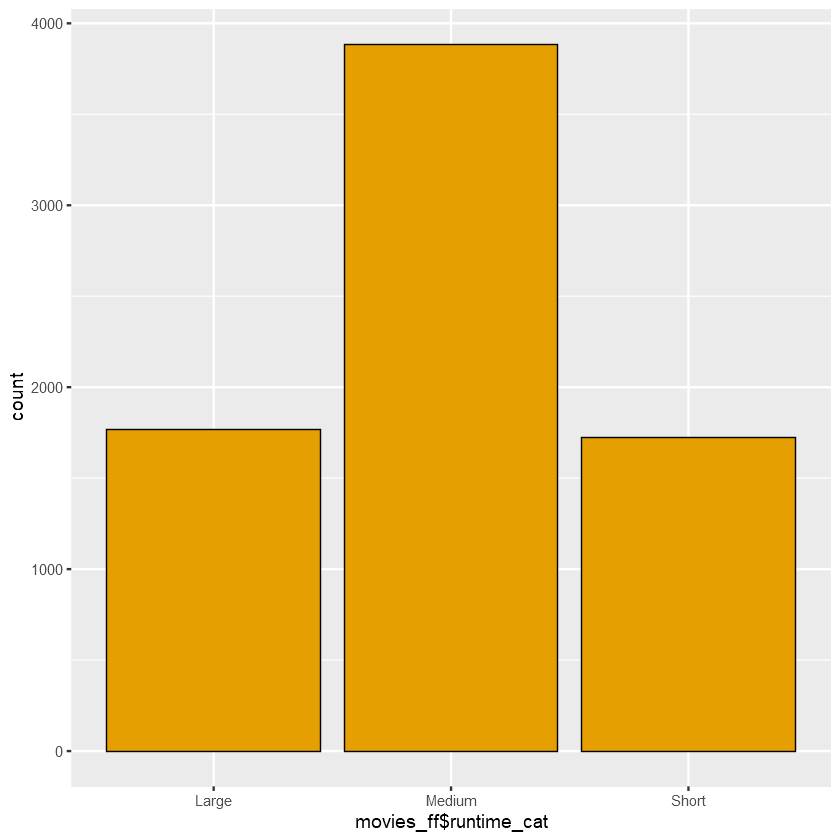

In [5]:
#Runtime_cat
ggplot(movies_ff, aes(movies_ff$runtime_cat)) +
  geom_bar(fill = "#E69F00",color = "black",size = 0.3, main = "runtime_cat")  + theme_get()
options(repr.plot.width = 8, repr.plot.height = 4)

### Runtime Analysis

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 5 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 5 rows containing non-finite values (stat_density)."


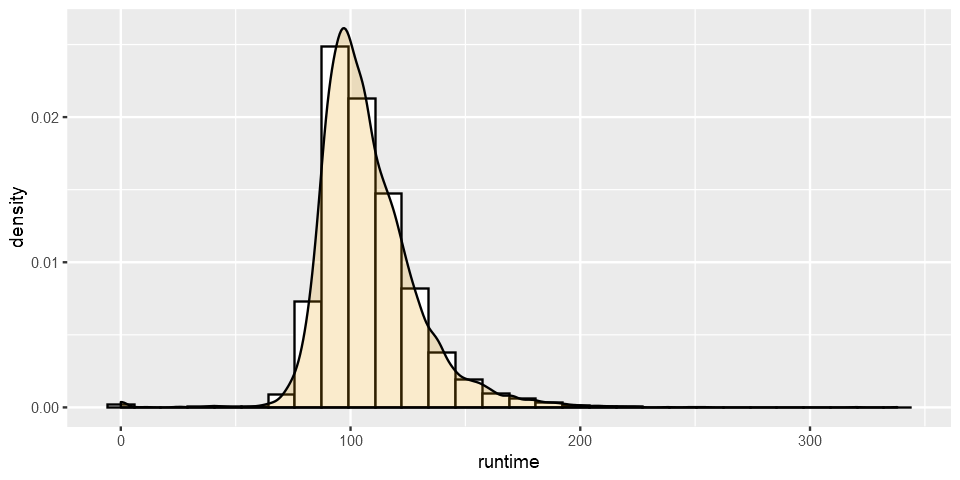

In [51]:
# Runtime
ggplot(movies_ff, aes(x=runtime)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white")+
 geom_density(alpha=0.2, fill="#E69F00") + theme_get()
options(repr.plot.width = 10, repr.plot.height = 4)

Warning message:
"Removed 5 rows containing missing values (geom_point)."


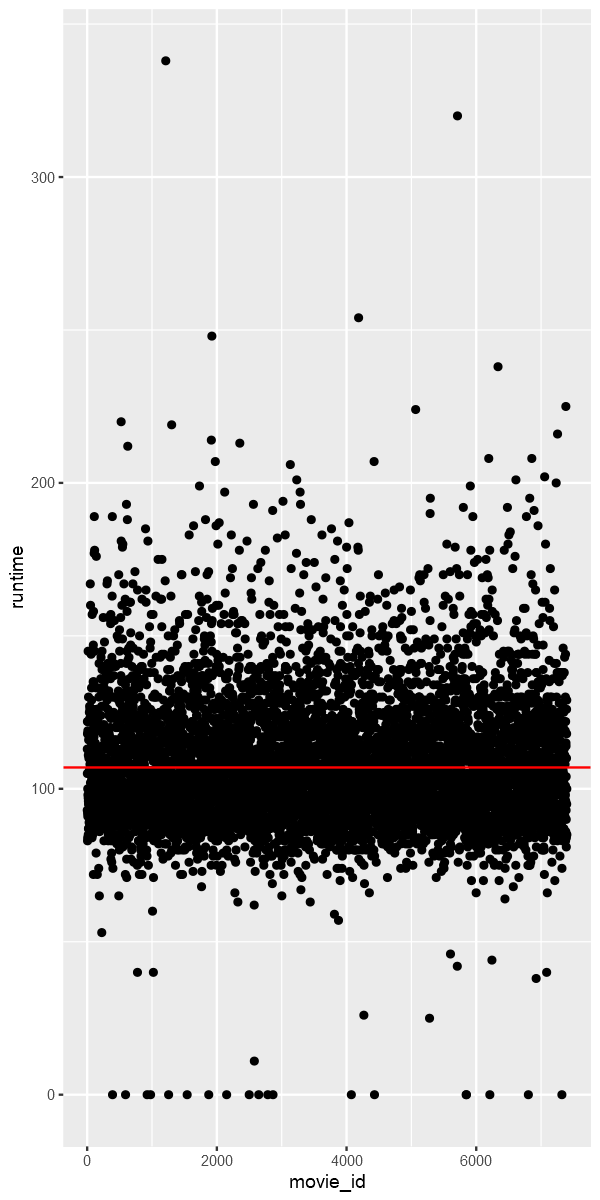

In [68]:
#Runtime Outliers
ggplot(data=movies_ff) +
    geom_point(aes(x=movie_id, y=runtime)) +
    geom_hline(yintercept = 107 ,color="red")

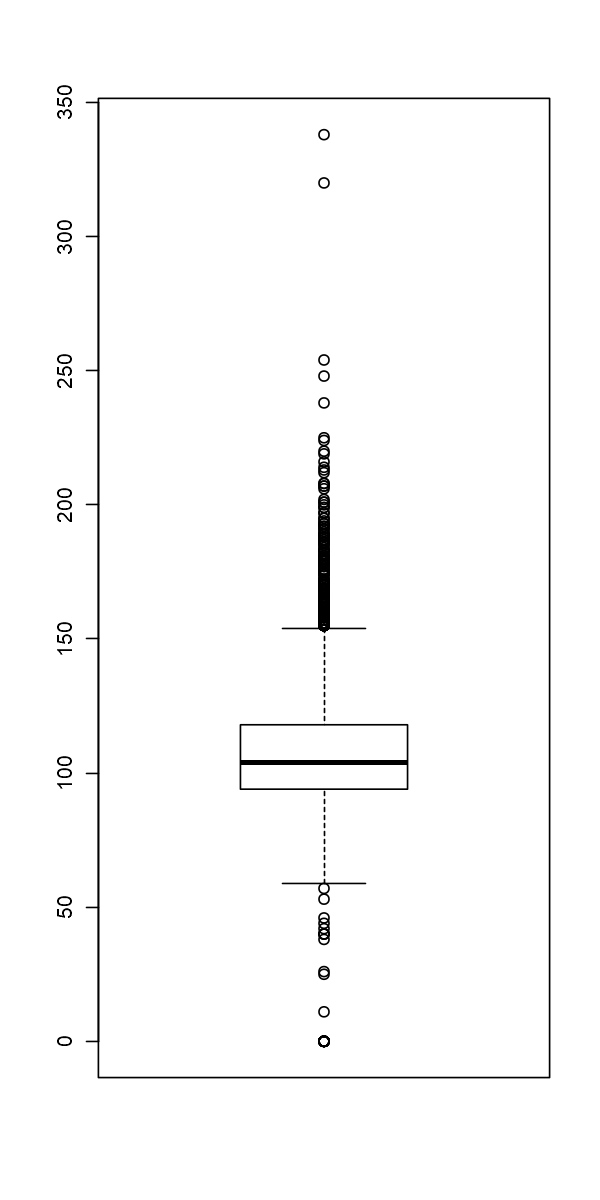

In [65]:
out_runtime <- boxplot(movies_ff$runtime)
options(repr.plot.width = 5, repr.plot.height =10)

In [245]:
head(out_runtime$out) # outlier
min(out_runtime$out) #  minimum outlier
max(out_runtime$out)
median(out_runtime$out)
mean(out_runtime$out)

[1] 167 160 157 158 177 189

[1] 0

[1] 338

[1] 165

[1] 156

### Budget Analysis

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2012 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2012 rows containing non-finite values (stat_density)."


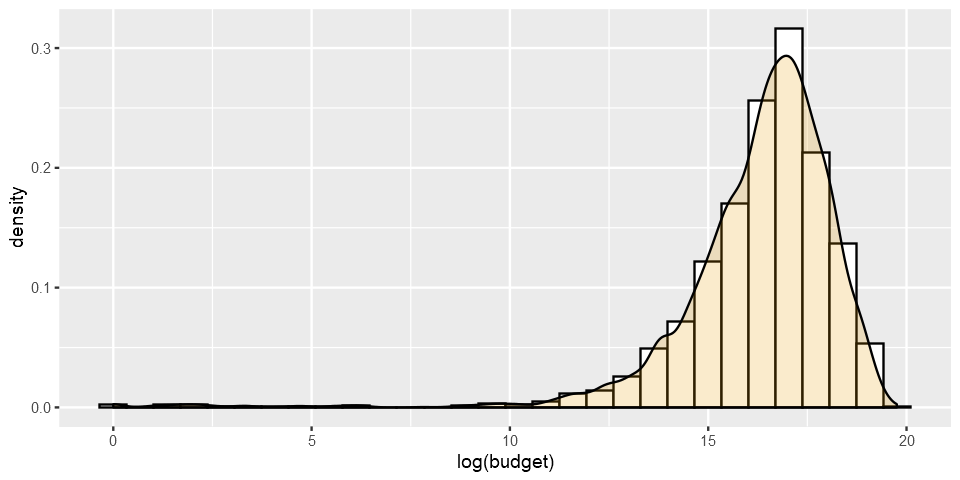

In [29]:
# Budget
ggplot(movies_ff, aes(x=log(budget))) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white")+
 geom_density(alpha=0.2, fill="#E69F00") + theme_get()
options(repr.plot.width = 5, repr.plot.height = 3)

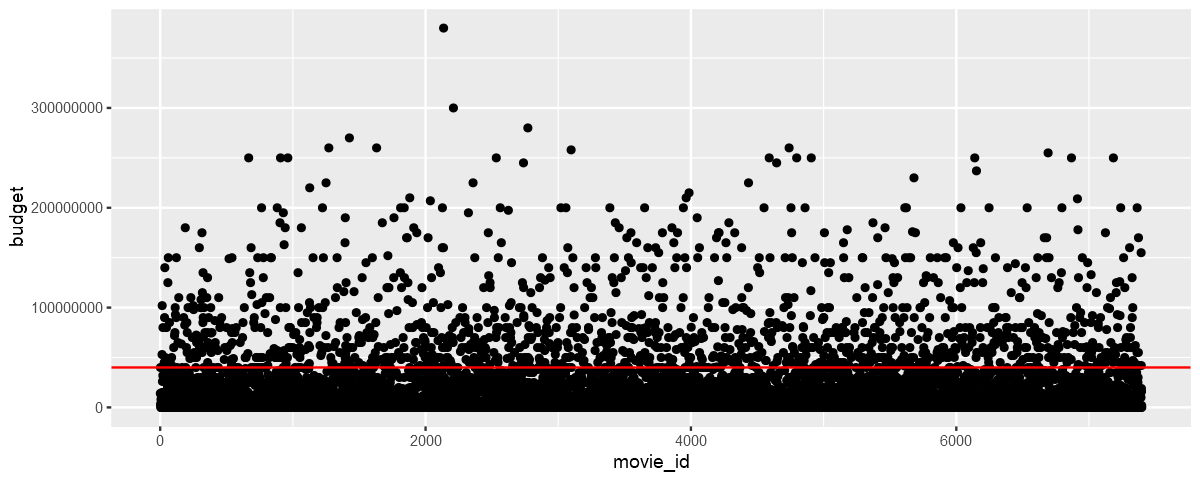

In [56]:
#Budget Outliers
ggplot(data=movies_ff) +
    geom_point(aes(x=movie_id, y=budget)) +
    geom_hline(yintercept = 40000000 ,color="red")

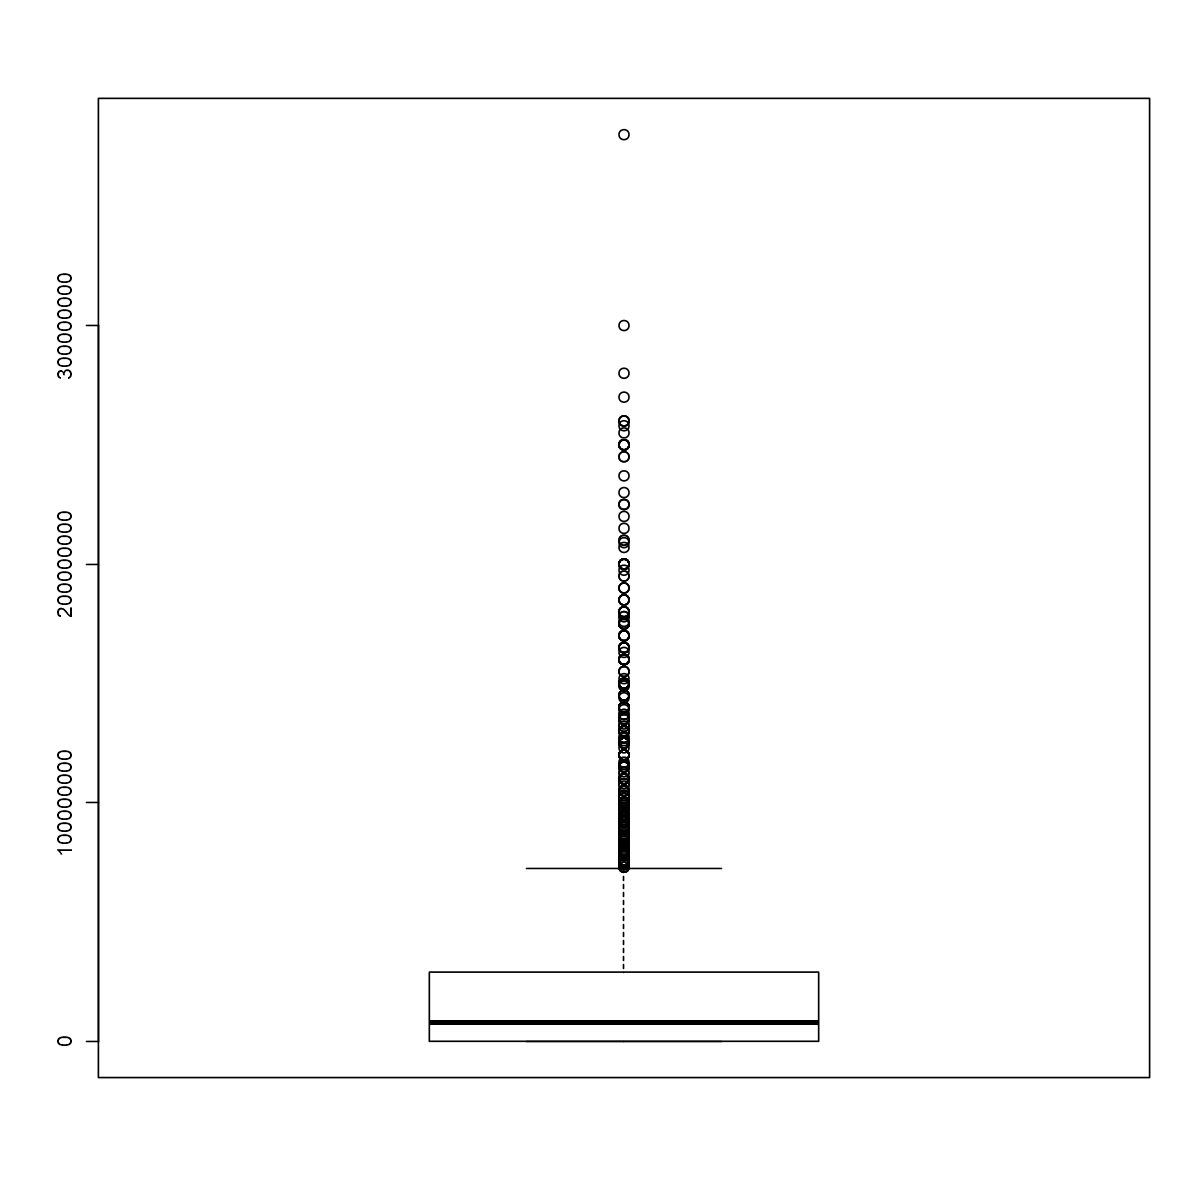

In [37]:
out_budget <- boxplot(movies_ff$budget)
options(repr.plot.width = 5, repr.plot.height =10)

In [244]:
head(out_budget$out) # outlier
min(out_budget$out) #  minimum outlier
max(out_budget$out) 
median(out_budget$out)
mean(out_budget$out)

[1] 102000000  80000000  90000000 140000000  80000000 125000000

[1] 73000000

[1] 380000000

[1] 105000000

[1] 121655977

### Original_language Analysis

In [72]:
table(movies_ff$original_language)


  af   ar   bm   bn   ca   cn   cs   da   de   el   en   es   fa   fi   fr   he 
   1    1    2    3    1   41    3   17   49    3 6336   95    5    3  199    6 
  hi   hu   id   is   it   ja   ka   kn   ko   ml   mr   nb   nl   no   pl   pt 
 118    4    3    1   55   90    1    1   48   12    1    1   11    5    5   13 
  ro   ru   sr   sv   ta   te   th   tr   ur   vi   xx   zh 
   8  105    3   20   31    9    5    9    2    1    2   46 

In [20]:
#Original_language
ggplot(movies_ff, aes(movies_ff$original_language)) +
  geom_bar(color = "black", fill = "#E69F00")  + theme_get()
options(repr.plot.width = 20, repr.plot.height = 7)

### Popularity Analysis

In [18]:
#Popularity
ggplot(movies_ff, aes(sqrt(log(popularity)))) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white")+
 geom_density(alpha=0.2, fill="#E69F00") + theme_get()

Warning message in sqrt(log(popularity)):
"NaNs produced"
Warning message in sqrt(log(popularity)):
"NaNs produced"
Warning message in sqrt(log(popularity)):
"NaNs produced"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 573 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 573 rows containing non-finite values (stat_density)."


In [25]:
#Popularity Outliers
ggplot(data=movies_ff) +
    geom_point(aes(x=movie_id, y=popularity)) +
    geom_hline(yintercept = 25 ,color="red")

In [39]:
out_popularity <- boxplot(movies_ff$popularity)
options(repr.plot.width = 5, repr.plot.height =5)

In [129]:
head(out_popularity$out) # outlier
min(out_popularity$out) #  minimum outlier
max(out_popularity$out) #  maximum outlier
median(out_popularity$out)
mean(out_popularity$out)

[1] 64 23 25 32 22 29

[1] 21

[1] 547

[1] 30

[1] 47

### Revenue Analysis

In [22]:
# Revenue
ggplot(movies_ff, aes(x=log(revenue))) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white")+
 geom_density(alpha=0.2, fill="#E69F00") + theme_get()
options(repr.plot.width = 15, repr.plot.height = 9)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 4382 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."


In [18]:
#Revenue Outliers
ggplot(data=movies_ff) +
    geom_point(aes(x=movie_id, y=revenue)) + 
    xlim (0,3500) +
    geom_hline(yintercept = 130000000 ,color="red")

Warning message:
"Removed 4382 rows containing missing values (geom_point)."


Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"


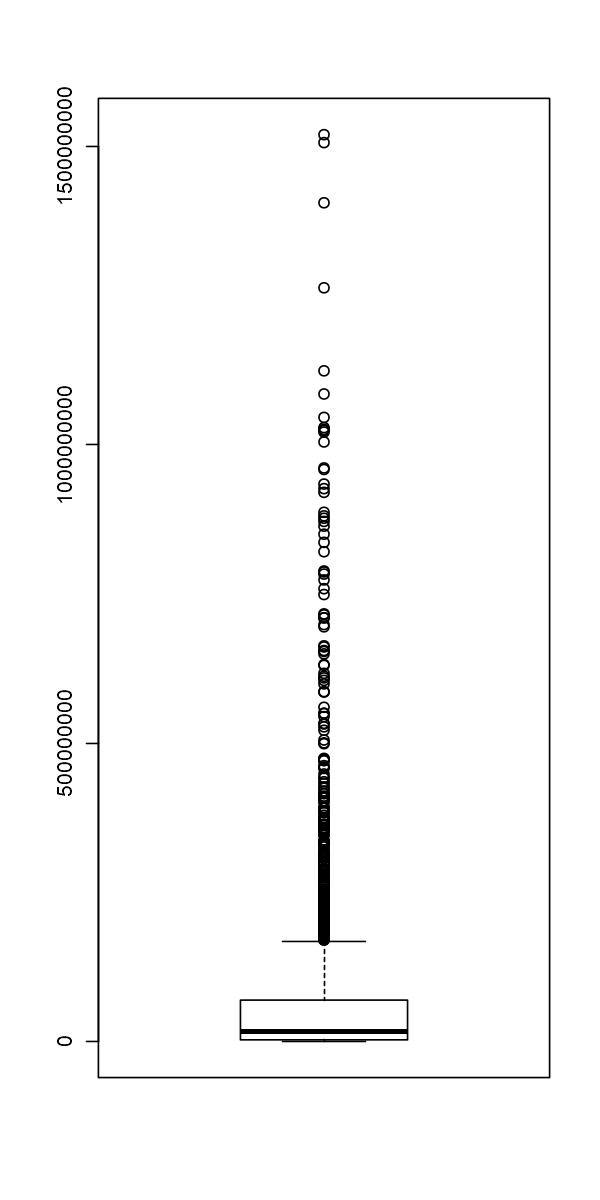

In [41]:
out_revenue <- boxplot(movies_ff$revenue)
options(repr.plot.width = 5, repr.plot.height =15)

In [128]:
head(out_revenue$out) # outlier
min(out_revenue$out) #  minimum outlier
max(out_revenue$out) #  maximum outlier
median(out_revenue$out)
mean(out_revenue$out)

[1] 356296601 358372926 426480871 258022233 189859560 660940780

[1] 169852759

[1] 1519557910

[1] 288752301

[1] 376550319

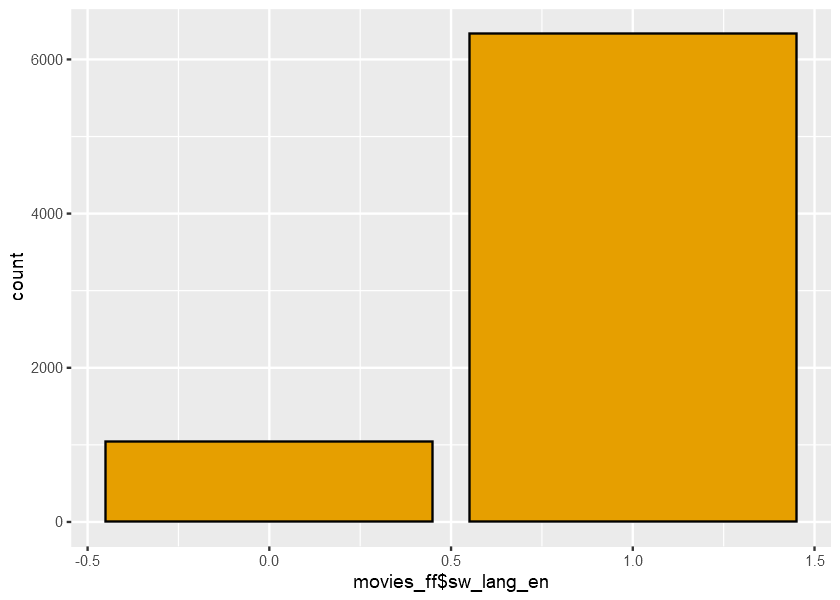

In [43]:
# sw_lang_en
ggplot(movies_ff, aes(movies_ff$sw_lang_en)) + 
    geom_bar(color = "black", fill = "#E69F00")  + 
    theme_get()
   options(repr.plot.width = 7, repr.plot.height = 5)

In [71]:
# sw_web_presence
ggplot(movies_ff, aes(movies_ff$sw_web_presence)) + 
    geom_bar(color = "black", fill = "#E69F00")  + 
    theme_get()
   options(repr.plot.width = 7, repr.plot.height = 5)

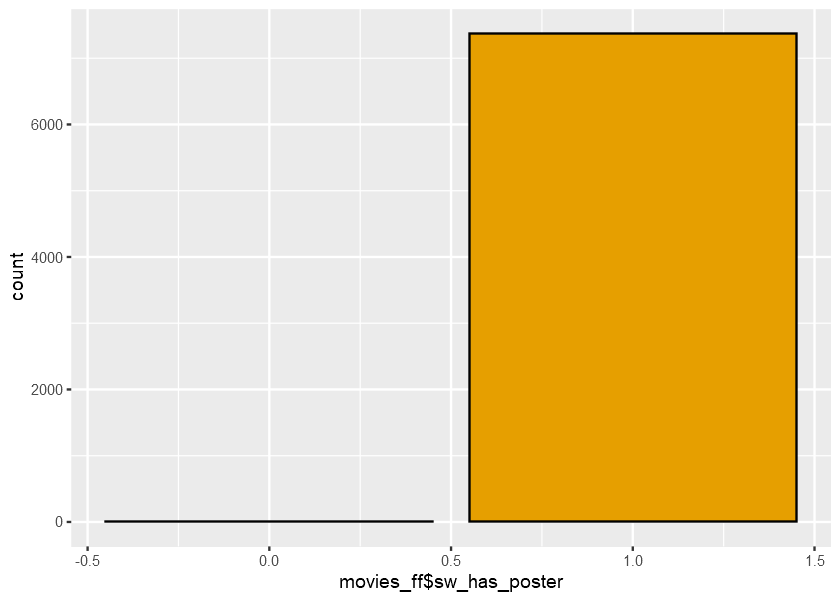

In [46]:
# sw_has_poster
ggplot(movies_ff, aes(movies_ff$sw_has_poster)) + 
    geom_bar(color = "black", fill = "#E69F00")  + 
    theme_get()
   options(repr.plot.width = 7, repr.plot.height = 5)

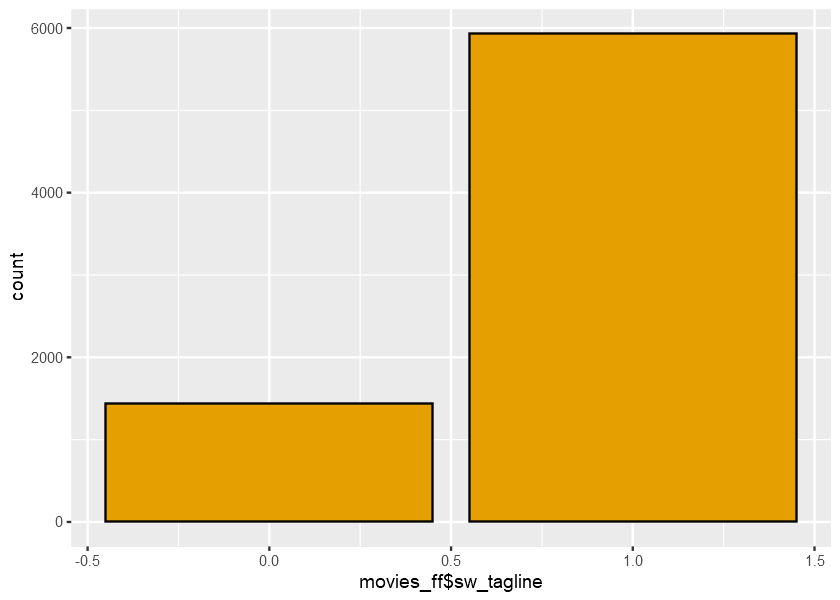

In [48]:
# sw_tagline
ggplot(movies_ff, aes(movies_ff$sw_tagline)) + 
    geom_bar(color = "black", fill = "#E69F00")  + 
    theme_get()
   options(repr.plot.width = 7, repr.plot.height = 5)

### Release Date Analysis

In [77]:
# release_year
ggplot(movies_ff, aes(x=movies_ff$release_year)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white",bins = 50)+
 geom_density(alpha=0.2, fill="#E69F00") + theme_get()
options(repr.plot.width = 15, repr.plot.height = 5)

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 1 rows containing non-finite values (stat_density)."


In [78]:
# release_month
ggplot(movies_ff, aes(movies_ff$release_month)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    theme_get()+
    geom_hline(yintercept =  mean(movies_ff$release_month),na.rm=T,col="red")
   options(repr.plot.width = 7, repr.plot.height = 5)

Warning message:
"Removed 1 rows containing non-finite values (stat_count)."



  1   2   3   4   5   6   7   8   9  10  11  12 
510 518 561 557 582 594 564 657 902 695 540 694 

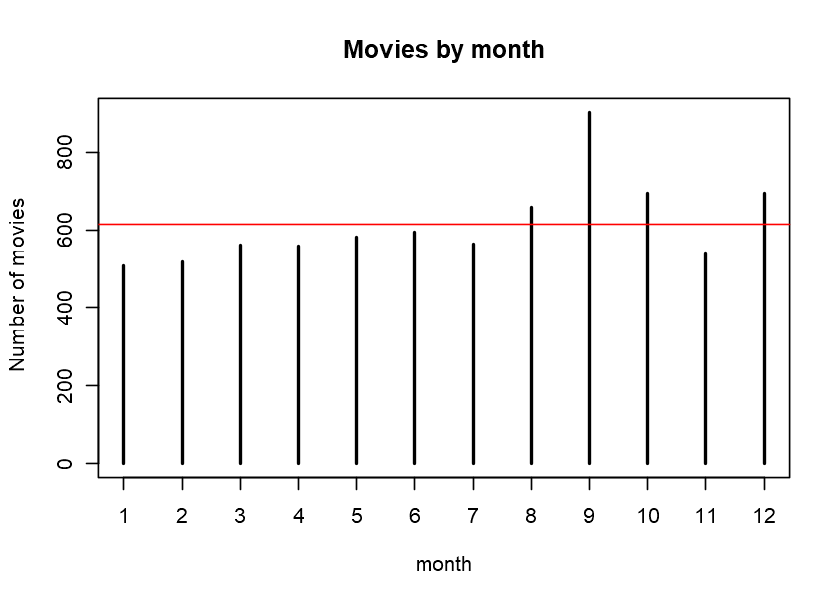

In [89]:
table(movies_ff$release_month)
plot(table(movies_ff$release_month), ylab="Number of movies",xlab="month",main="Movies by month")
abline(h=mean(table(movies_ff$release_month),na.rm = TRUE),col="red")

Warning message:
"Removed 1 rows containing non-finite values (stat_count)."


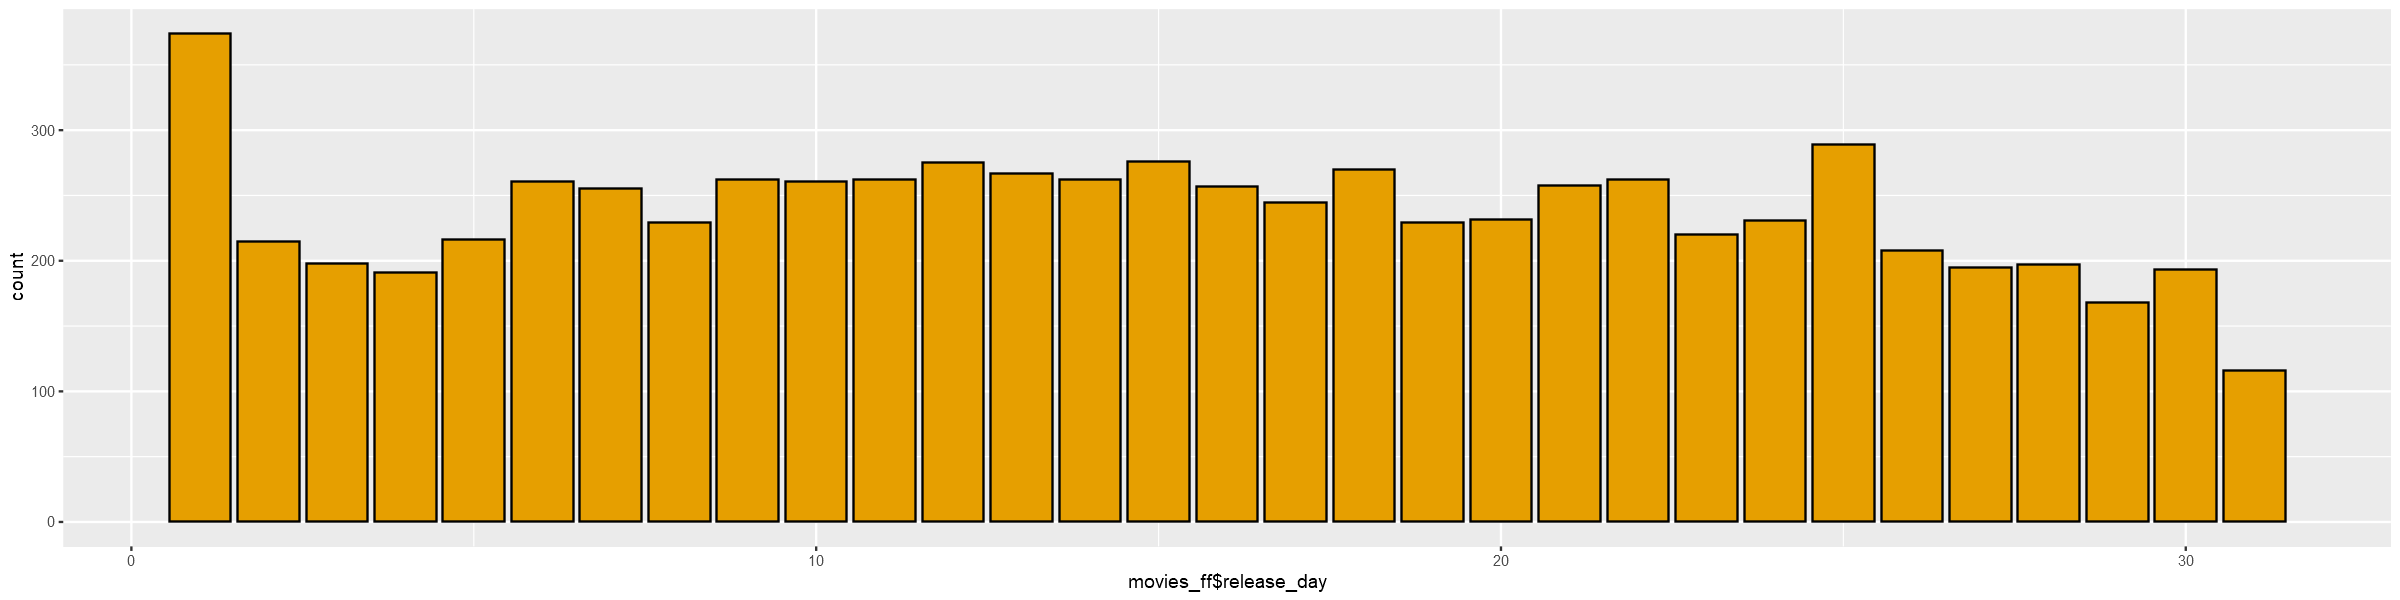

In [104]:
# release_day
ggplot(movies_ff, aes(movies_ff$release_day)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    theme_get()
   options(repr.plot.width = 20, repr.plot.height = 5)


  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
374 215 198 191 216 261 255 229 262 261 262 275 267 262 276 257 245 270 229 232 
 21  22  23  24  25  26  27  28  29  30  31 
258 262 220 231 289 208 195 197 168 193 116 

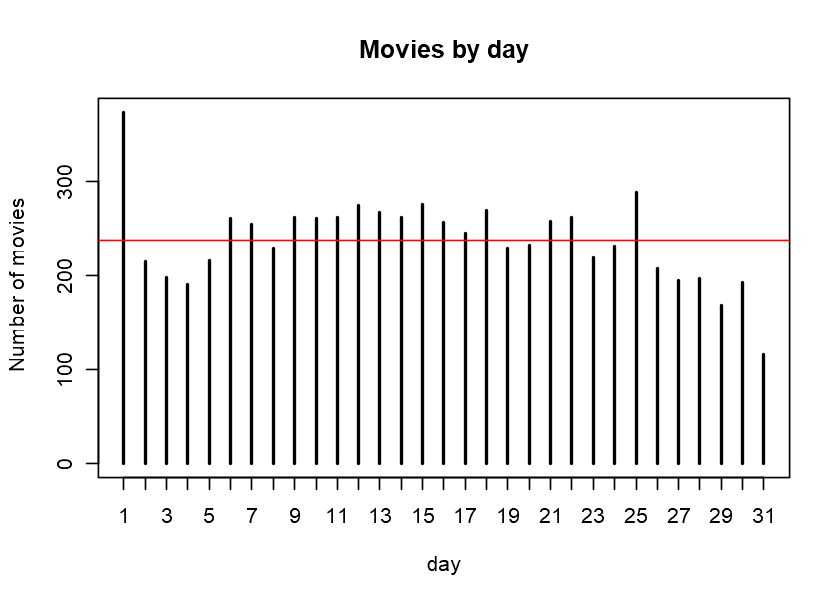

In [91]:
table(movies_ff$release_day)
plot(table(movies_ff$release_day), ylab="Number of movies",xlab="day",main="Movies by day")
abline(h=mean(table(movies_ff$release_day),na.rm = TRUE),col="red")

### Seasonality Analysis

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 1 rows containing non-finite values (stat_density)."


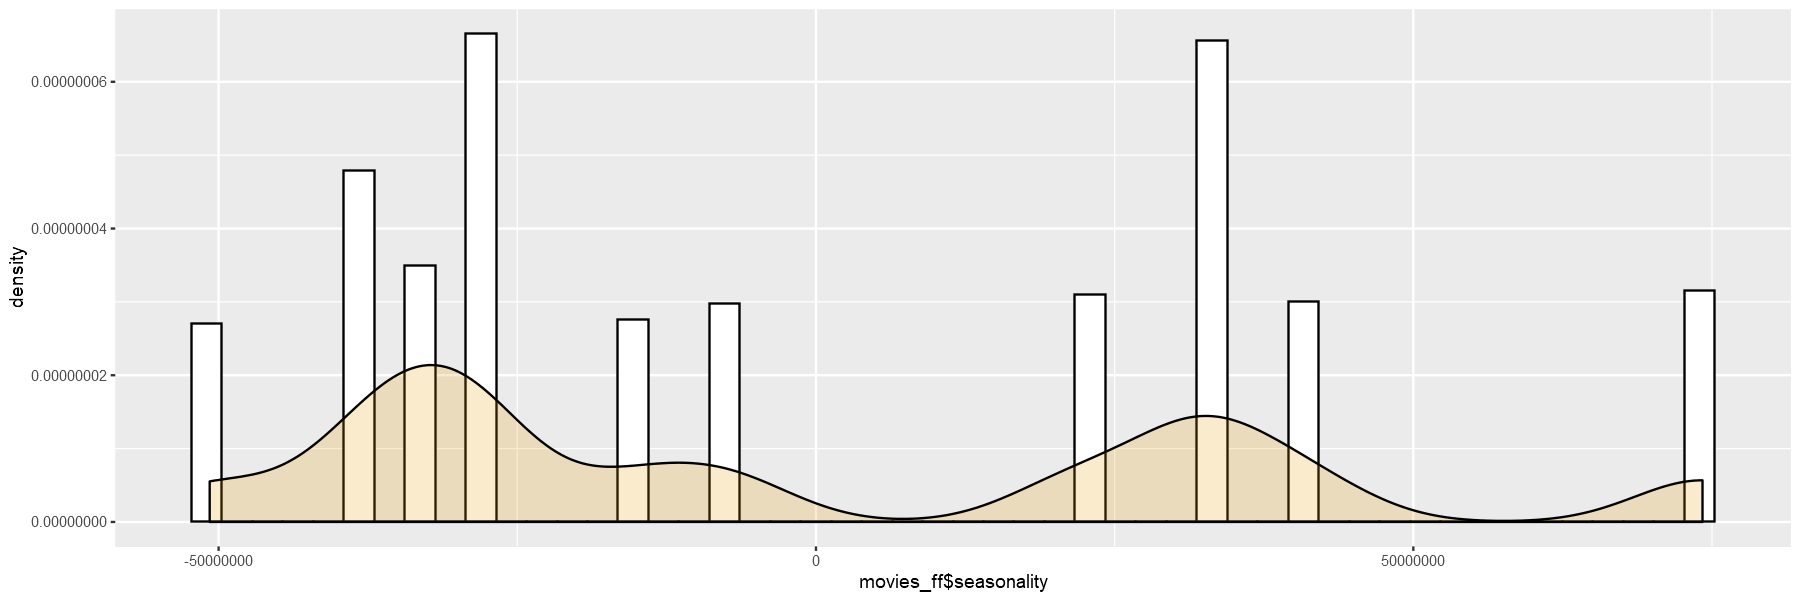

In [138]:
# seasonality
ggplot(movies_ff, aes(x=movies_ff$seasonality)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white",bins = 50)+
 geom_density(alpha=0.2, fill="#E69F00") + theme_get()

In [145]:
movie.time <- movies_ff %>% 
    mutate(release_year,release_month) %>%
    group_by(release_year,release_month) %>%
    summarise(n=n(),revenue_mean=mean(revenue,na.rm=T)) %>%
    select(release_year,release_month,n,revenue_mean) %>%
    filter(between(release_year,1985,2016))

movie.time$revenue_mean <- ifelse(is.na(movie.time$revenue_mean),0,movie.time$revenue_mean)

movie.ts <- ts(movie.time$revenue_mean, start = c(1995, 1), end=c(2016,12), frequency = 12)

In [148]:
movie.ts

Jan       Feb       Mar       Apr       May       Jun       Jul      
1995         7  27233140  20325078    390659 102655171  43092109  35269132
1996         0  15377563  43077666   5239644 102281980  34245468  45464460
1997   3200000   9518342  47771934  46682407   4738953  89026107  28382331
1998   5943231  26998319  22785921  12120007 142984274 127698510  11404671
1999  12404204  31613134  15869677  35859929 237182311 134387126  80806356
2000  17030246  15090574   1305887  15774500  66171445 120099325 505000000
2001   6853159  47364375  65595485  14306524  34356941 207845079  30102717
2002  21621000         0 128423253  35869301  41940207 229025794  31823577
2003   5491903  83964186   9656091   9730837  46769121 203906638  80976750
2004   1653565  31836719  91361221  11733804   6918587 406287050 184127456
2005  22113554  46534021  74994078  68323846 129557236 130175170 125630416
2006  13939573  19079086  39839408  33107713  19632619 142150966  45505712
2007   5746216  80113912   3780043  30588311 104796683 163859397 148529195
2008   9721179  11547862  32830075  41720839  51044177 137975760 126754838
2009  23450798  60104514  80787941  23805008 125366386 199292228 158048692
2010  10499658  55296525  76601663  45663887 154916021  35972201 115485502
2011  35250800 115038198  61850224  44984181  37776750 128423986  50712237
2012   5832602 107244302 111188989  73223210 116339074 147333730  27386349
2013  40222617  49519218  68443042 110093487  57280254   3031801 272816490
2014  37177838 120233113 100024682  40724608 169947280  74720807  67953438
2015  19213251 115084208  83208542  68526325 134307724 117484395  70479239
2016  32110646  34463871  90047008  36110994  79471630 139424723  66087665
     Aug       Sep       Oct       Nov       Dec      
1995   9014279  10609321   5818146  20032287  40555964
1996  19927038    750000  46838412  36949300  35539822
1997  31309195  88981269  13119518  11294901  55617613
1998  10552278   2252640  14481664  30978712  76231706
1999   5422857  39485040  85983742 139434862  31589510
2000  40747115   2244231  42088087 172364257  43665526
2001   7332090  11078252    707701    198461   2358239
2002  15394379  24993547  11864944 114758510 107764097
2003   9459298  24768048  40119046  40093966  33268915
2004         0  18346899   8112656  60912004  59239151
2005  33448535   5436018  59406847 104933083  95890742
2006  33571353  37744779  45945966 229841690  67314565
2007  18099734   5557859  24365038  85090359 115126673
2008  26110834  45835189  17740120  86220481 234717342
2009  23420670  85403562  36806208 256663028  65736690
2010  11358598  24081144  64618348  29190892 127178593
2011 119502574  25705211  41527825  60098796 333078817
2012  74268665  49250543  20904207 226642018 129350159
2013  53706951  35190056  80623469 101399169 112888357
2014  84411693  19562843  74711759 216048475  54191766
2015  59017813  44324977  49742839  34894778 247725996
2016  44337024  25020005  18352710 155207054  78001959

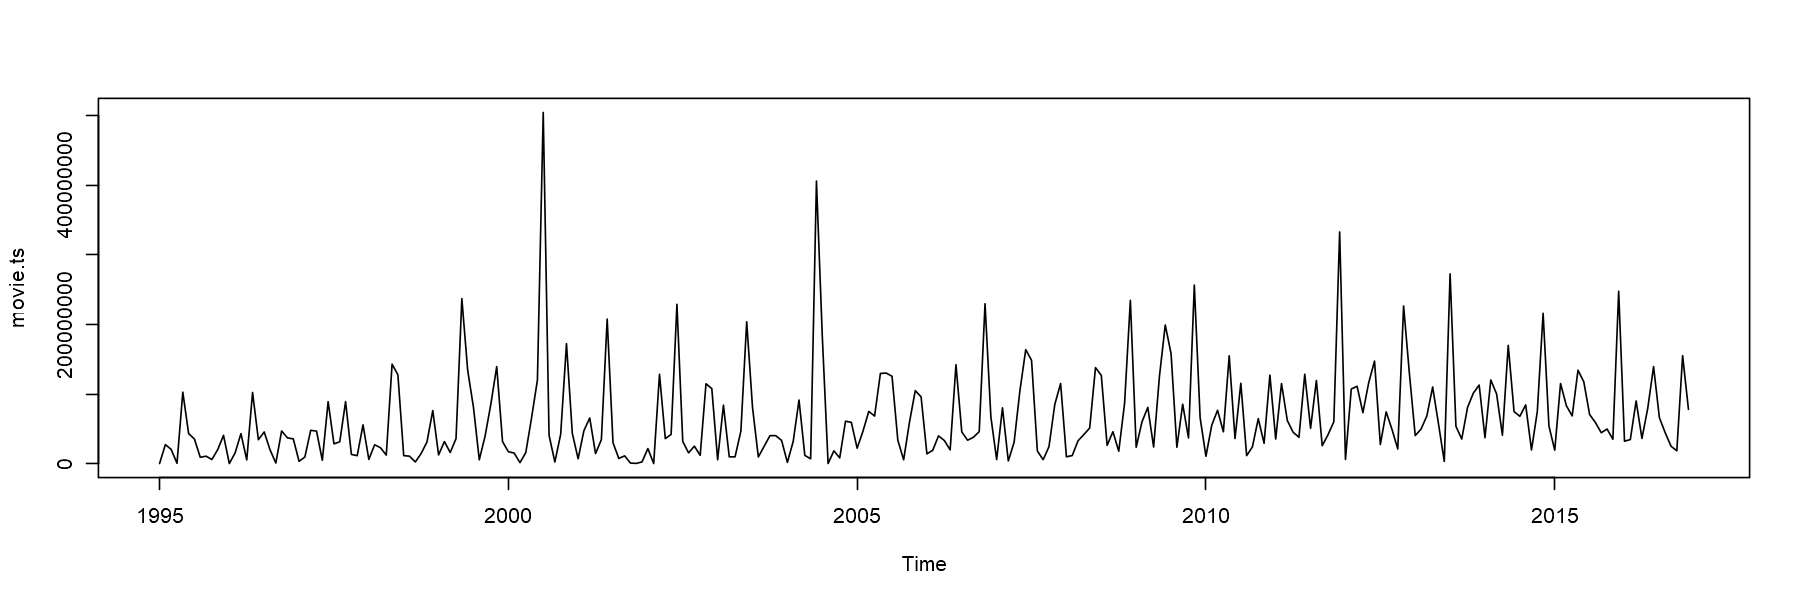

In [150]:
plot(movie.ts)

In [152]:
plot(decompose(movie.ts))

In [159]:
movie.dec <- decompose(movie.ts)
head(movie.dec$seasonal)
montly_trend <- data.frame(month=c(1:12),season=movie.dec$seasonal[1:12]) # season=movie.dec$seasonal[1:12]) ts is matrix since we want only the first line we take the first 12 varibles 
montly_trend

[1] -50832969 -15414392  -7254937 -28510946  21652661  74099998

month season   
1   1    -50832969
2   2    -15414392
3   3     -7254937
4   4    -28510946
5   5     21652661
6   6     74099998
7   7     41133257
8   8    -33067831
9   9    -37243111
10 10    -28693983
11 11     31877023
12 12     32255229

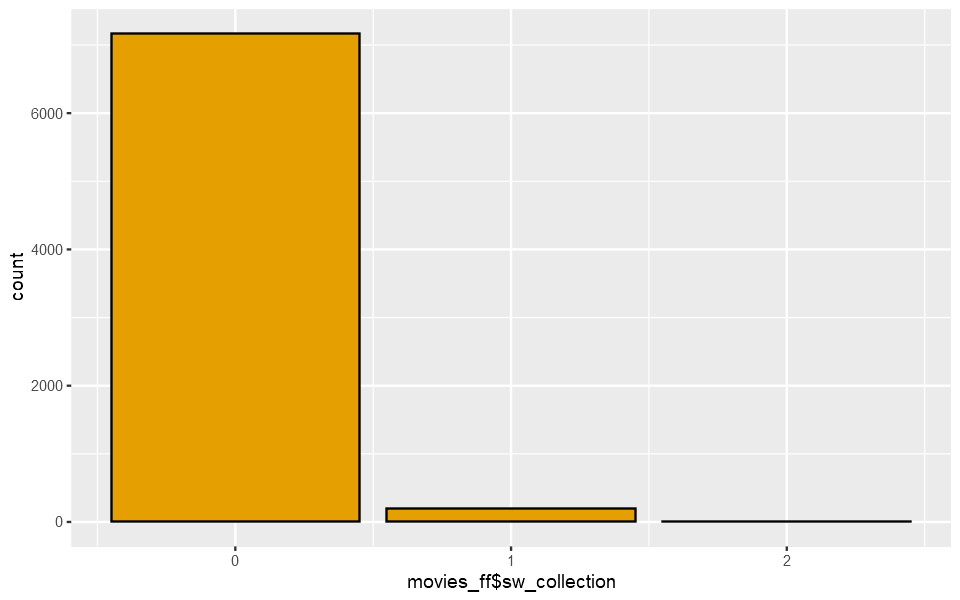

In [122]:
# sw_collection
ggplot(movies_ff, aes(movies_ff$sw_collection)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    theme_get()
   options(repr.plot.width = 8, repr.plot.height = 5)

### producers_cnt Analysis

Warning message:
"Removed 395 rows containing non-finite values (stat_count)."


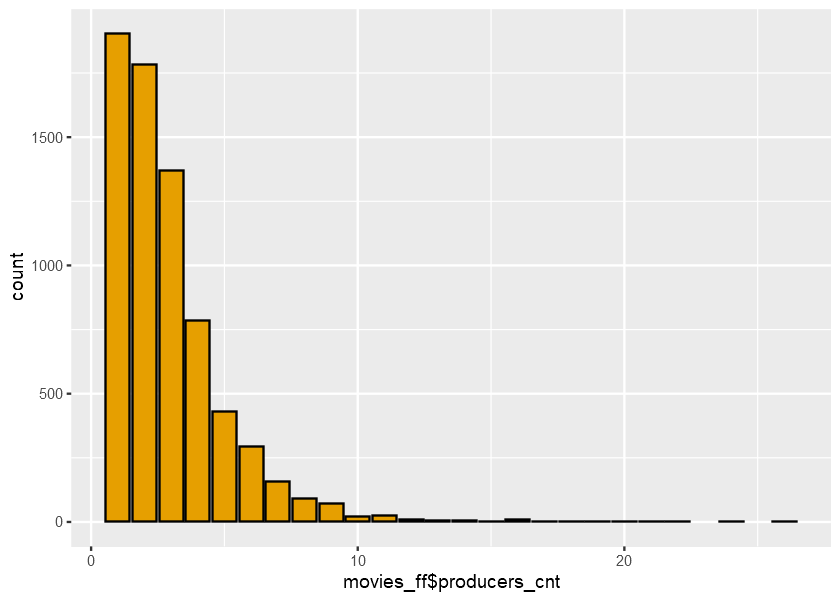

In [93]:
# producers_cnt
ggplot(movies_ff, aes(movies_ff$producers_cnt)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    theme_get()
   options(repr.plot.width = 8, repr.plot.height = 5)

Warning message:
"Removed 395 rows containing missing values (geom_point)."


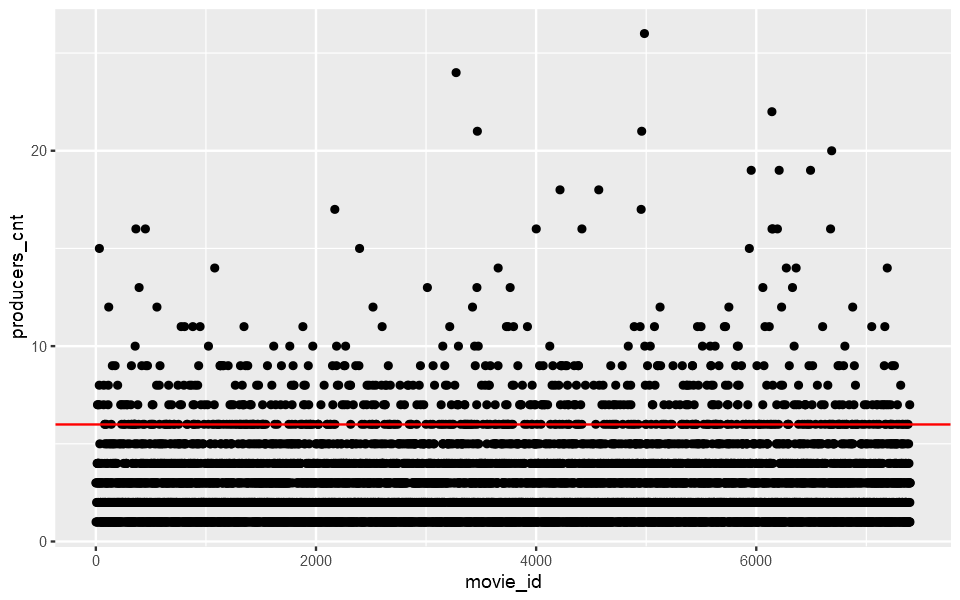

In [101]:
#producers_cnt Outliers
ggplot(data=movies_ff) +
    geom_point(aes(x=movie_id, y=producers_cnt)) + 
    geom_hline(yintercept = 6 ,color="red")

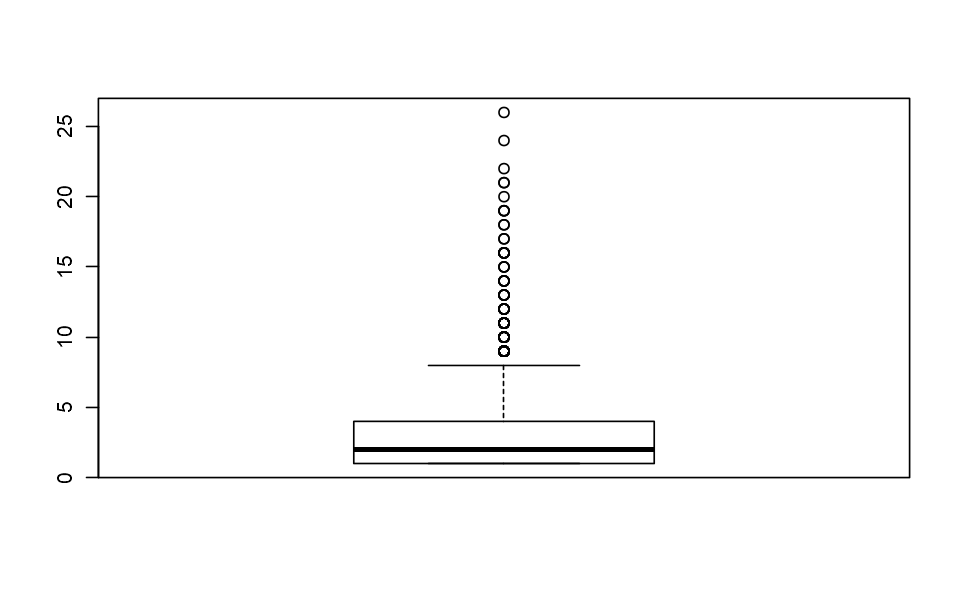

In [122]:
out_producers_cnt <- boxplot(movies_ff$producers_cnt)
options(repr.plot.width = 5, repr.plot.height = 5)

In [160]:
head(out_producers_cnt$out) # outlier
min(out_producers_cnt$out) #  minimum outlier
max(out_producers_cnt$out) #  maximum outlier
median(out_producers_cnt$out)
mean(out_producers_cnt$out)

[1] 15 12  9  9  9 10

[1] 9

[1] 26

[1] 10

[1] 11

### countries_cnt Analysis

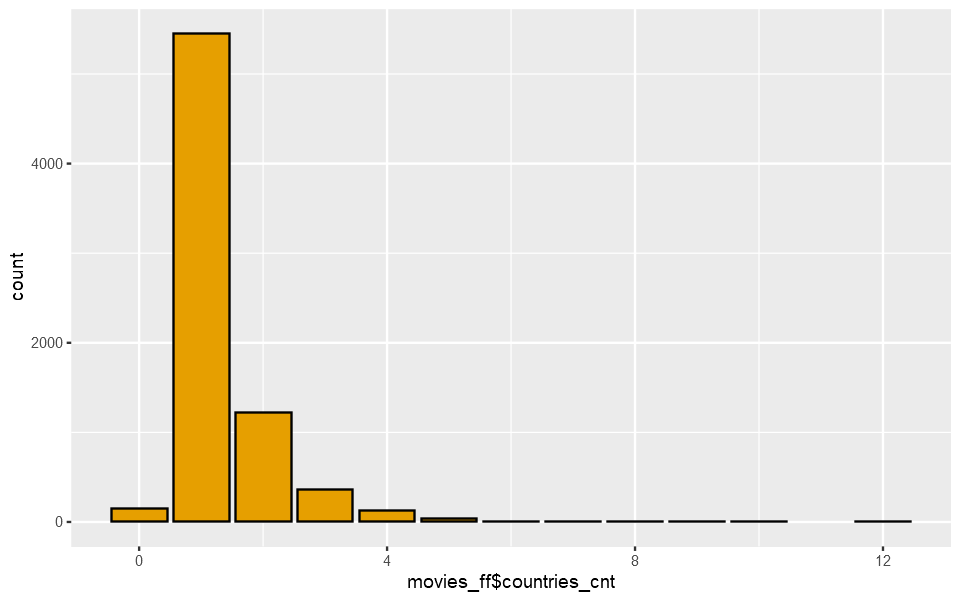

In [134]:
# countries_cnt
ggplot(movies_ff, aes(movies_ff$countries_cnt)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    theme_get()
   options(repr.plot.width = 8, repr.plot.height = 5)

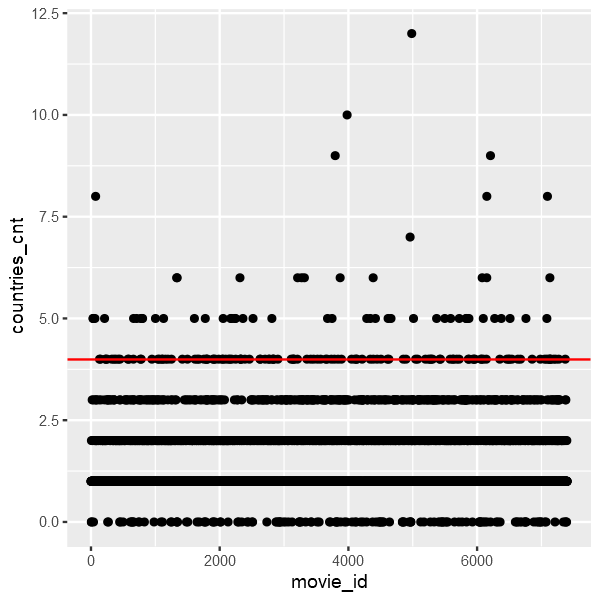

In [110]:
ggplot(data=movies_ff) +
    geom_point(aes(x=movie_id, y=countries_cnt)) + 
    geom_hline(yintercept = 4 ,color="red")

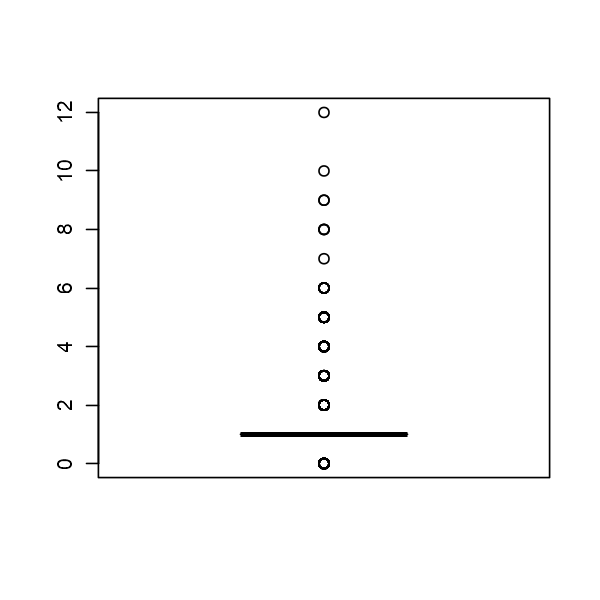

In [123]:
out_countries_cnt <- boxplot(movies_ff$countries_cnt)
options(repr.plot.width = 8, repr.plot.height = 20)

In [126]:
head(out_countries_cnt$out) # outlier head list
min(out_countries_cnt$out) #  minimum outlier
max(out_countries_cnt$out) #  maximum outlier
median(out_countries_cnt$out)
mean(out_countries_cnt$out)

[1] 0 2 0 3 2 2

[1] 0

[1] 12

[1] 2

[1] 2.3

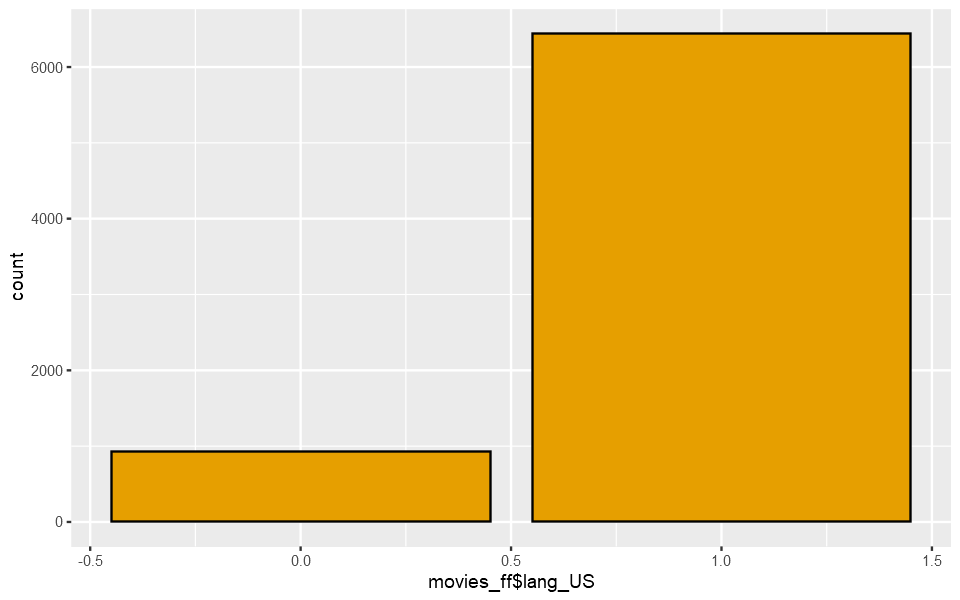

In [136]:
# lang_US
ggplot(movies_ff, aes(movies_ff$lang_US)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    theme_get()
   options(repr.plot.width = 8, repr.plot.height = 5)

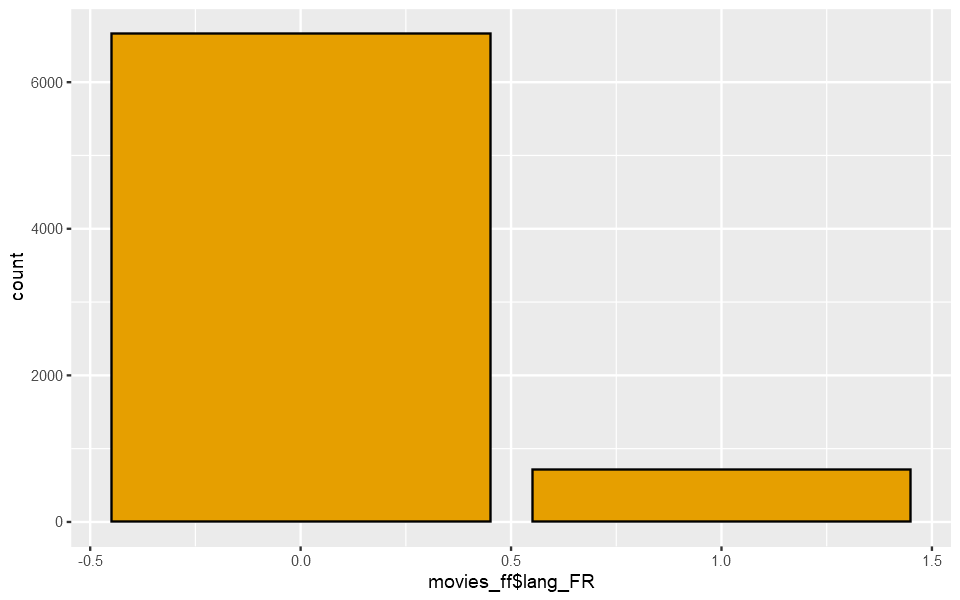

In [138]:
# lang_FR
ggplot(movies_ff, aes(movies_ff$lang_FR)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    theme_get()
   options(repr.plot.width = 8, repr.plot.height = 5)

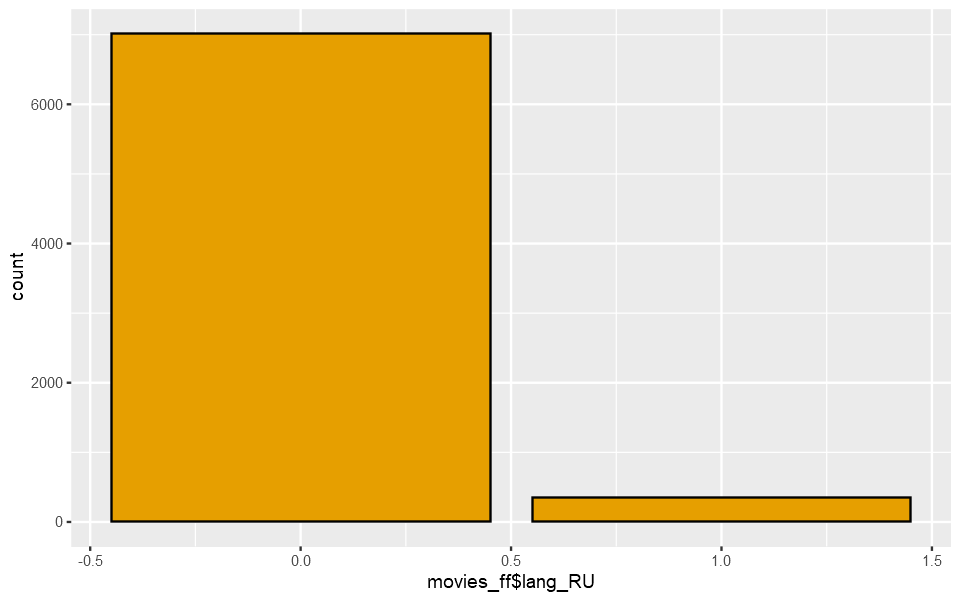

In [140]:
# lang_RU
ggplot(movies_ff, aes(movies_ff$lang_RU)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    theme_get()
   options(repr.plot.width = 8, repr.plot.height = 5)

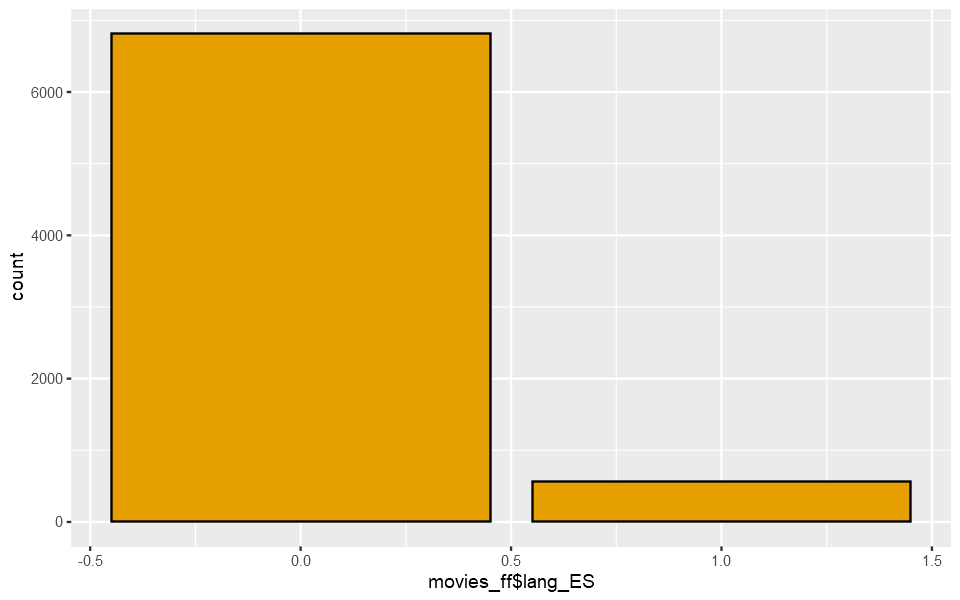

In [142]:
# lang_ES
ggplot(movies_ff, aes(movies_ff$lang_ES)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    theme_get()
   options(repr.plot.width = 8, repr.plot.height = 5)

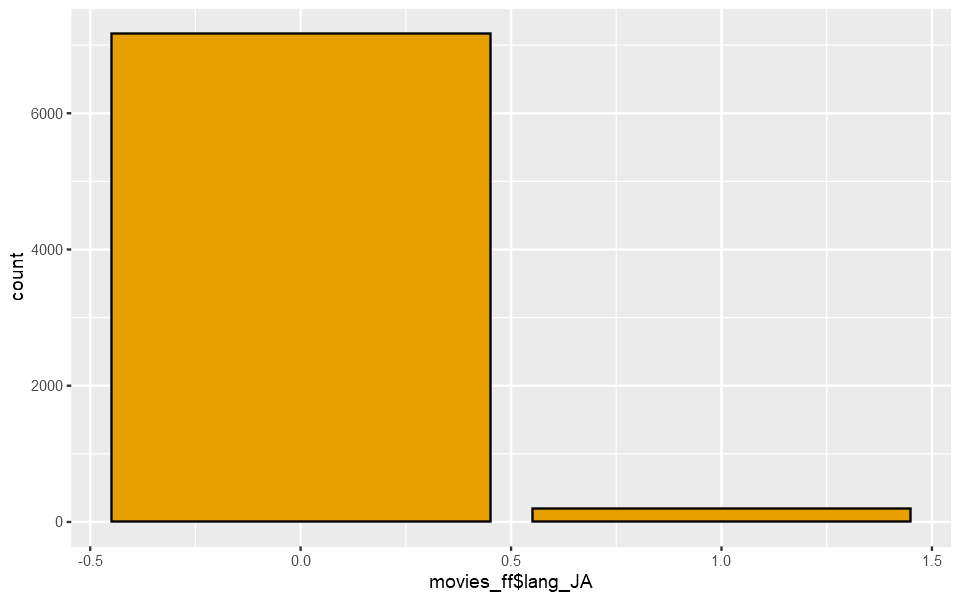

In [144]:
# lang_JA
ggplot(movies_ff, aes(movies_ff$lang_JA)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    theme_get()
   options(repr.plot.width = 8, repr.plot.height = 5)

### keyword_cnt Analysis

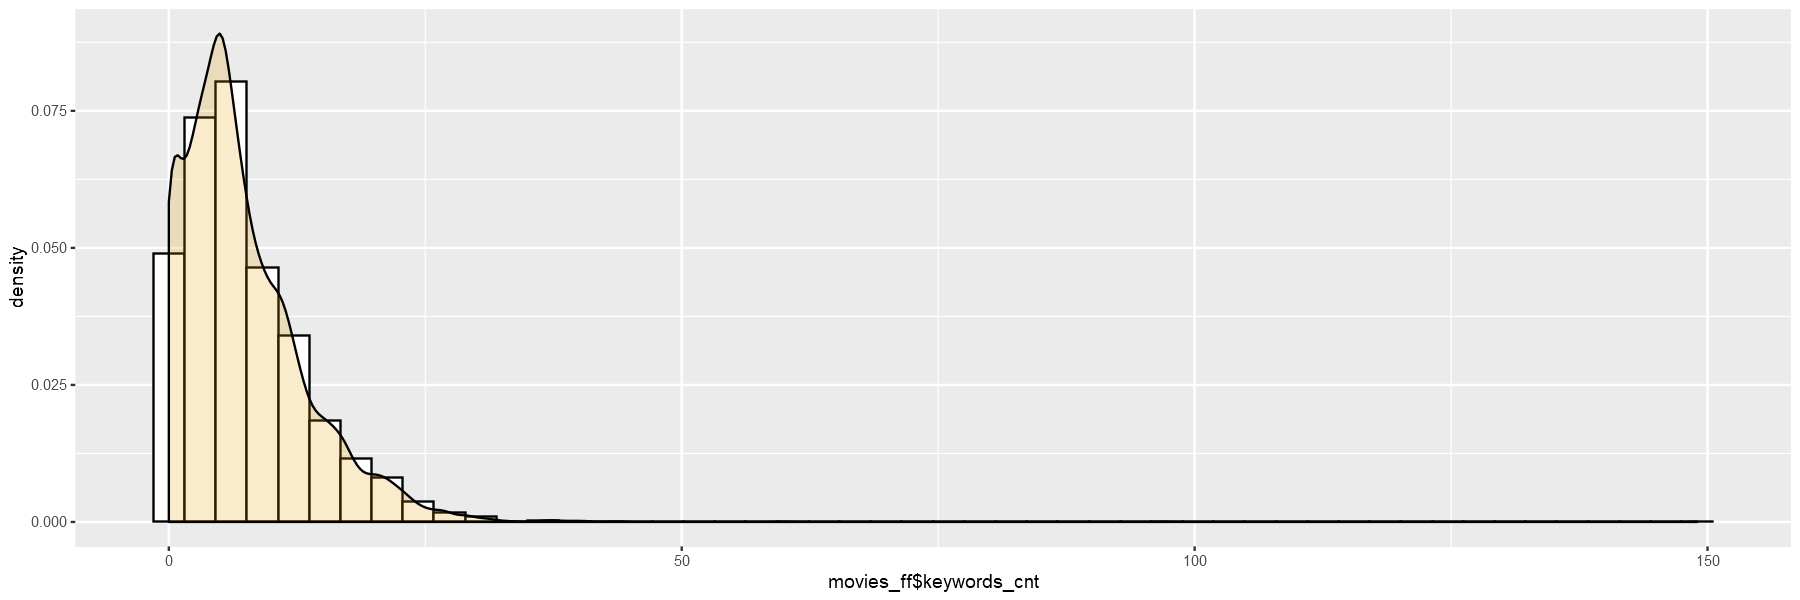

In [164]:
# keyword_cnt
ggplot(movies_ff, aes(x=movies_ff$keywords_cnt)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white",bins = 50)+
 geom_density(alpha=0.2, fill="#E69F00") + theme_get()

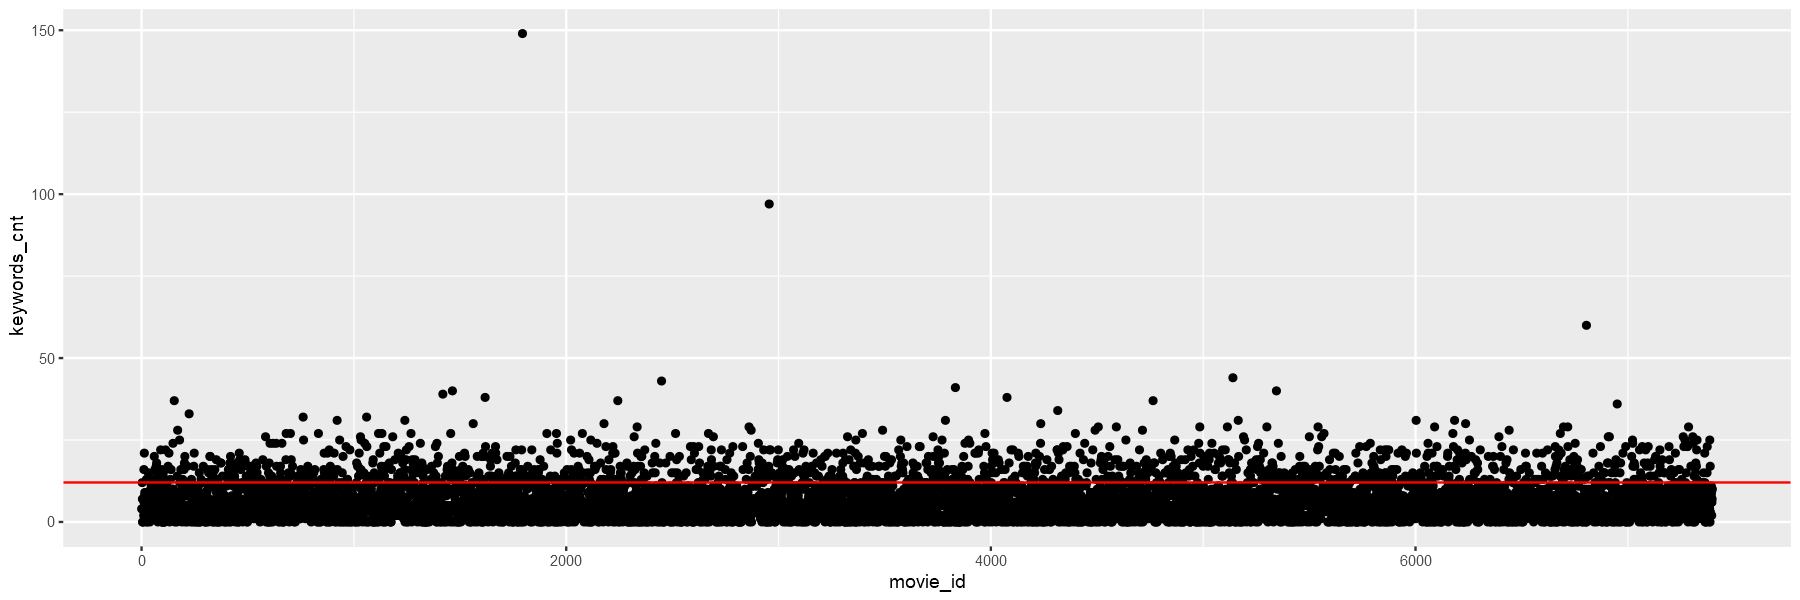

In [170]:
ggplot(data=movies_ff) +
    geom_point(aes(x=movie_id, y=keywords_cnt)) + 
    geom_hline(yintercept = 12 ,color="red")

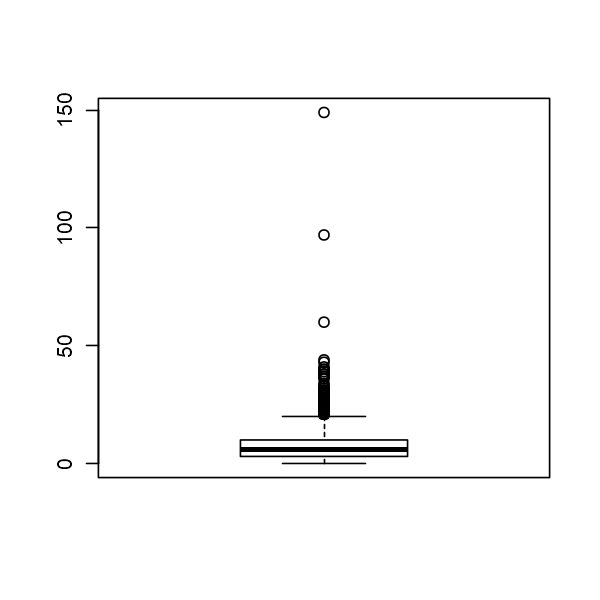

In [176]:
out_keywords_cnt <- boxplot(movies_ff$keywords_cnt) 
options(repr.plot.width = 5, repr.plot.height = 5)

In [177]:
head(out_keywords_cnt$out)
min(out_keywords_cnt$out)
max(out_keywords_cnt$out)
median(out_keywords_cnt$out)
mean(out_keywords_cnt$out)

[1] 21 22 22 21 24 37

[1] 21

[1] 149

[1] 23

[1] 25

### actor0_movies_cnt Analysis

In [153]:
# actor0_movies_cnt
ggplot(movies_ff, aes(movies_ff$actor0_movies_cnt)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    theme_get()
   options(repr.plot.width = 8, repr.plot.height = 5)

In [194]:
ggplot(data=movies_ff) +
    geom_point(aes(x=movie_id, y=actor0_movies_cnt)) + 
    geom_hline(yintercept = 28 ,color="red")

In [205]:
out_actor0_movies_cnt <- boxplot(movies_ff$actor0_movies_cnt) 
options(repr.plot.width = 5, repr.plot.height = 5)

In [185]:
head(out_actor0_movies_cnt$out)
min(out_actor0_movies_cnt$out)
max(out_actor0_movies_cnt$out)
median(out_actor0_movies_cnt$out)
mean(out_actor0_movies_cnt$out)

[1] 50 65 35 32 29 31

[1] 28

[1] 65

[1] 32

[1] 34

### actor0_movies_5y_cnt Analysis

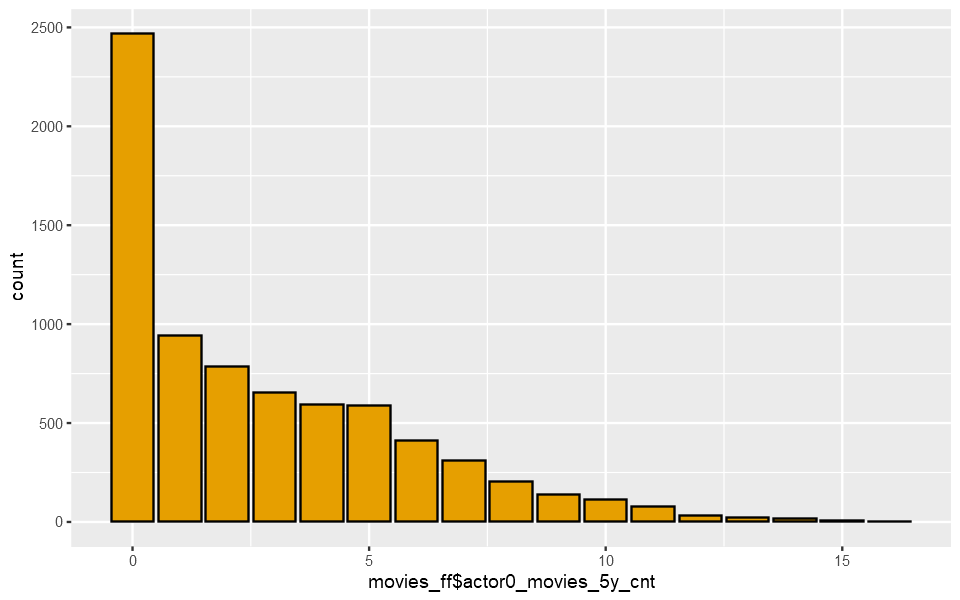

In [187]:
# actor0_movies_5y_cnt
ggplot(movies_ff, aes(movies_ff$actor0_movies_5y_cnt)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    theme_get()
   options(repr.plot.width = 8, repr.plot.height = 5)

In [199]:
ggplot(data=movies_ff) +
    geom_point(aes(x=movie_id, y=actor0_movies_5y_cnt)) + 
    geom_hline(yintercept = 13 ,color="red")

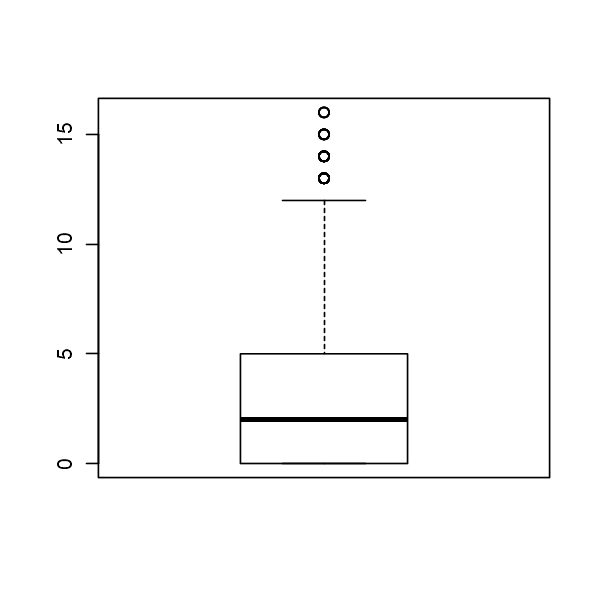

In [197]:
out_actor0_movies_5y_cnt <- boxplot(movies_ff$actor0_movies_5y_cnt) 
options(repr.plot.width = 5, repr.plot.height = 5)

In [198]:
head(out_actor0_movies_5y_cnt$out)
min(out_actor0_movies_5y_cnt$out)
max(out_actor0_movies_5y_cnt$out)
median(out_actor0_movies_5y_cnt$out)
mean(out_actor0_movies_5y_cnt$out)

[1] 14 14 13 13 15 13

[1] 13

[1] 16

[1] 14

[1] 14

### actor1_movies_cnt Analysis

In [158]:
# actor1_movies_cnt
ggplot(movies_ff, aes(movies_ff$actor1_movies_cnt)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    theme_get()
   options(repr.plot.width = 20, repr.plot.height = 5)

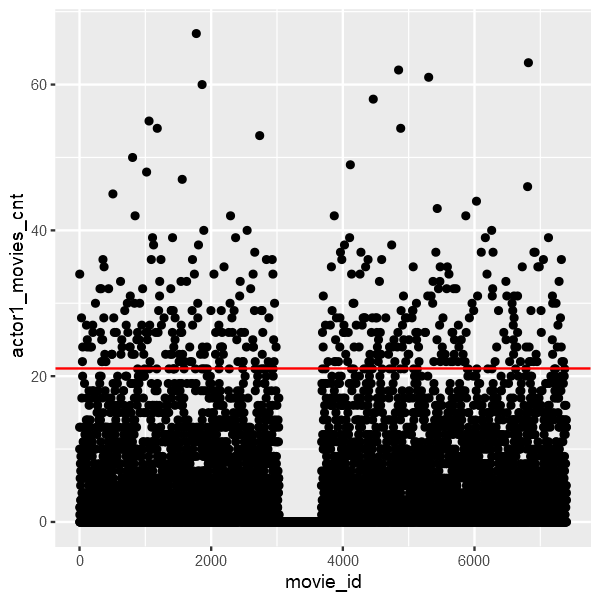

In [208]:
ggplot(data=movies_ff) +
    geom_point(aes(x=movie_id, y=actor1_movies_cnt)) + 
    geom_hline(yintercept = 21 ,color="red")

In [219]:
out_actor1_movies_cnt <- boxplot(movies_ff$actor1_movies_cnt) 
options(repr.plot.width = 5, repr.plot.height = 5)

In [207]:
head(out_actor1_movies_cnt$out)
min(out_actor1_movies_cnt$out)
max(out_actor1_movies_cnt$out)
median(out_actor1_movies_cnt$out)
mean(out_actor1_movies_cnt$out)

[1] 34 28 22 24 27 24

[1] 21

[1] 67

[1] 26

[1] 28

### actor1_movies_5y_cnt

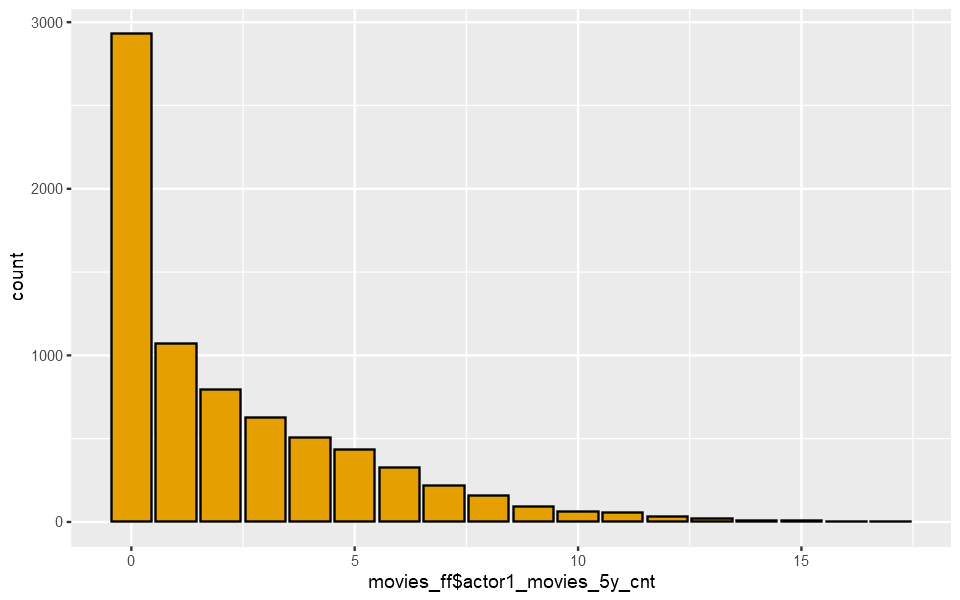

In [160]:
# actor1_movies_5y_cnt
ggplot(movies_ff, aes(movies_ff$actor1_movies_5y_cnt)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    theme_get()
   options(repr.plot.width = 8, repr.plot.height = 5)

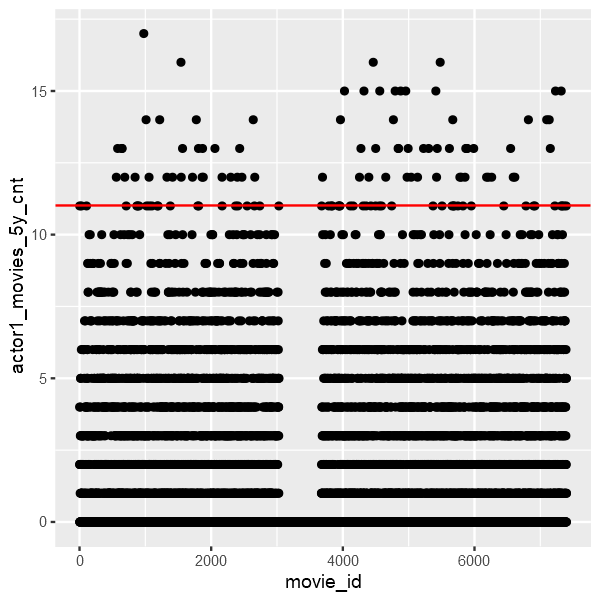

In [215]:
ggplot(data=movies_ff) +
    geom_point(aes(x=movie_id, y=actor1_movies_5y_cnt)) + 
    geom_hline(yintercept = 11 ,color="red")

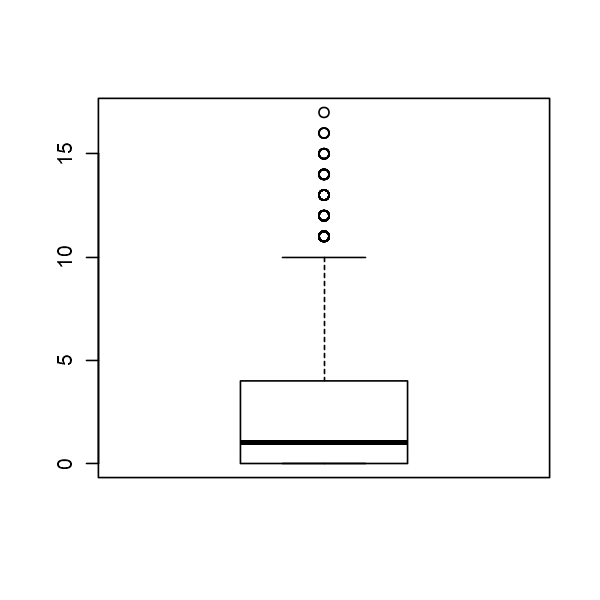

In [213]:
out_actor1_movies_5y_cnt <- boxplot(movies_ff$actor1_movies_5y_cnt) 

In [214]:
head(out_actor1_movies_5y_cnt$out)
min(out_actor1_movies_5y_cnt$out)
max(out_actor1_movies_5y_cnt$out)
median(out_actor1_movies_5y_cnt$out)
mean(out_actor1_movies_5y_cnt$out)

[1] 11 11 11 12 13 13

[1] 11

[1] 17

[1] 12

[1] 12

### actor2_movies_cnt

In [161]:
# actor2_movies_cnt
ggplot(movies_ff, aes(movies_ff$actor2_movies_cnt)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    theme_get()
   options(repr.plot.width = 20, repr.plot.height = 5)

In [221]:
ggplot(data=movies_ff) +
    geom_point(aes(x=movie_id, y=actor2_movies_cnt)) + 
    geom_hline(yintercept = 18 ,color="red")

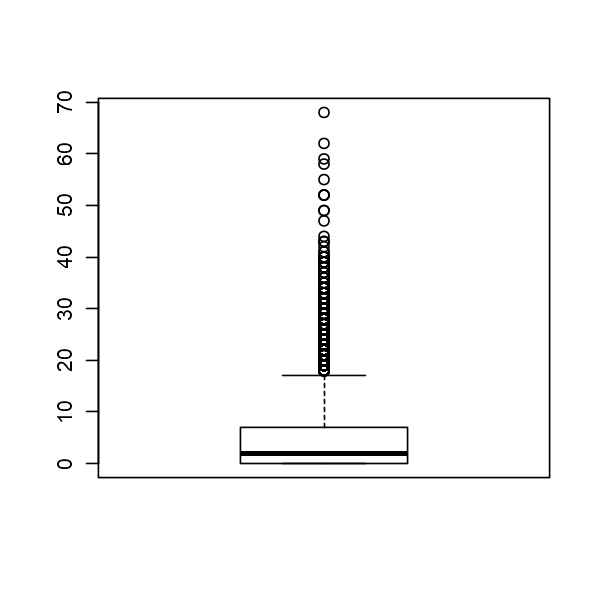

In [218]:
out_actor2_movies_cnt <- boxplot(movies_ff$actor2_movies_cnt) 

In [220]:
head(out_actor2_movies_cnt$out)
min(out_actor2_movies_cnt$out)
max(out_actor2_movies_cnt$out)
median(out_actor2_movies_cnt$out)
mean(out_actor2_movies_cnt$out)

[1] 20 27 21 23 18 20

[1] 18

[1] 68

[1] 23

[1] 25

### actor2_movies_5y_cnt Analysis

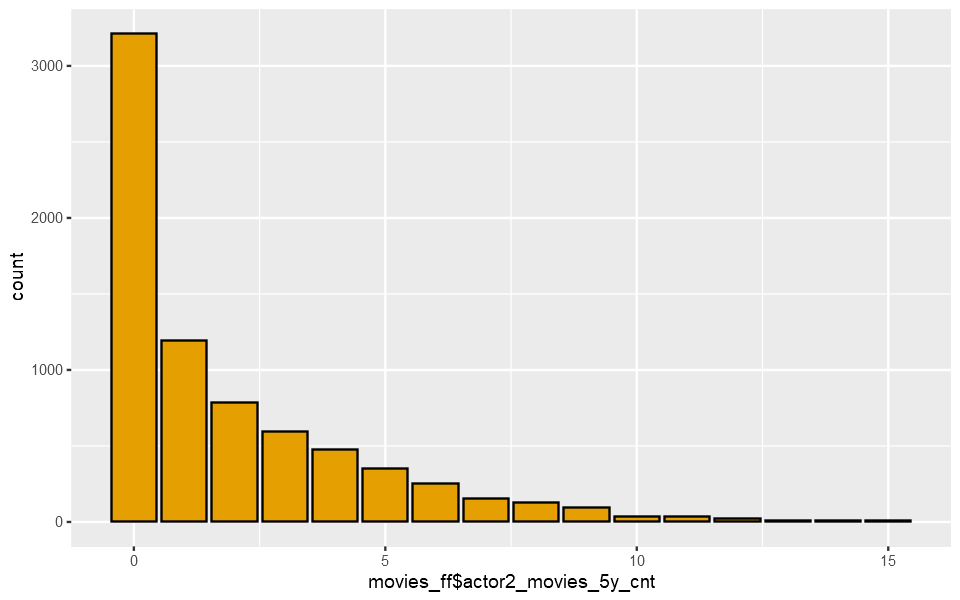

In [164]:
# actor2_movies_5y_cnt
ggplot(movies_ff, aes(movies_ff$actor2_movies_5y_cnt)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    theme_get()
   options(repr.plot.width = 8, repr.plot.height = 5)

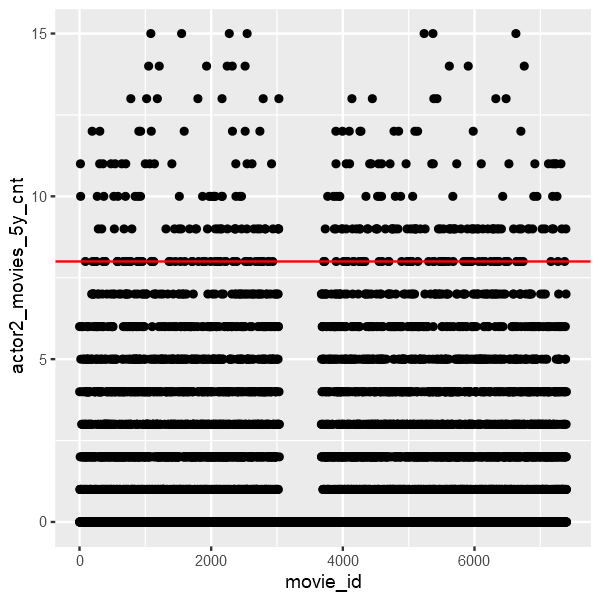

In [225]:
ggplot(data=movies_ff) +
    geom_point(aes(x=movie_id, y=actor2_movies_5y_cnt)) + 
    geom_hline(yintercept = 8 ,color="red")

In [223]:
out_actor2_movies_5y_cnt <- boxplot(movies_ff$actor2_movies_5y_cnt) 

In [224]:
head(out_actor2_movies_5y_cnt$out)
min(out_actor2_movies_5y_cnt$out)
max(out_actor2_movies_5y_cnt$out)
median(out_actor2_movies_5y_cnt$out)
mean(out_actor2_movies_5y_cnt$out)

[1] 11 10  8 12  8  8

[1] 8

[1] 15

[1] 9

[1] 9.5

In [166]:
# sw_female_actor0
ggplot(movies_ff, aes(movies_ff$sw_female_actor0)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    theme_get()
   options(repr.plot.width = 8, repr.plot.height = 5)

Warning message:
"Removed 934 rows containing non-finite values (stat_count)."


Warning message:
"Removed 782 rows containing non-finite values (stat_count)."


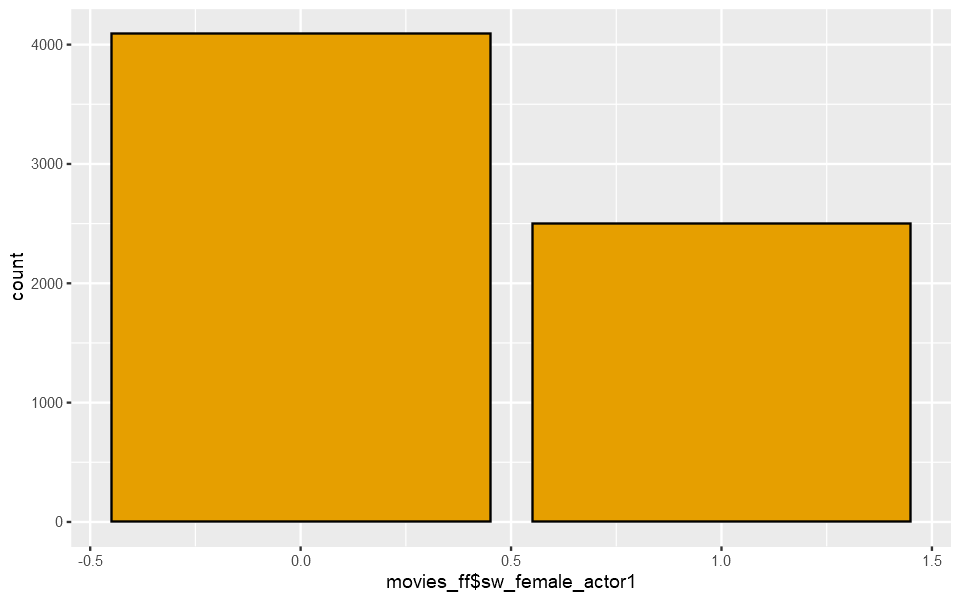

In [167]:
# sw_female_actor1
ggplot(movies_ff, aes(movies_ff$sw_female_actor1)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    theme_get()
   options(repr.plot.width = 8, repr.plot.height = 5)

Warning message:
"Removed 788 rows containing non-finite values (stat_count)."


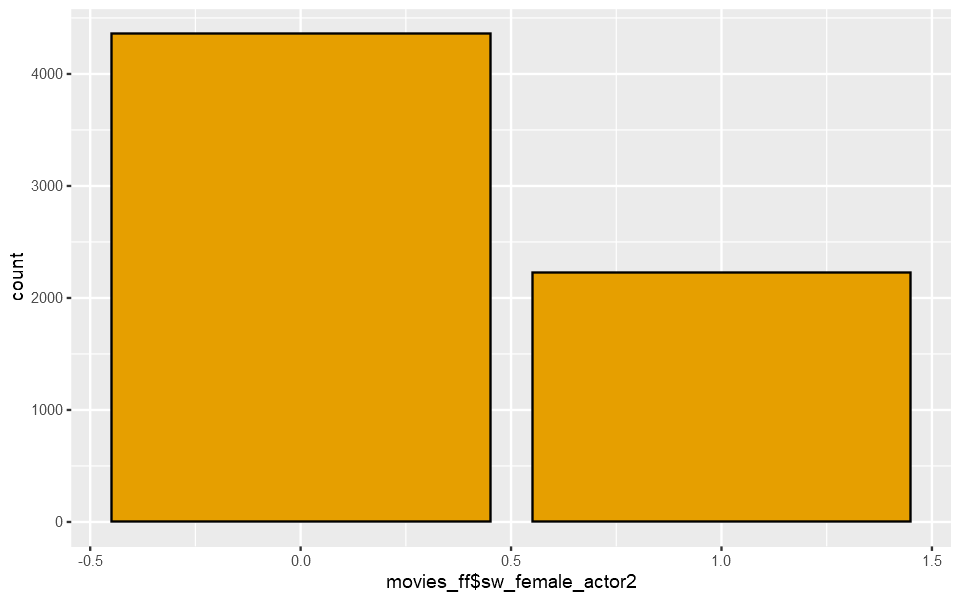

In [168]:
# sw_female_actor2
ggplot(movies_ff, aes(movies_ff$sw_female_actor2)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    theme_get()
   options(repr.plot.width = 8, repr.plot.height = 5)

Warning message:
"Removed 934 rows containing non-finite values (stat_count)."


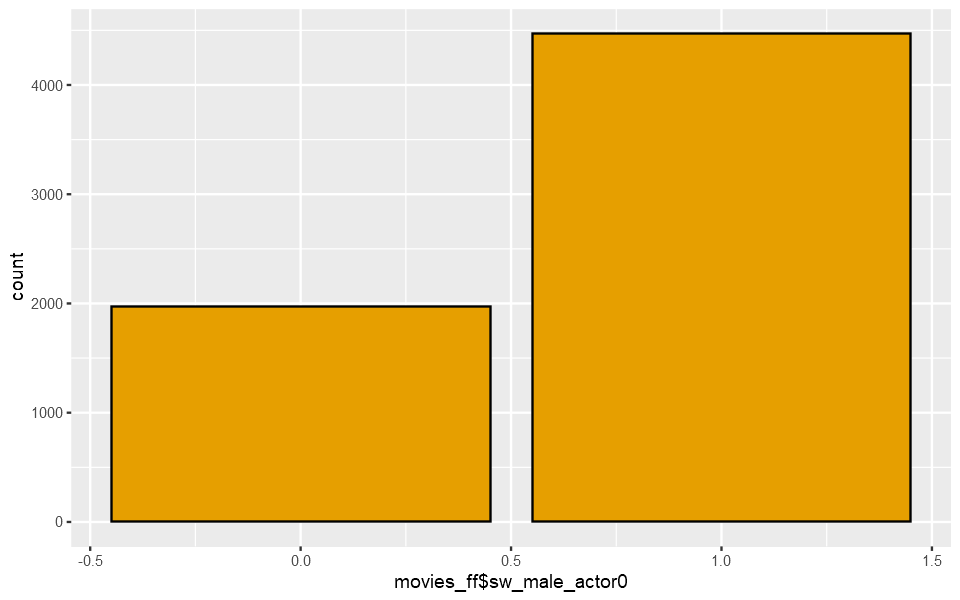

In [169]:
# sw_male_actor0
ggplot(movies_ff, aes(movies_ff$sw_male_actor0)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    theme_get()
   options(repr.plot.width = 8, repr.plot.height = 5)

Warning message:
"Removed 782 rows containing non-finite values (stat_count)."


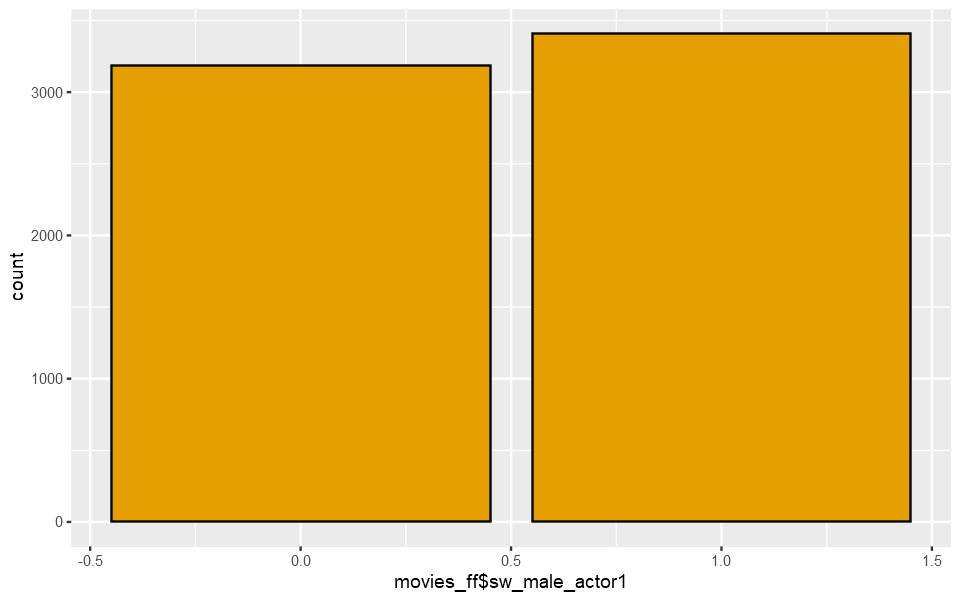

In [171]:
# sw_male_actor1
ggplot(movies_ff, aes(movies_ff$sw_male_actor1)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    theme_get()
   options(repr.plot.width = 8, repr.plot.height = 5)

In [172]:
# sw_male_actor2
ggplot(movies_ff, aes(movies_ff$sw_male_actor2)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    theme_get()
   options(repr.plot.width = 8, repr.plot.height = 5)

Warning message:
"Removed 788 rows containing non-finite values (stat_count)."


### # actor0_prev_revenue Analysis

Warning message:
"Removed 2752 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2752 rows containing non-finite values (stat_density)."


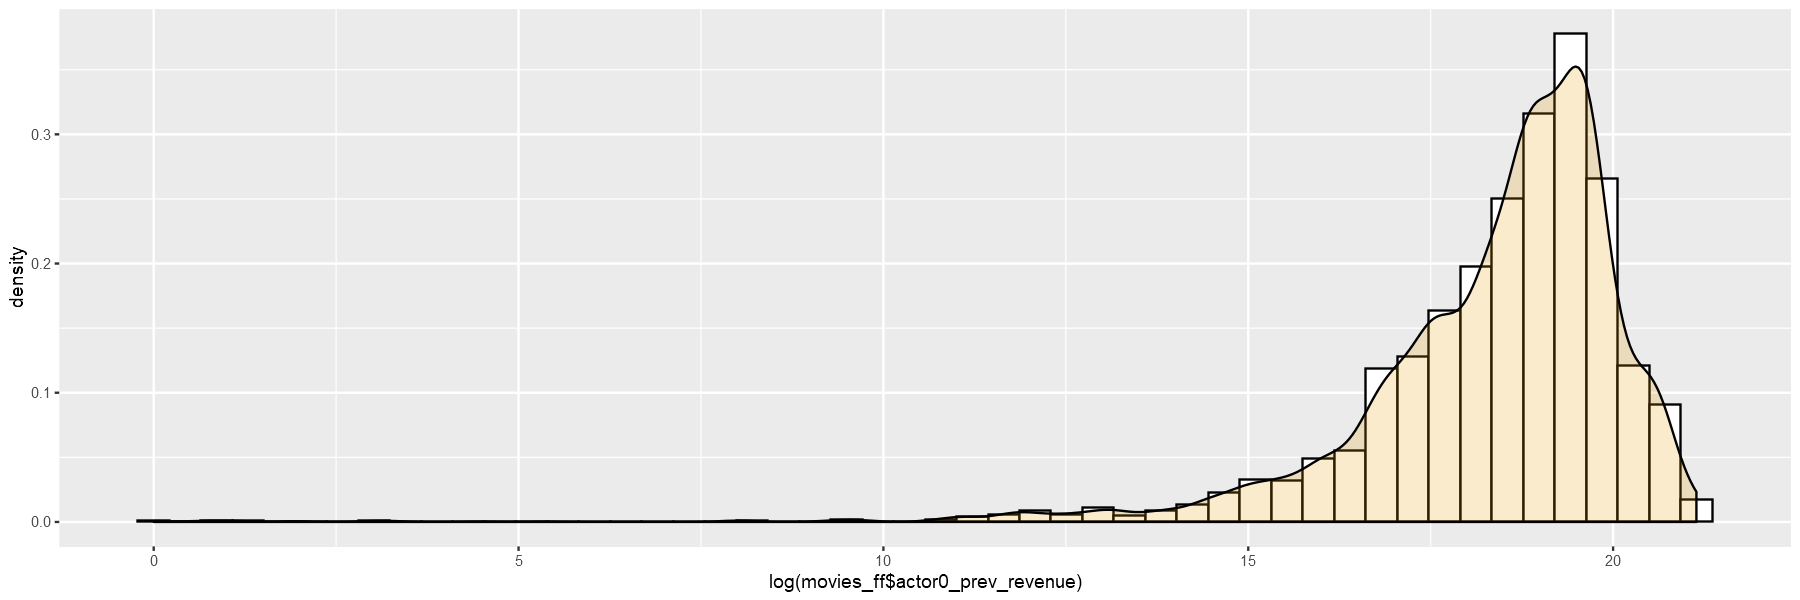

In [181]:
# actor0_prev_revenue
ggplot(movies_ff, aes(x=log(movies_ff$actor0_prev_revenue))) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white",bins = 50)+
 geom_density(alpha=0.2, fill="#E69F00") + theme_get()
options(repr.plot.width = 15, repr.plot.height = 5)

In [235]:
ggplot(data=movies_ff) +
    geom_point(aes(x=movie_id, y=actor0_prev_revenue)) + 
    geom_hline(yintercept = 400000000 ,color="red")

Warning message:
"Removed 2752 rows containing missing values (geom_point)."


Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"


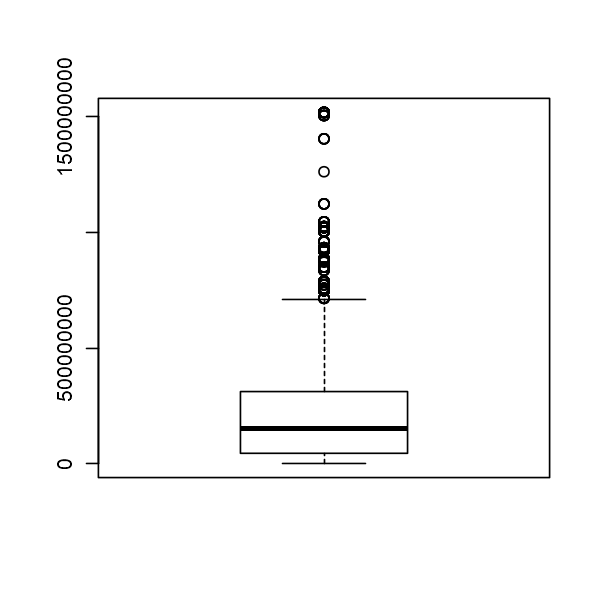

In [229]:
out_actor0_prev_revenue <- boxplot(movies_ff$actor0_prev_revenue) 

In [230]:
head(out_actor0_prev_revenue$out)
min(out_actor0_prev_revenue$out)
max(out_actor0_prev_revenue$out)
median(out_actor0_prev_revenue$out)
mean(out_actor0_prev_revenue$out)

[1]  933959197 1506249360 1004558444 1519557910  786636033 1519557910

[1] 714766572

[1] 1519557910

[1] 926287400

[1] 970535871

### actor1_prev_revenue Analysis

In [182]:
# actor1_prev_revenue
ggplot(movies_ff, aes(x=log(movies_ff$actor1_prev_revenue))) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white",bins = 50)+
 geom_density(alpha=0.2, fill="#E69F00") + theme_get()
options(repr.plot.width = 15, repr.plot.height = 5)

Warning message:
"Removed 3201 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 3201 rows containing non-finite values (stat_density)."


Warning message:
"Removed 3201 rows containing missing values (geom_point)."


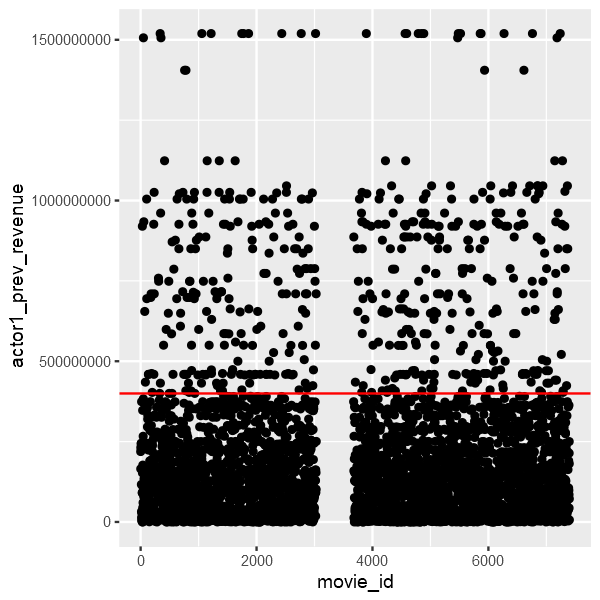

In [237]:
ggplot(data=movies_ff) +
    geom_point(aes(x=movie_id, y=actor1_prev_revenue)) + 
    geom_hline(yintercept = 400000000 ,color="red")

Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"


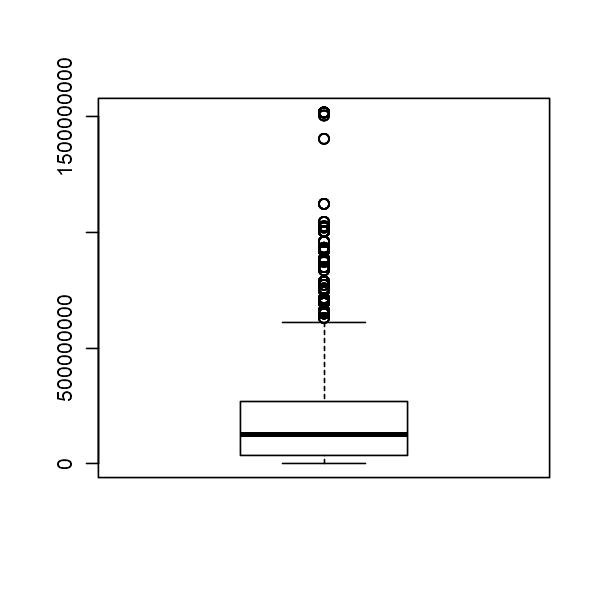

In [238]:
out_actor1_prev_revenue <- boxplot(movies_ff$actor1_prev_revenue) 

In [239]:
head(out_actor1_prev_revenue$out)
min(out_actor1_prev_revenue$out)
max(out_actor1_prev_revenue$out)
median(out_actor1_prev_revenue$out)
mean(out_actor1_prev_revenue$out)

[1]  920100000 1506249360  933959197  655011224 1004558444  694713380

[1] 630161890

[1] 1519557910

[1] 886686817

[1] 913759883

### actor2_prev_revenue

Warning message:
"Removed 3423 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 3423 rows containing non-finite values (stat_density)."


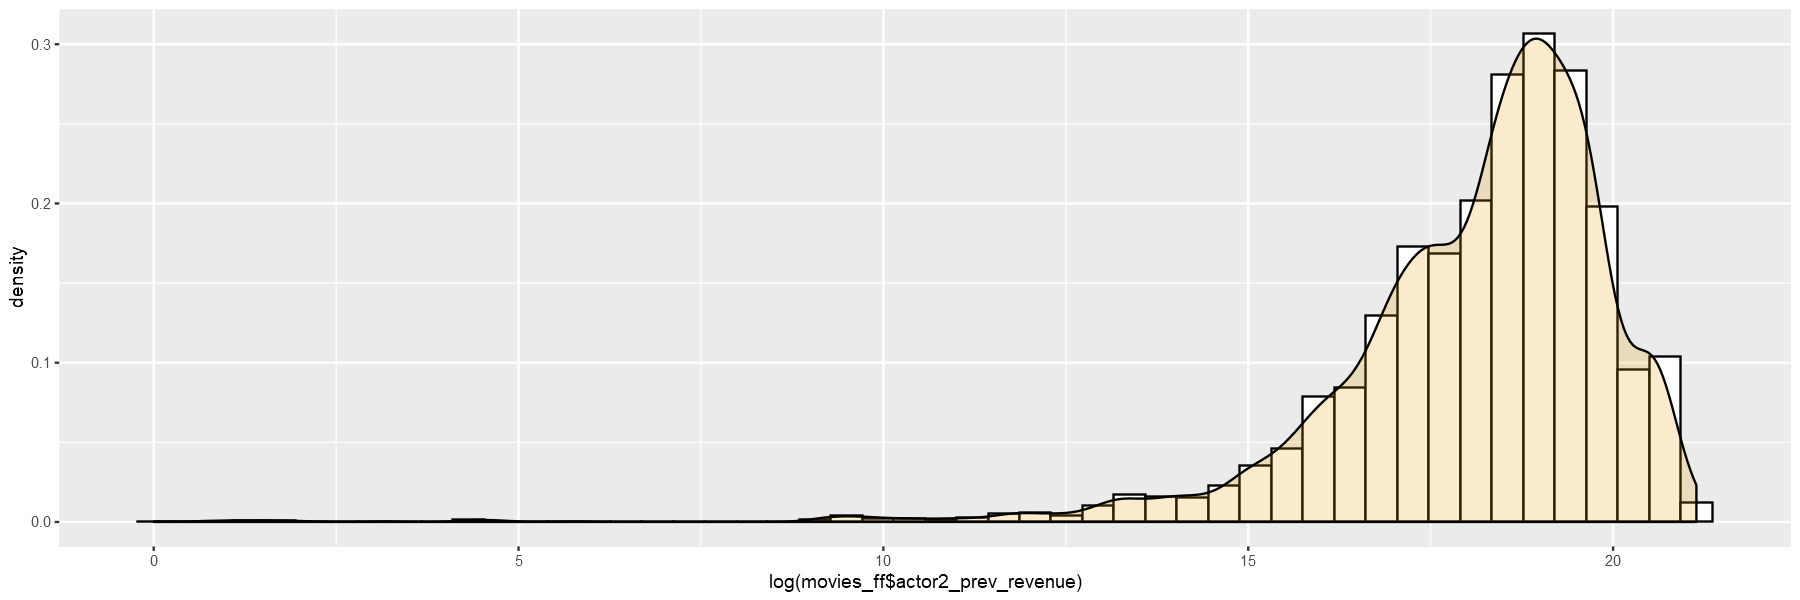

In [183]:
# actor2_prev_revenue
ggplot(movies_ff, aes(x=log(movies_ff$actor2_prev_revenue))) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white",bins = 50)+
 geom_density(alpha=0.2, fill="#E69F00") + theme_get()
options(repr.plot.width = 15, repr.plot.height = 5)

Warning message:
"Removed 3423 rows containing missing values (geom_point)."


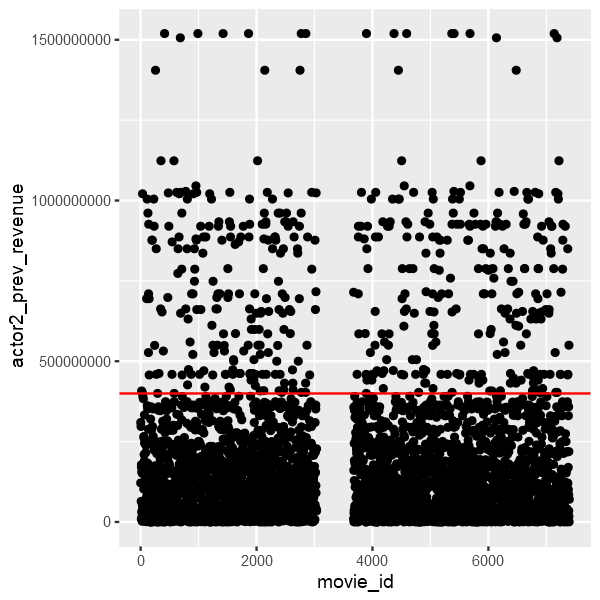

In [241]:
ggplot(data=movies_ff) +
    geom_point(aes(x=movie_id, y=actor2_prev_revenue)) + 
    geom_hline(yintercept = 400000000 ,color="red")

Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"


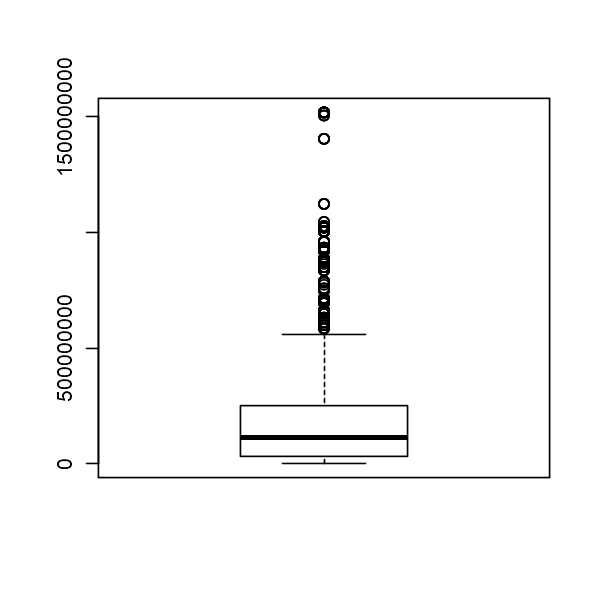

In [242]:
out_actor2_prev_revenue <- boxplot(movies_ff$actor2_prev_revenue) 

In [243]:
head(out_actor2_prev_revenue$out)
min(out_actor2_prev_revenue$out)
max(out_actor2_prev_revenue$out)
median(out_actor2_prev_revenue$out)
mean(out_actor2_prev_revenue$out)

[1] 1021103568  694713380 1004558444  961000000  709827462  926287400

[1] 585349010

[1] 1519557910

[1] 876688482

[1] 873059048

### director_movies_cnt Analysis

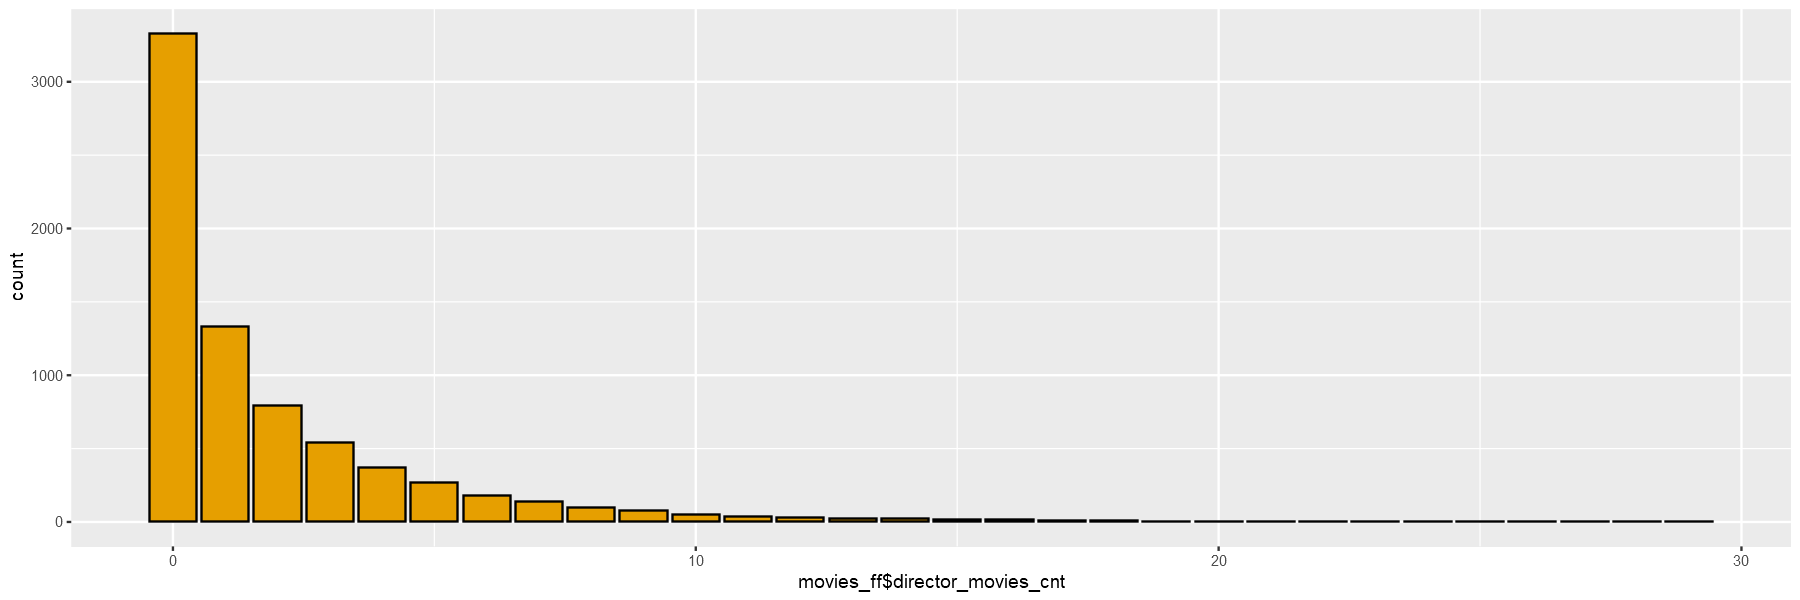

In [185]:
# director_movies_cnt
ggplot(movies_ff, aes(movies_ff$director_movies_cnt)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    theme_get()
   options(repr.plot.width = 8, repr.plot.height = 5)

In [253]:
ggplot(data=movies_ff) +
    geom_point(aes(x=movie_id, y=director_movies_cnt)) + 
    geom_hline(yintercept = 8 ,color="red")

In [251]:
out_director_movies_cnt <- boxplot(movies_ff$director_movies_cnt) 

In [252]:
head(out_director_movies_cnt$out)
min(out_director_movies_cnt$out)
max(out_director_movies_cnt$out)
median(out_director_movies_cnt$out)
mean(out_director_movies_cnt$out)

[1]  9 19 12  9  8 11

[1] 8

[1] 29

[1] 10

[1] 12

### director_movies_5y_cnt Analysis

In [186]:
# director_movies_5y_cnt
ggplot(movies_ff, aes(movies_ff$director_movies_5y_cnt)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    theme_get()
   options(repr.plot.width = 8, repr.plot.height = 5)

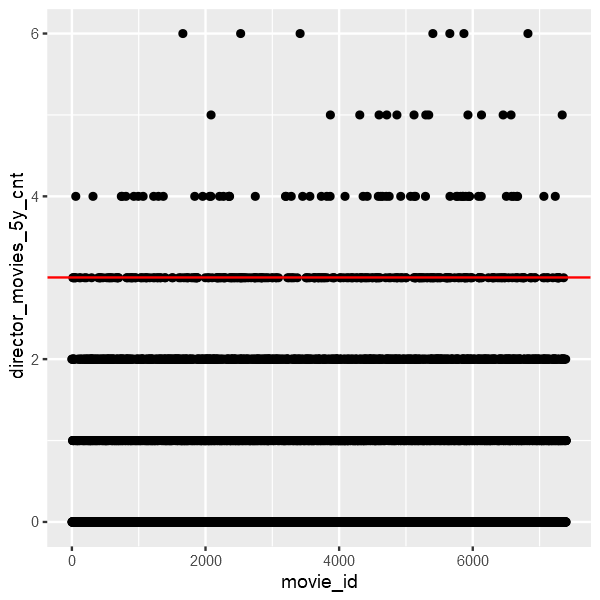

In [255]:
ggplot(data=movies_ff) +
    geom_point(aes(x=movie_id, y=director_movies_5y_cnt)) + 
    geom_hline(yintercept = 3 ,color="red")

In [256]:
out_director_movies_5y_cnt <- boxplot(movies_ff$director_movies_5y_cnt) 

In [257]:
head(out_director_movies_5y_cnt$out)
min(out_director_movies_5y_cnt$out)
max(out_director_movies_5y_cnt$out)
median(out_director_movies_5y_cnt$out)
mean(out_director_movies_5y_cnt$out)

[1] 3 3 3 3 3 4

[1] 3

[1] 6

[1] 3

[1] 3.3

### Ganres

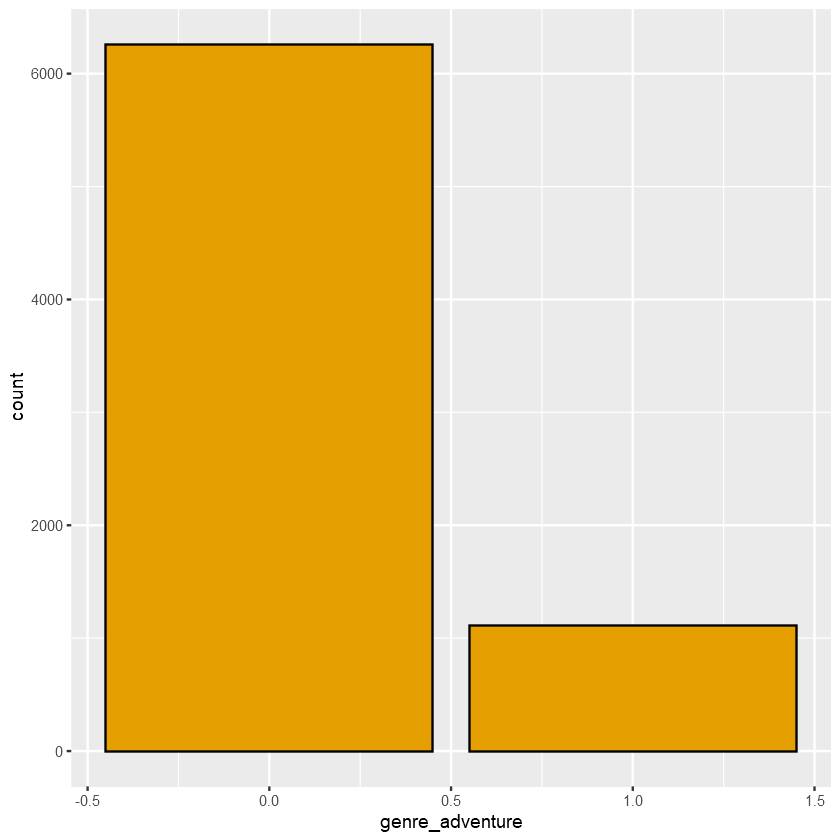

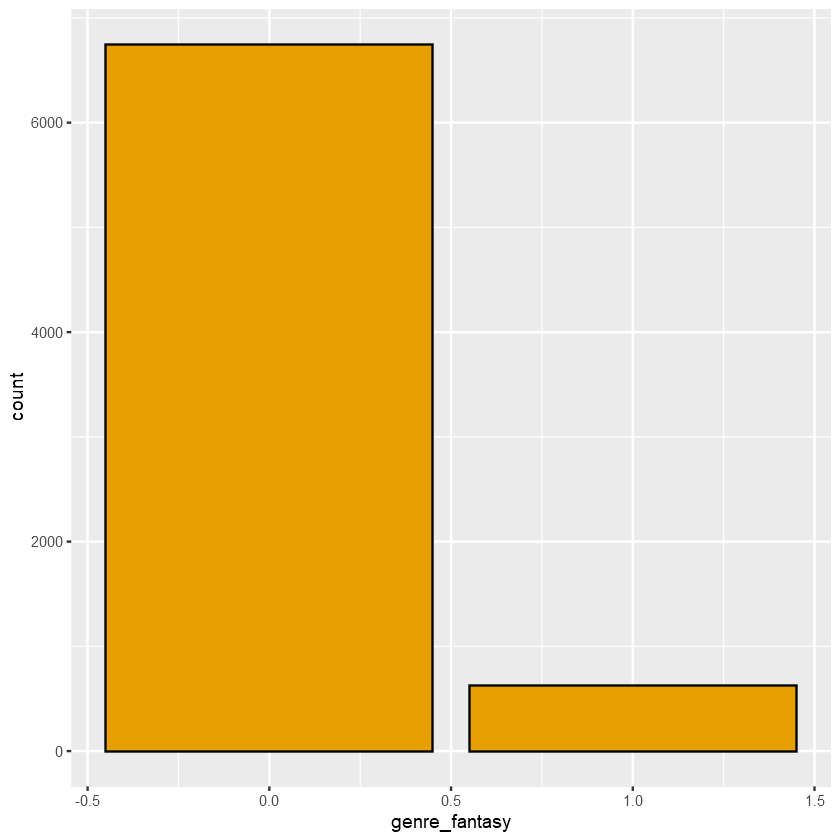

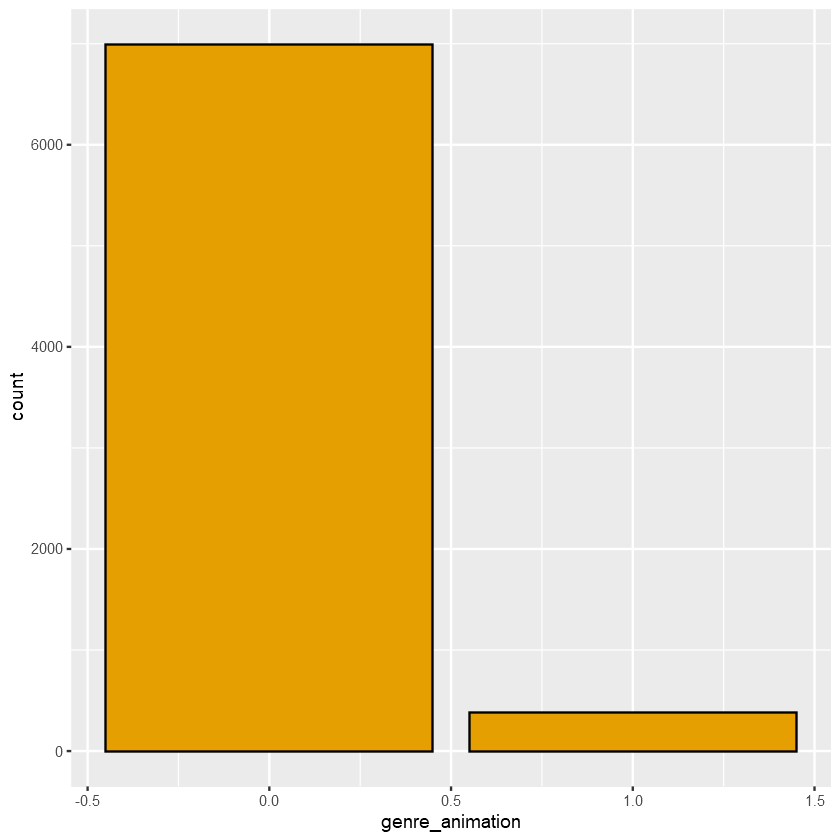

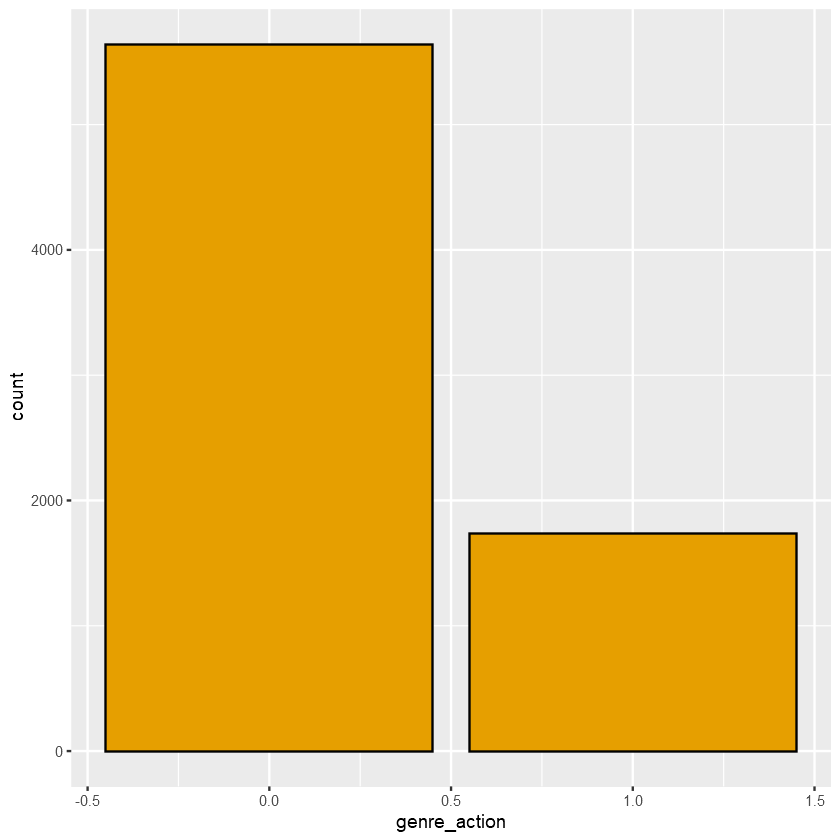

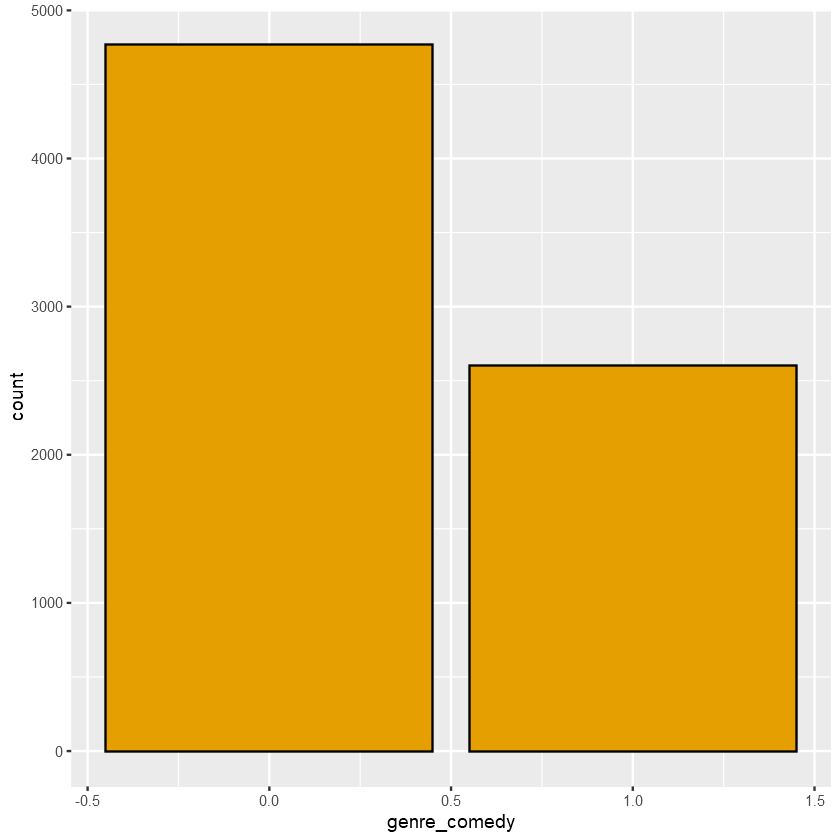

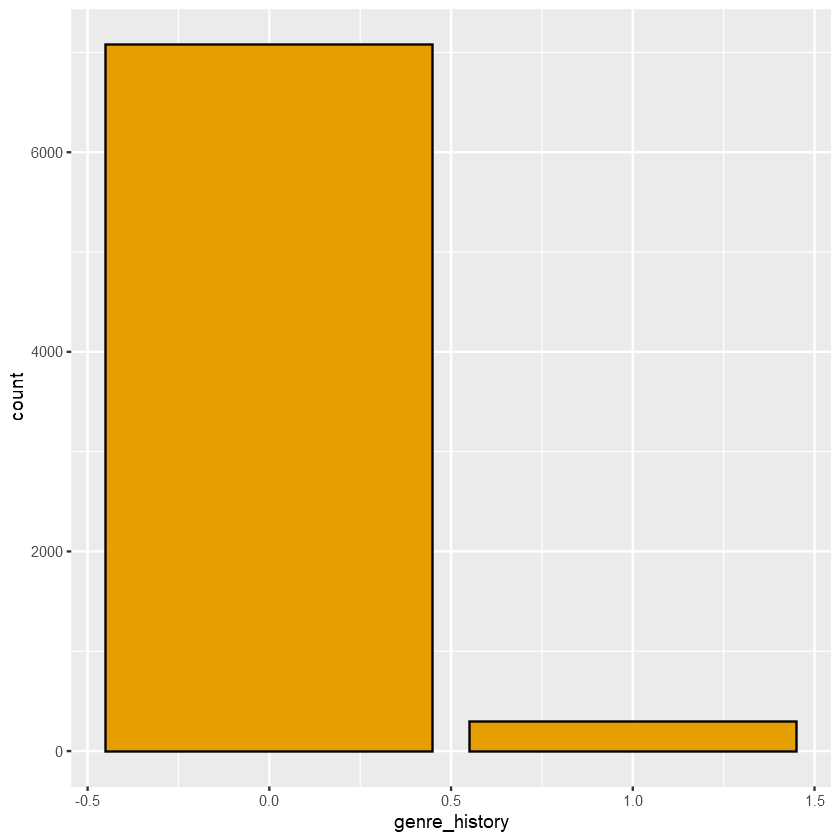

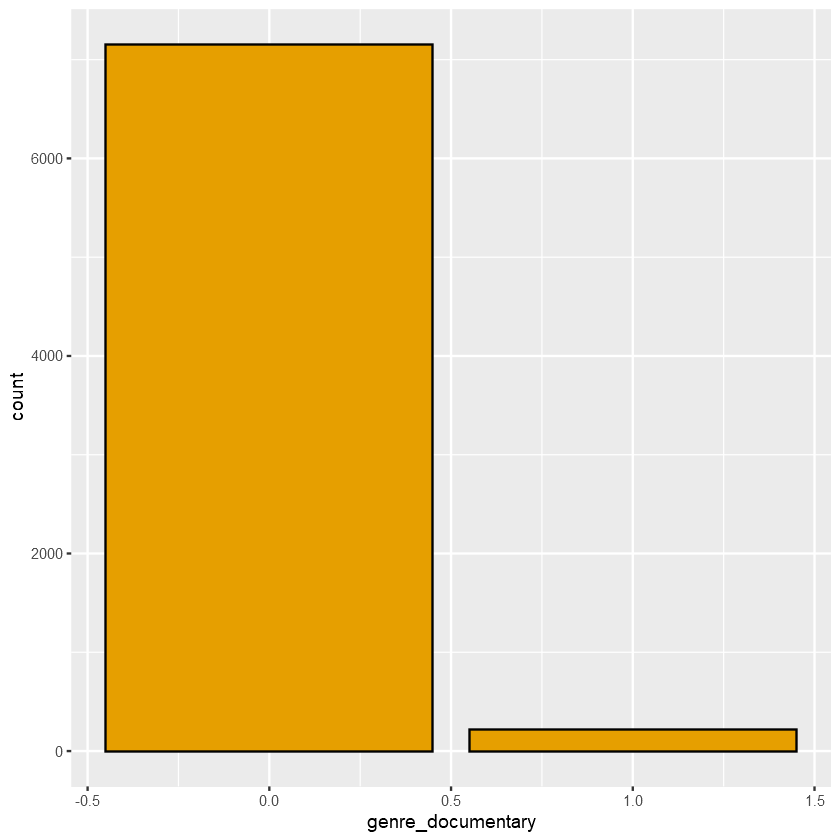

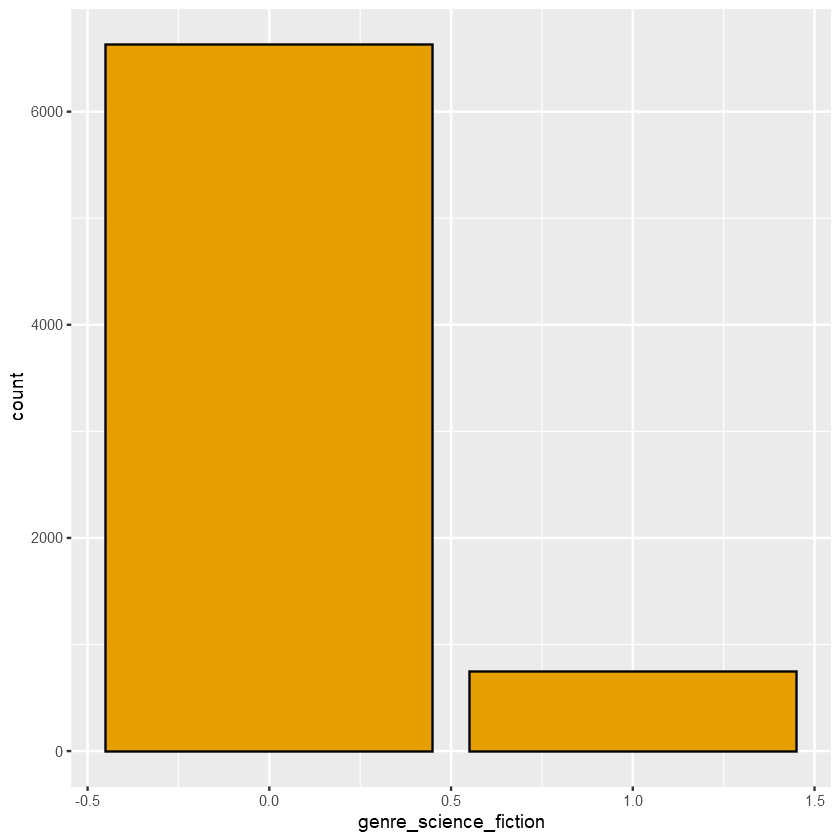

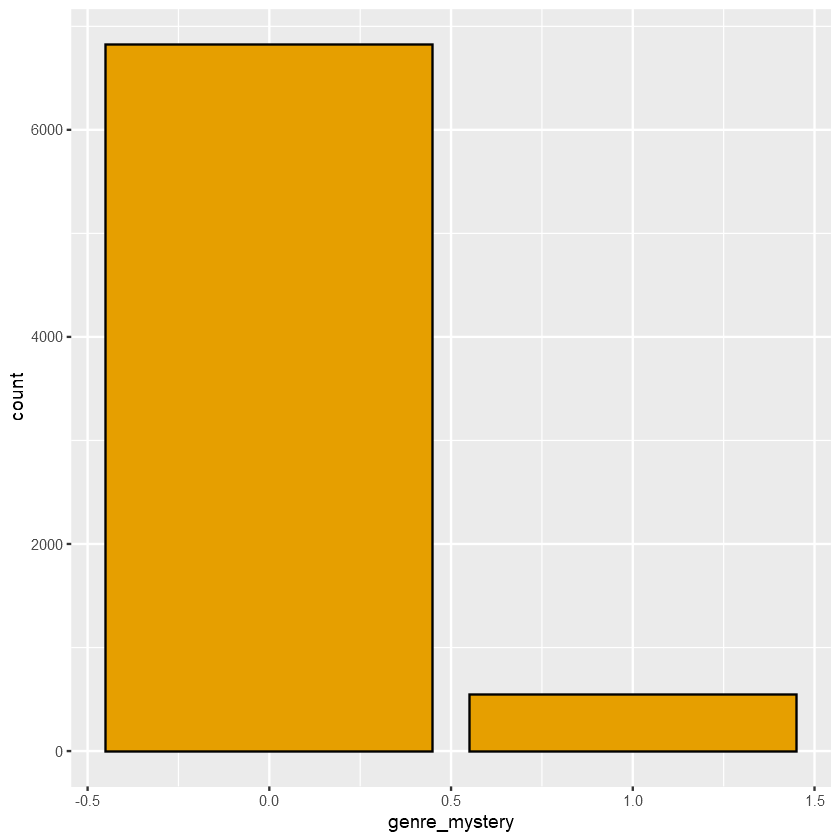

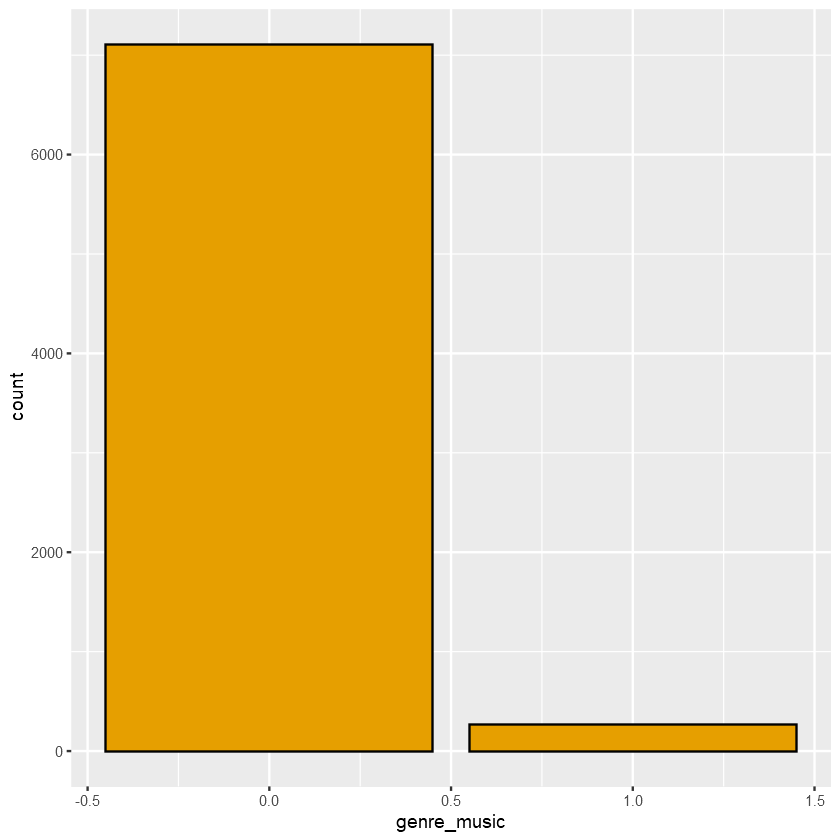

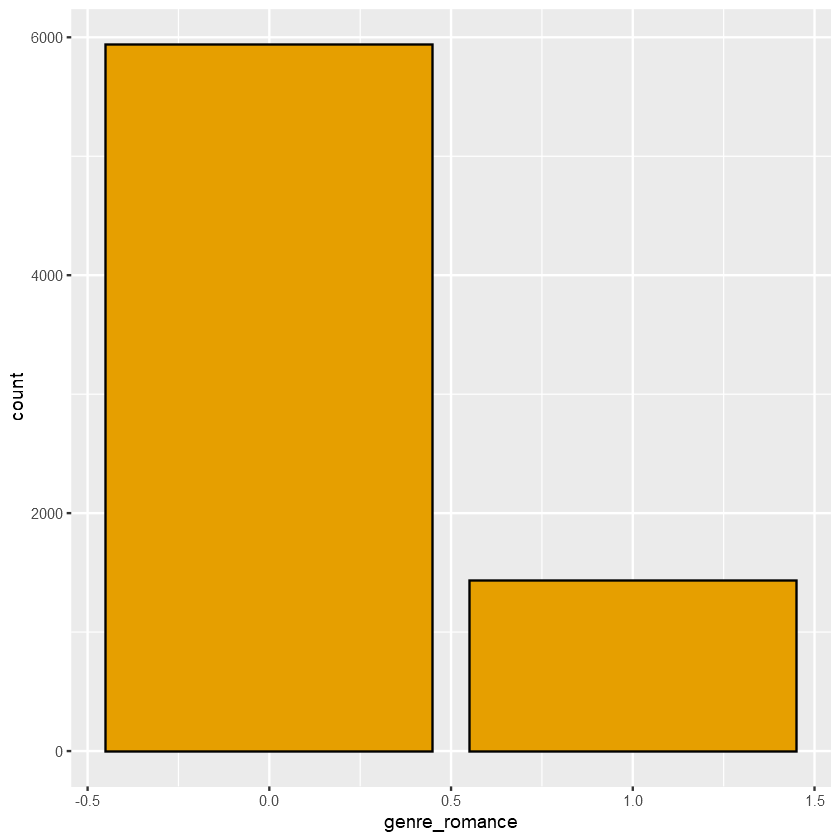

In [14]:
par(mfrow=c(2,5))

nm <- names(movies_ff[,1:84])

for (i in 44:62) {
    x <- movies_ff[,i]
    print( ggplot(movies_ff, aes(x)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    xlab(nm[i]) +
    theme_get())
    }

### Departments Analysis

Warning message:
"Removed 34 rows containing non-finite values (stat_count)."
Warning message:
"Removed 34 rows containing non-finite values (stat_count)."


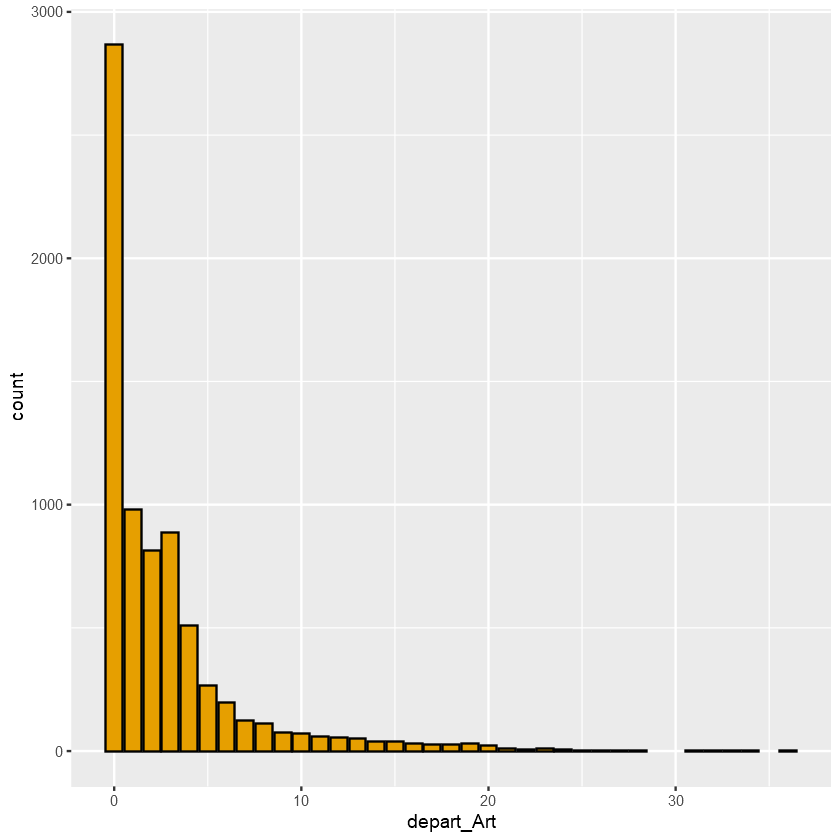

Warning message:
"Removed 34 rows containing non-finite values (stat_count)."


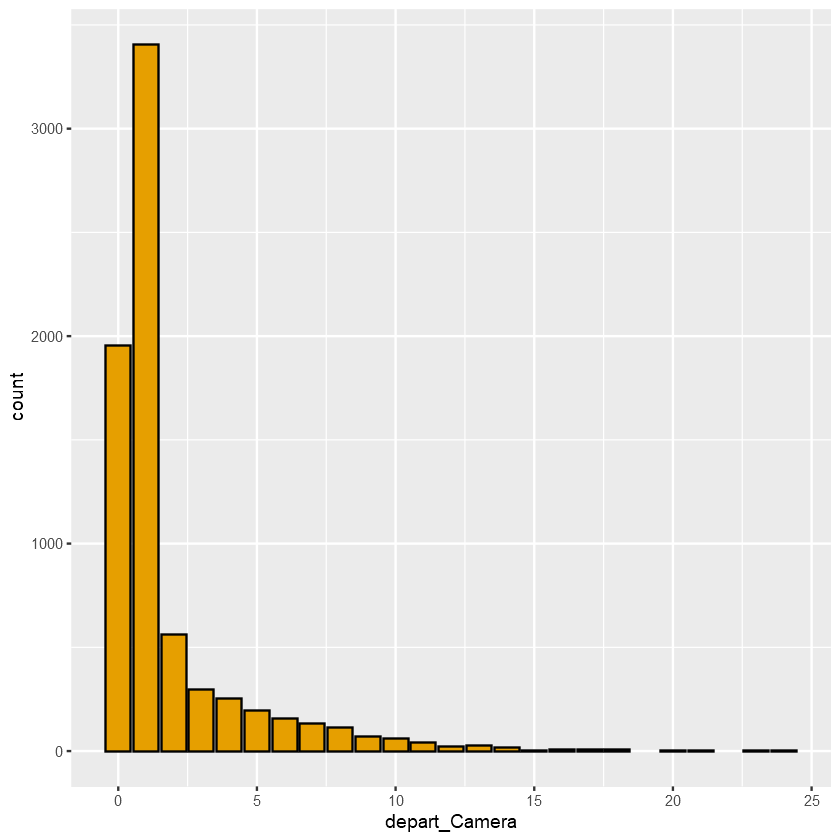

Warning message:
"Removed 34 rows containing non-finite values (stat_count)."


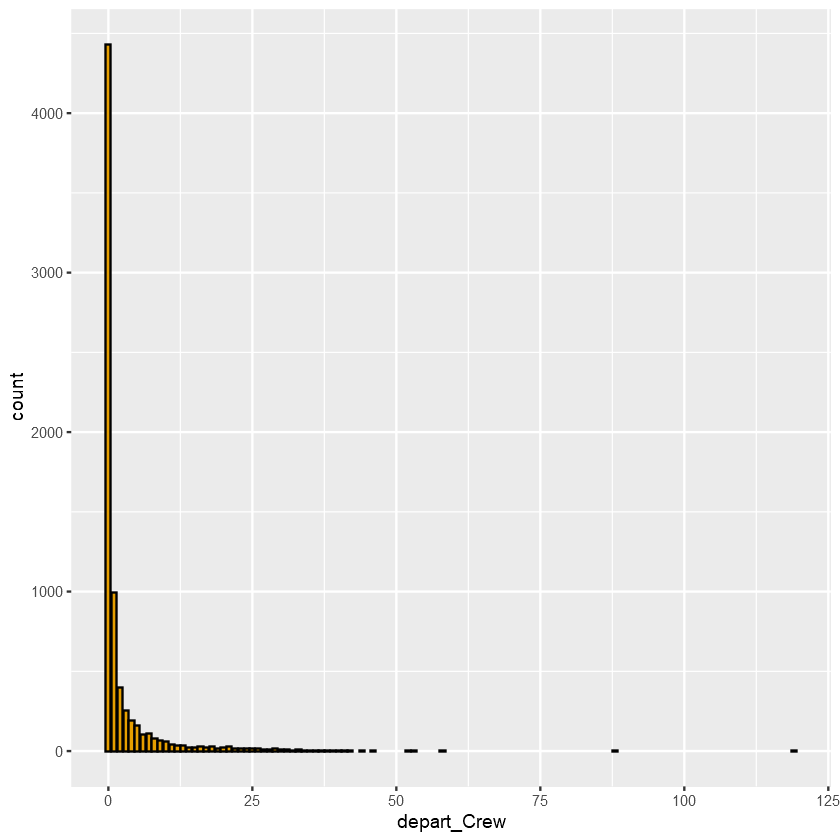

Warning message:
"Removed 34 rows containing non-finite values (stat_count)."


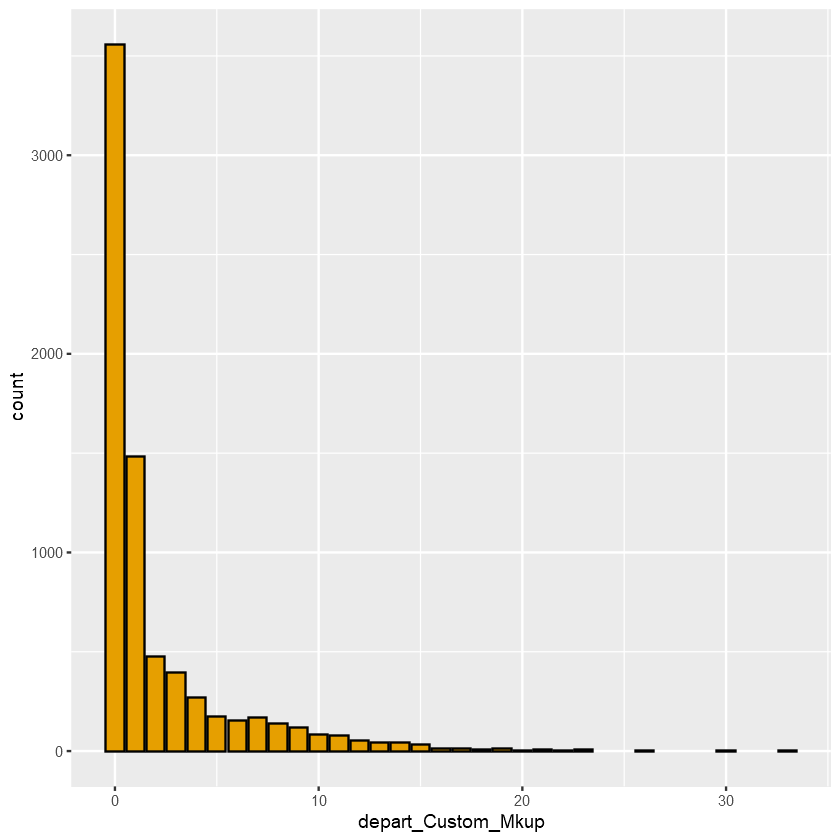

Warning message:
"Removed 34 rows containing non-finite values (stat_count)."


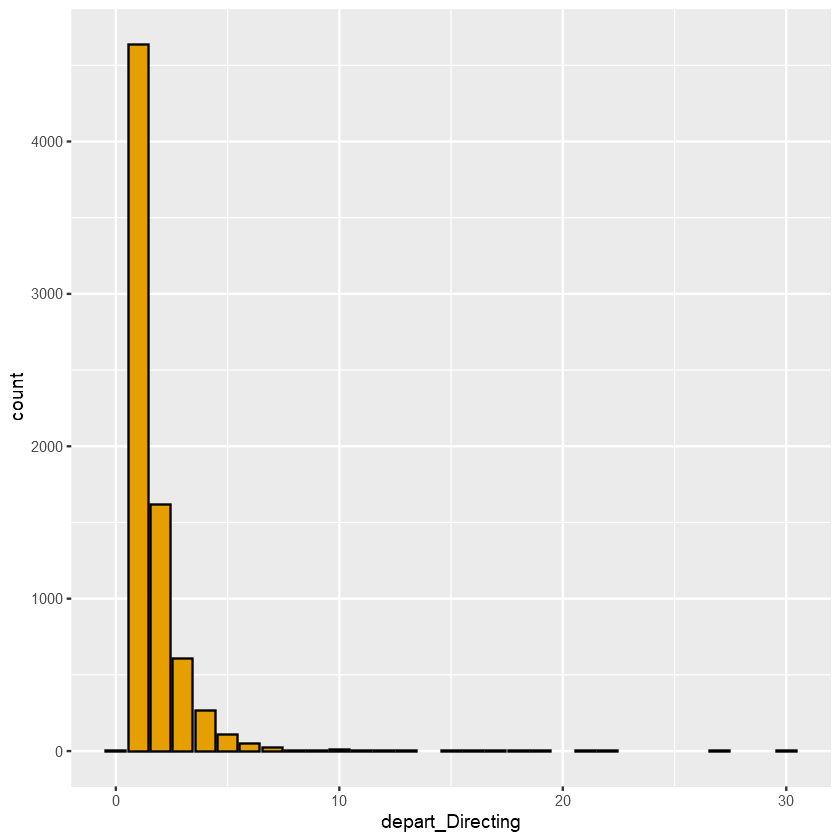

Warning message:
"Removed 34 rows containing non-finite values (stat_count)."


Warning message:
"Removed 34 rows containing non-finite values (stat_count)."


Warning message:
"Removed 34 rows containing non-finite values (stat_count)."


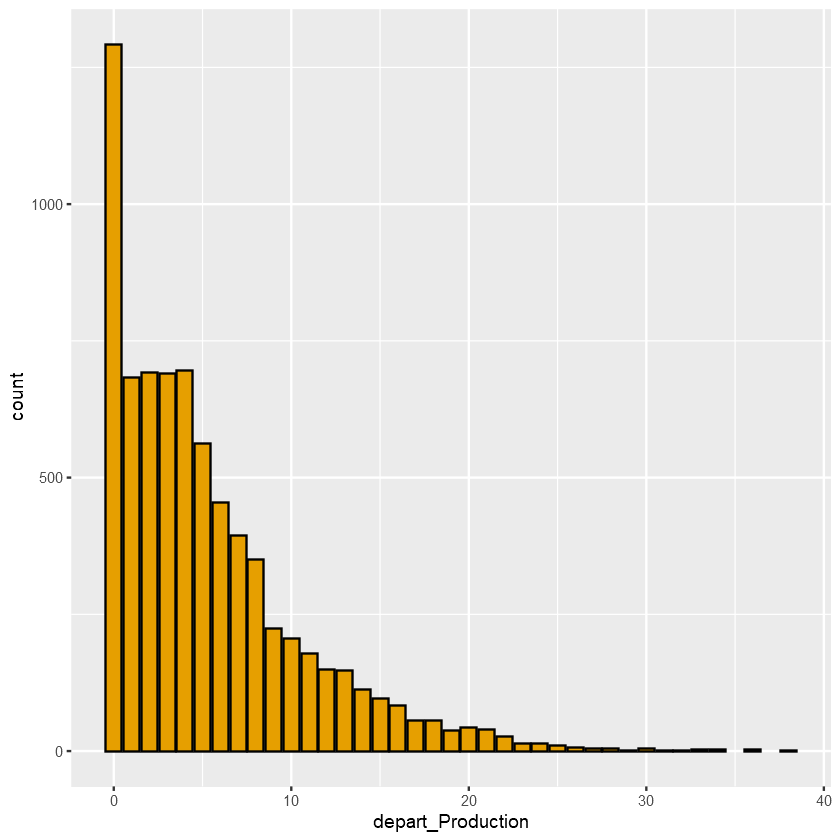

Warning message:
"Removed 34 rows containing non-finite values (stat_count)."


Warning message:
"Removed 34 rows containing non-finite values (stat_count)."


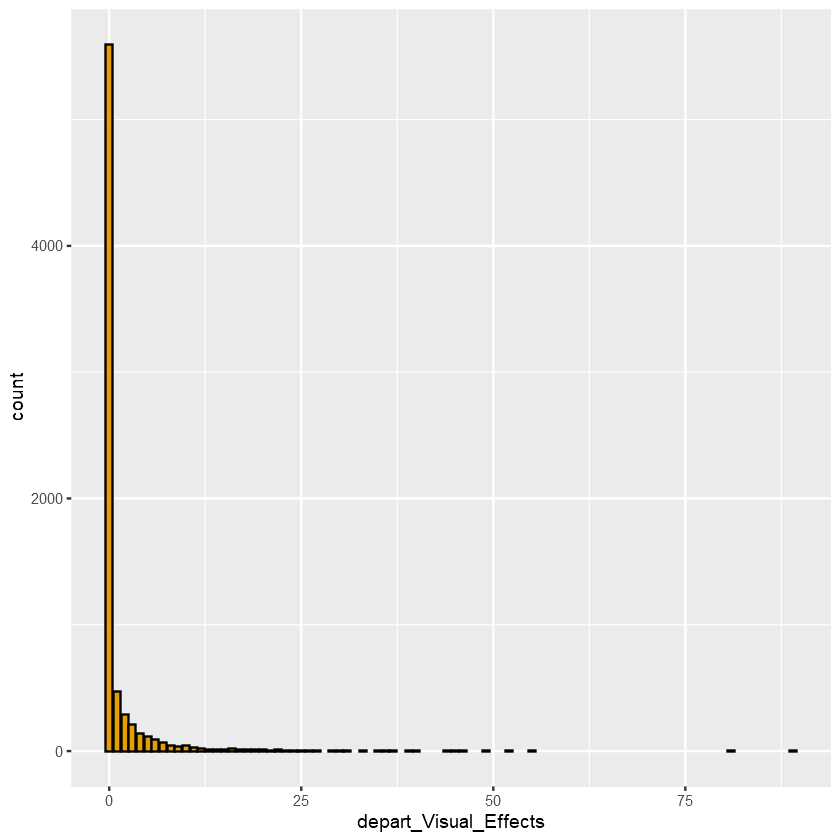

Warning message:
"Removed 34 rows containing non-finite values (stat_count)."


Warning message:
"Removed 34 rows containing non-finite values (stat_count)."


Warning message:
"Removed 34 rows containing non-finite values (stat_count)."


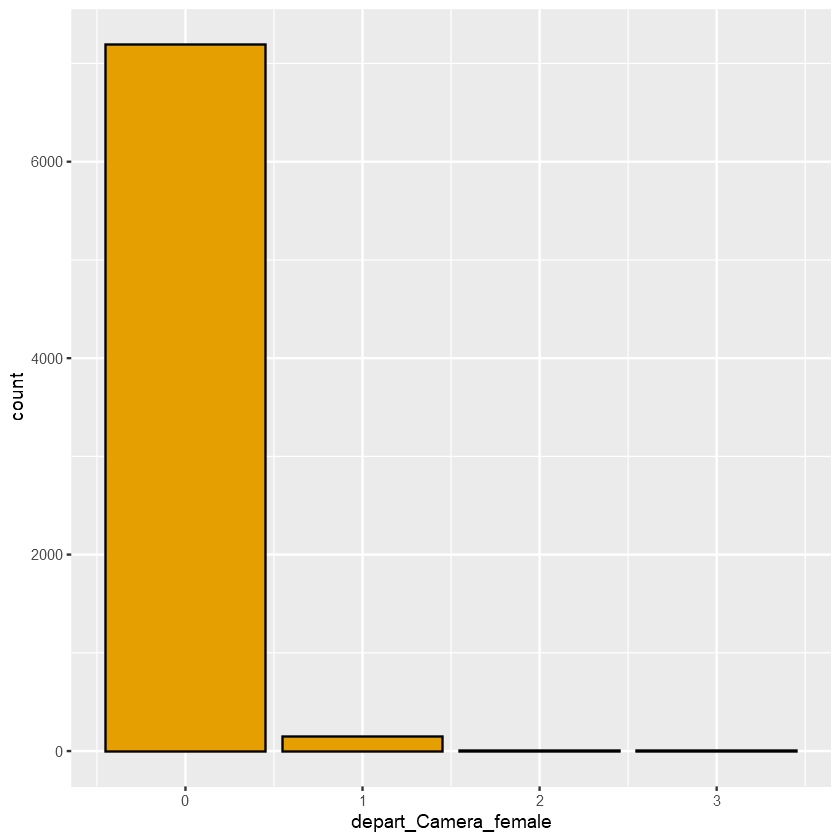

Warning message:
"Removed 34 rows containing non-finite values (stat_count)."


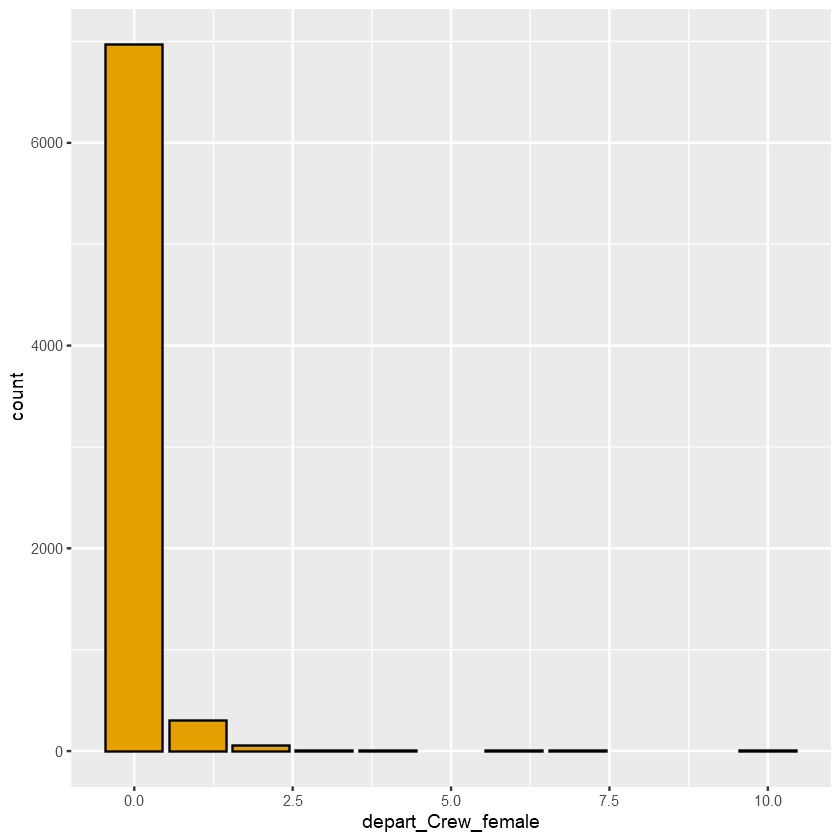

Warning message:
"Removed 34 rows containing non-finite values (stat_count)."


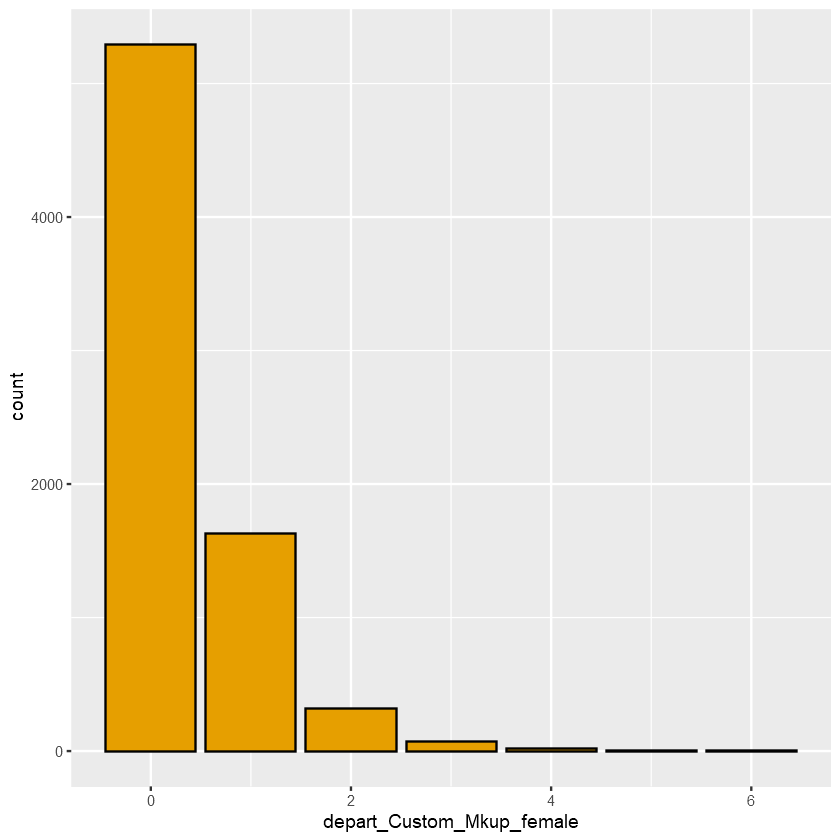

Warning message:
"Removed 34 rows containing non-finite values (stat_count)."


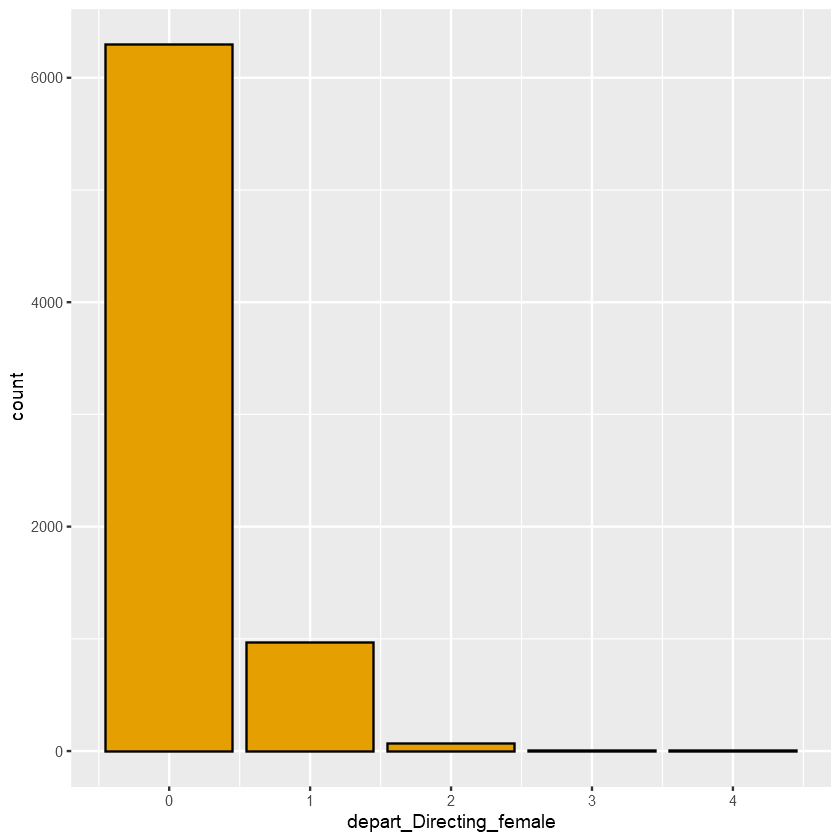

Warning message:
"Removed 34 rows containing non-finite values (stat_count)."


Warning message:
"Removed 34 rows containing non-finite values (stat_count)."


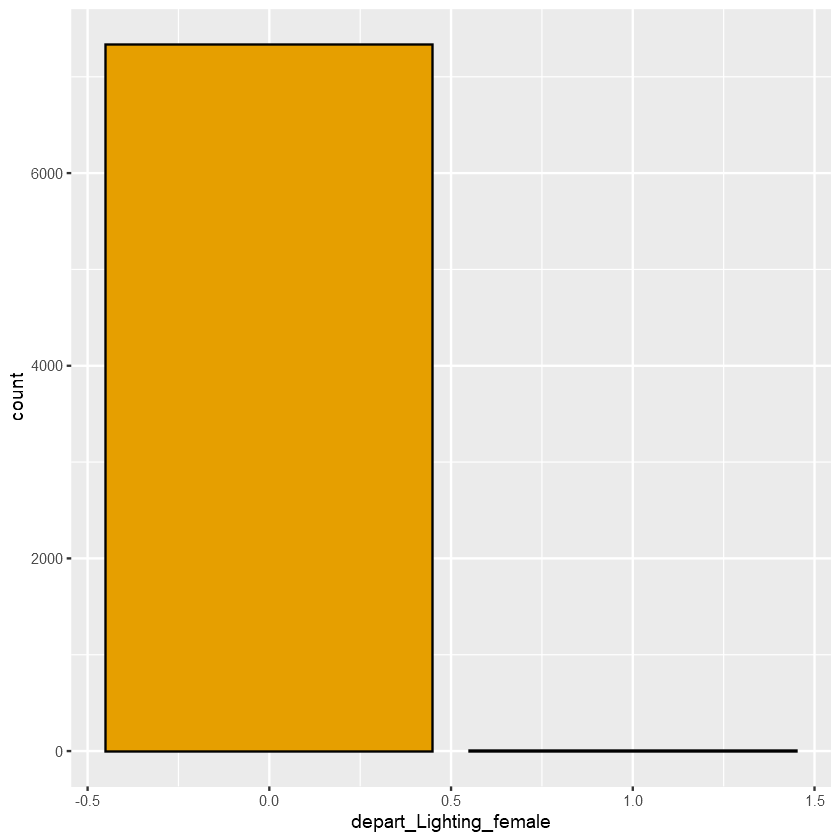

Warning message:
"Removed 34 rows containing non-finite values (stat_count)."


Warning message:
"Removed 34 rows containing non-finite values (stat_count)."


Warning message:
"Removed 34 rows containing non-finite values (stat_count)."


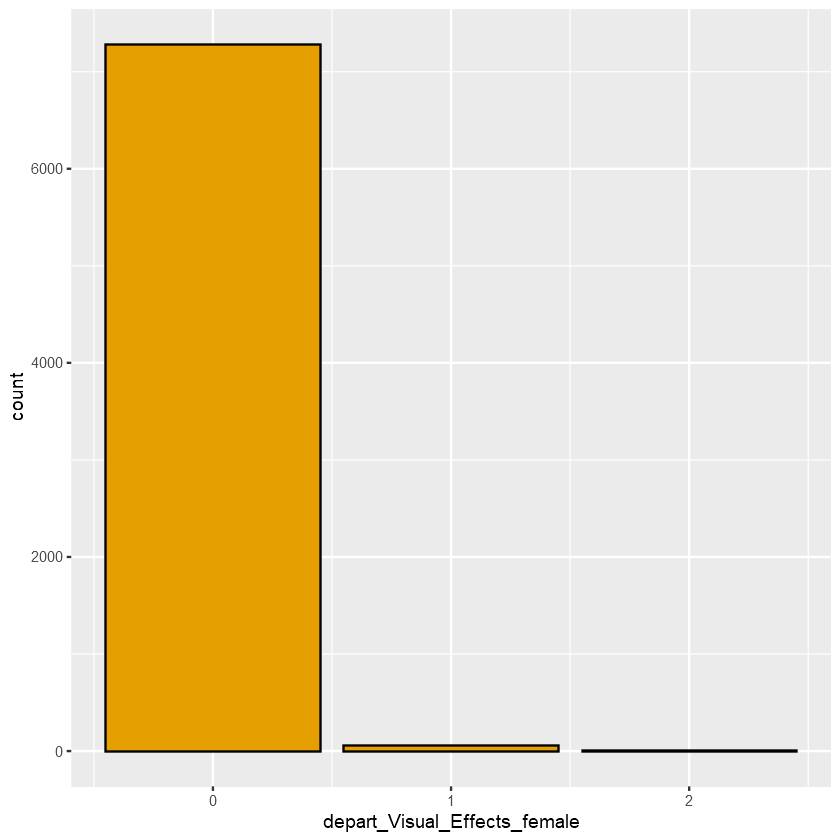

In [15]:
par(mfrow=c(2,5))

nm <- names(movies_ff[,1:84])

for (i in 63:84) {
    x <- movies_ff[,i]
    print( ggplot(movies_ff, aes(x)) + 
    geom_bar(color = "black", fill = "#E69F00")  +
    xlab(nm[i]) +
    theme_get())

}

Warning message:
"Removed 34 rows containing missing values (geom_point)."
Warning message:
"Removed 34 rows containing missing values (geom_point)."


Warning message:
"Removed 34 rows containing missing values (geom_point)."


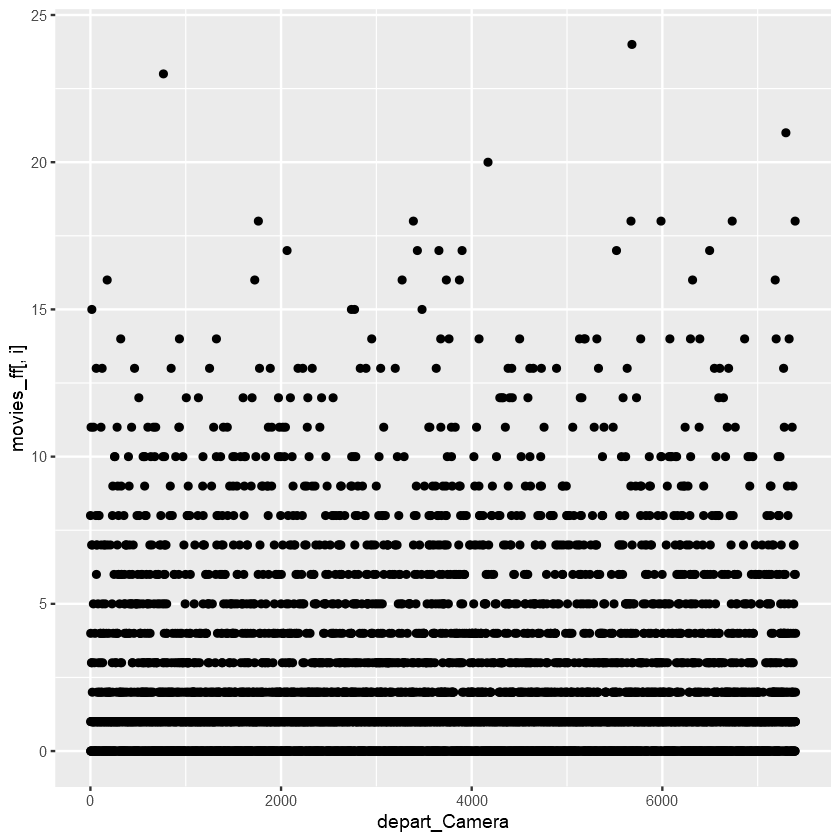

Warning message:
"Removed 34 rows containing missing values (geom_point)."


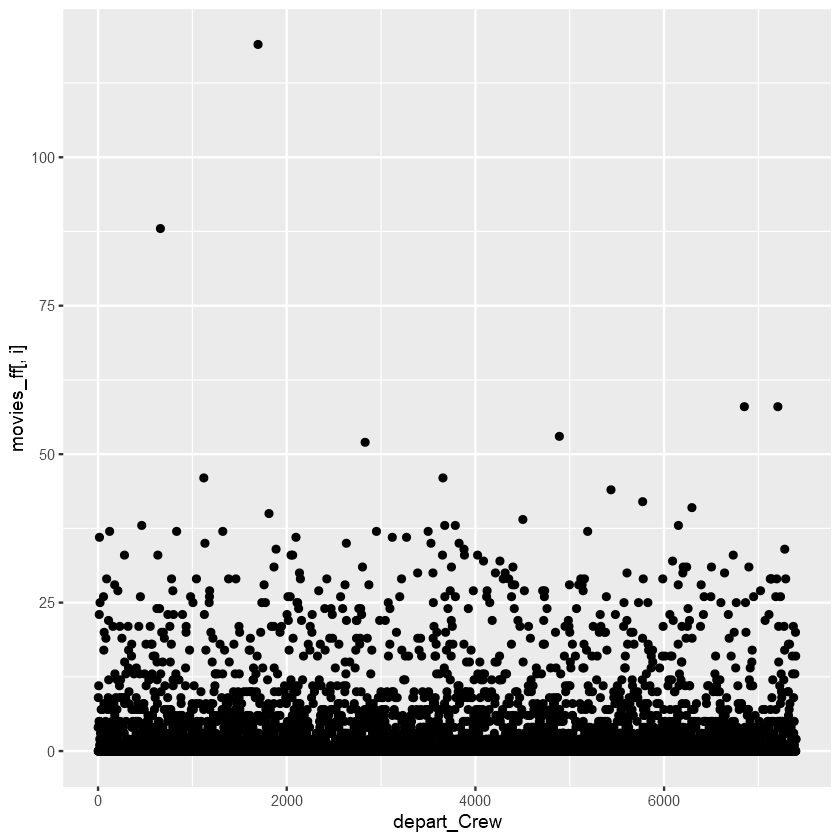

Warning message:
"Removed 34 rows containing missing values (geom_point)."


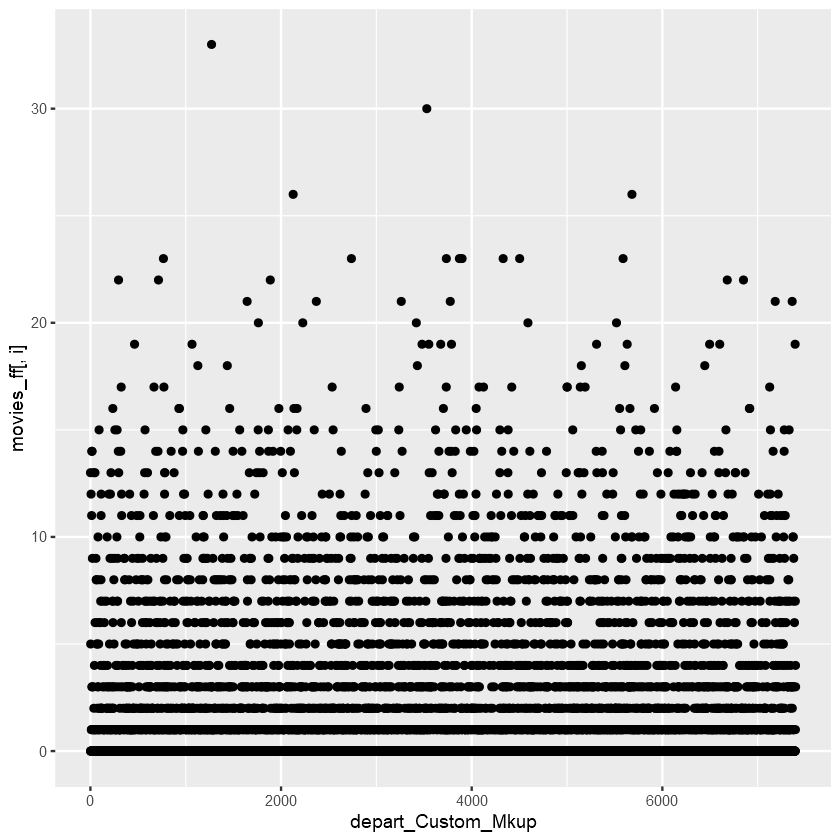

Warning message:
"Removed 34 rows containing missing values (geom_point)."


Warning message:
"Removed 34 rows containing missing values (geom_point)."


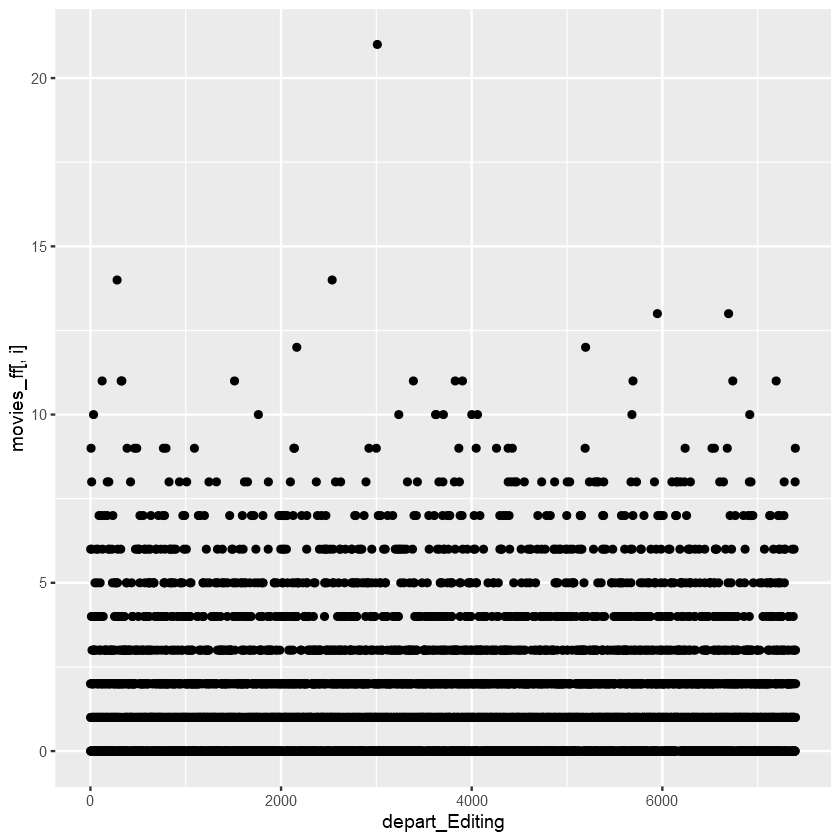

Warning message:
"Removed 34 rows containing missing values (geom_point)."


Warning message:
"Removed 34 rows containing missing values (geom_point)."


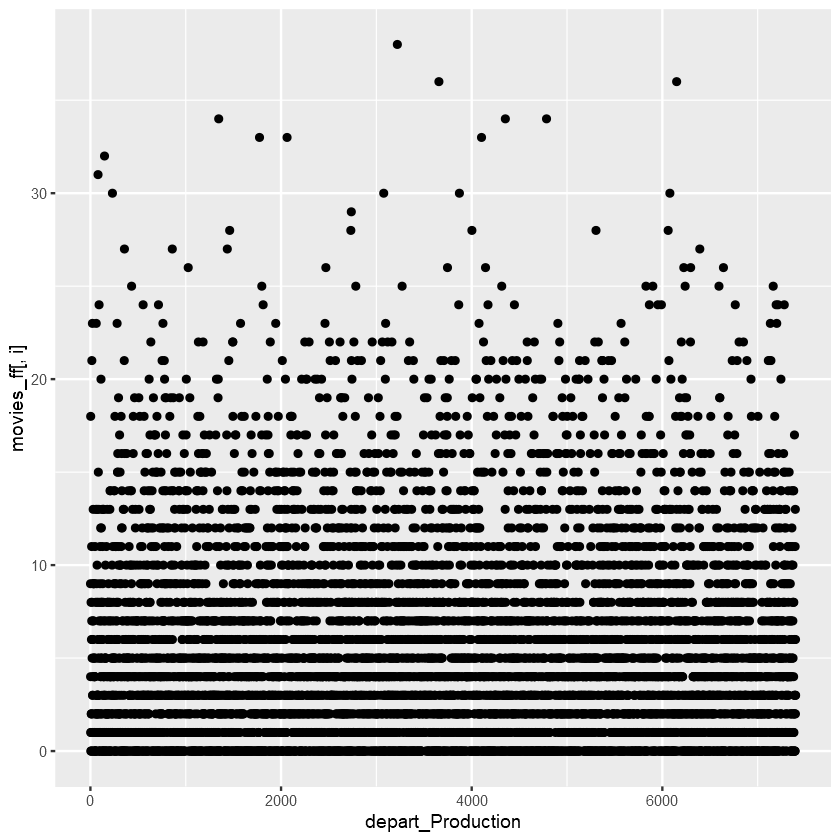

Warning message:
"Removed 34 rows containing missing values (geom_point)."


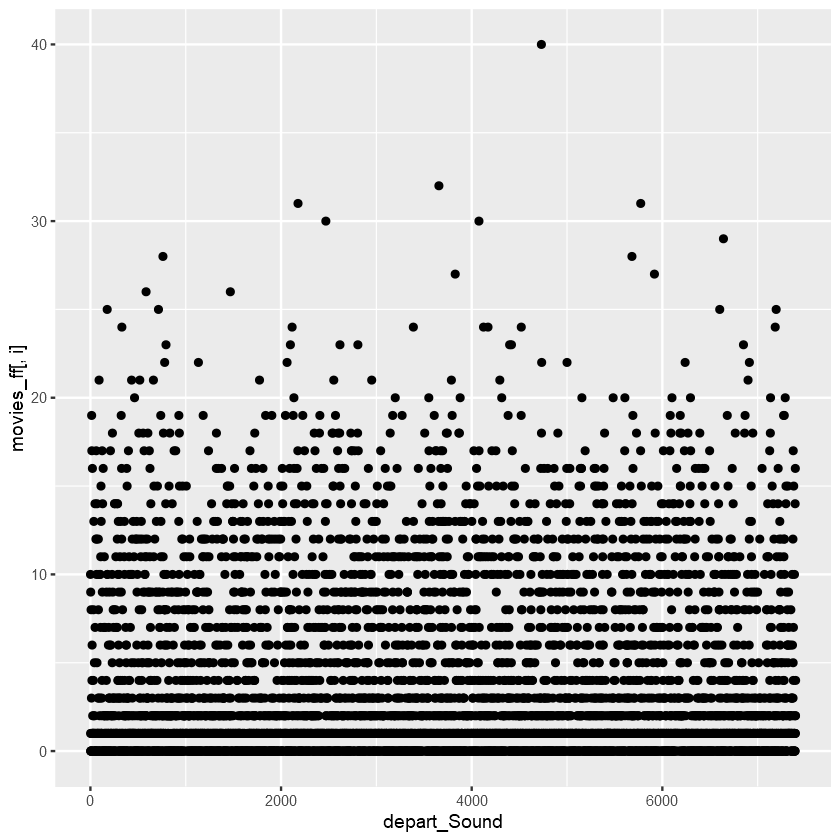

Warning message:
"Removed 34 rows containing missing values (geom_point)."


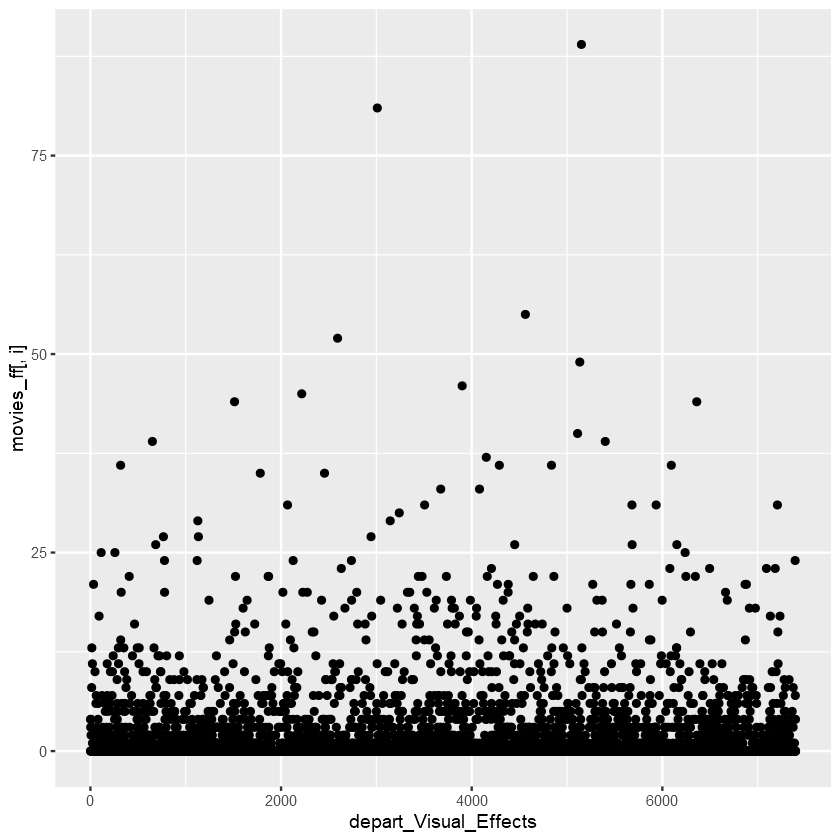

Warning message:
"Removed 34 rows containing missing values (geom_point)."


Warning message:
"Removed 34 rows containing missing values (geom_point)."


Warning message:
"Removed 34 rows containing missing values (geom_point)."


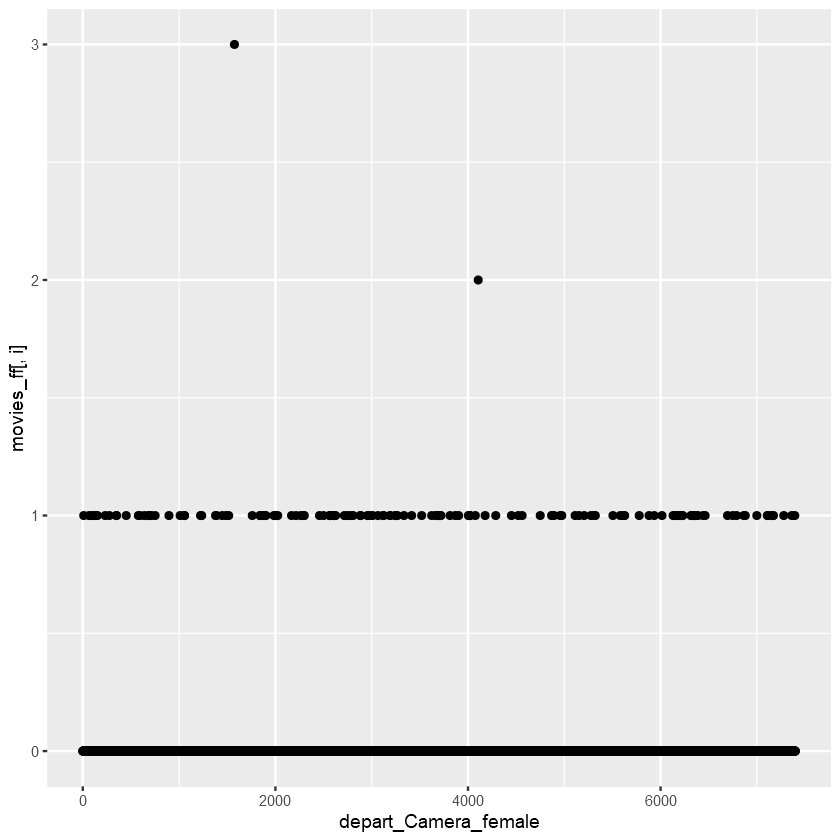

Warning message:
"Removed 34 rows containing missing values (geom_point)."


Warning message:
"Removed 34 rows containing missing values (geom_point)."


Warning message:
"Removed 34 rows containing missing values (geom_point)."


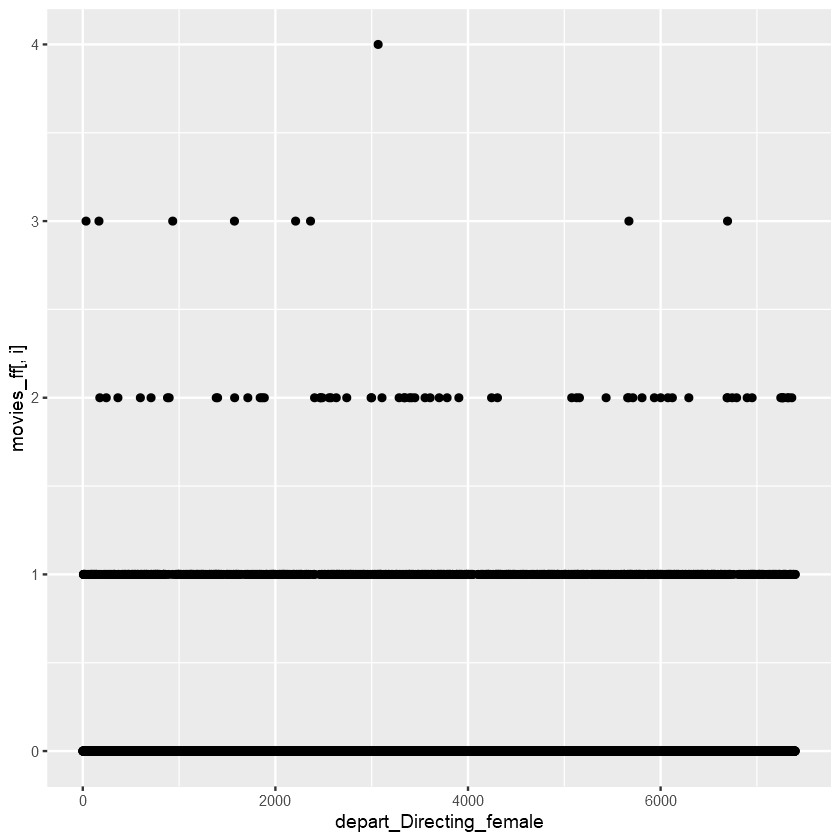

Warning message:
"Removed 34 rows containing missing values (geom_point)."


Warning message:
"Removed 34 rows containing missing values (geom_point)."


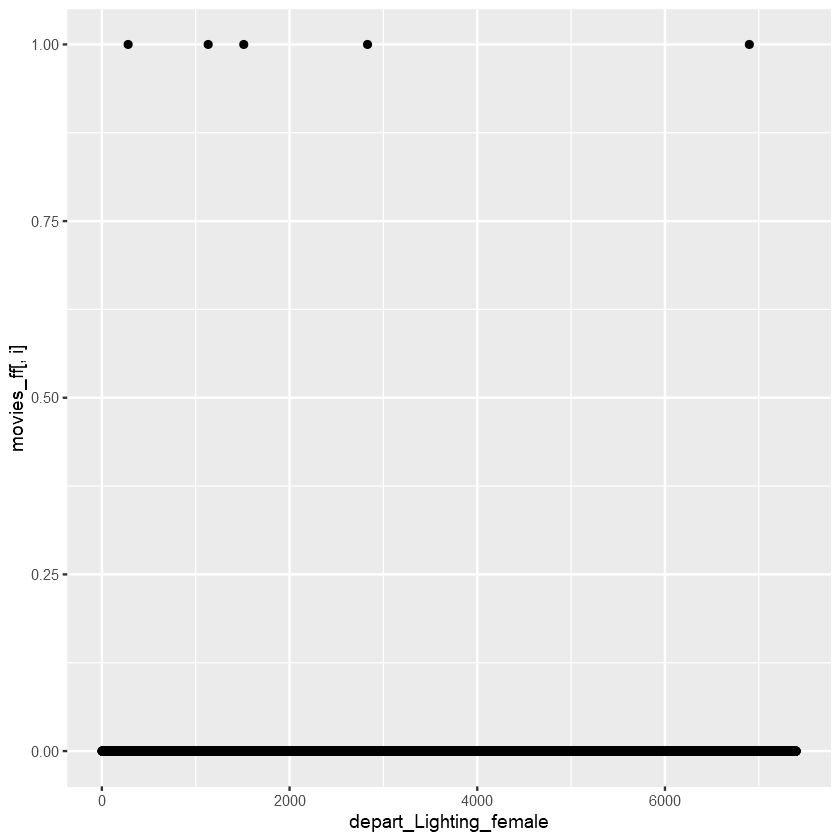

Warning message:
"Removed 34 rows containing missing values (geom_point)."


Warning message:
"Removed 34 rows containing missing values (geom_point)."


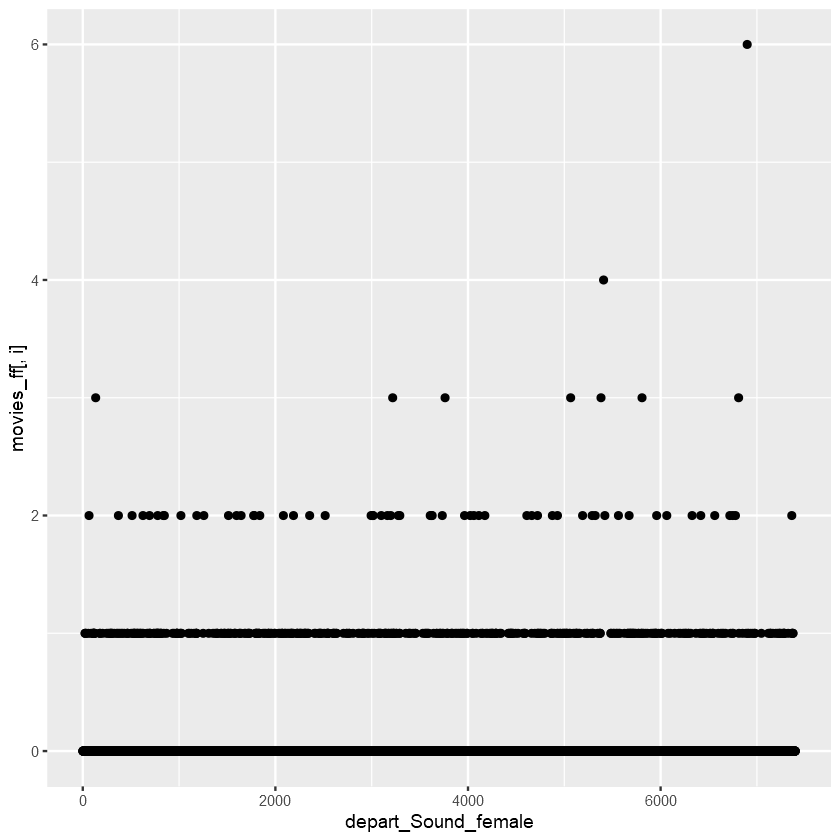

Warning message:
"Removed 34 rows containing missing values (geom_point)."


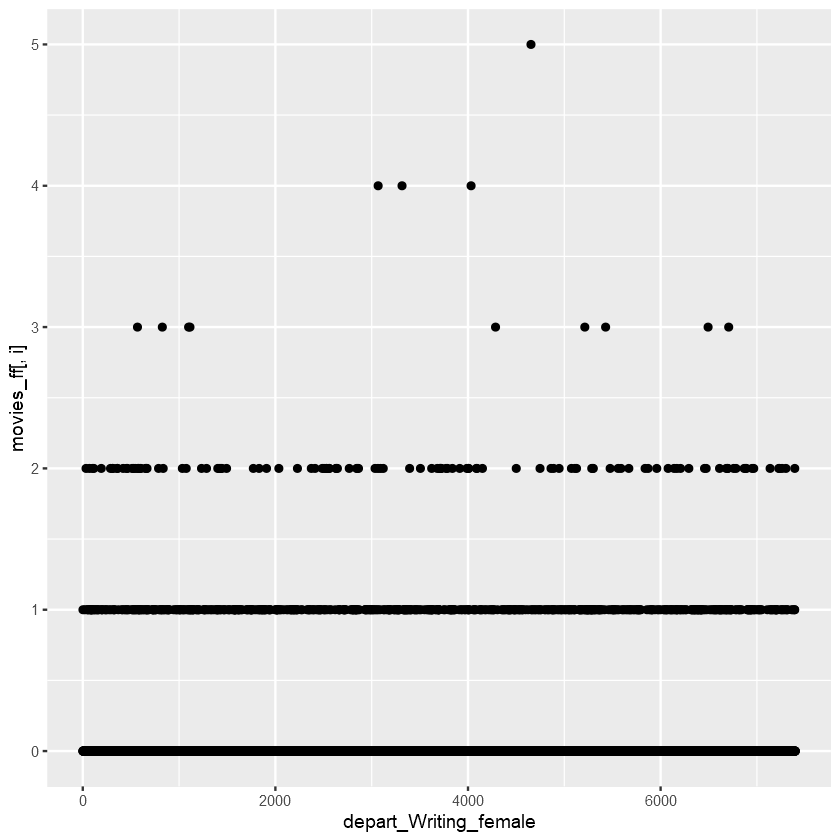

In [16]:
par(mfrow=c(2,5))

for (i in 63:84) {
    print(ggplot(data=movies_ff) +
          geom_point(aes(x=movie_id, y=movies_ff[,i])) +
          xlab(nm[i]))
} 


In [ ]:
out_director_movies_5y_cnt <- boxplot(movies_ff$director_movies_5y_cnt) 

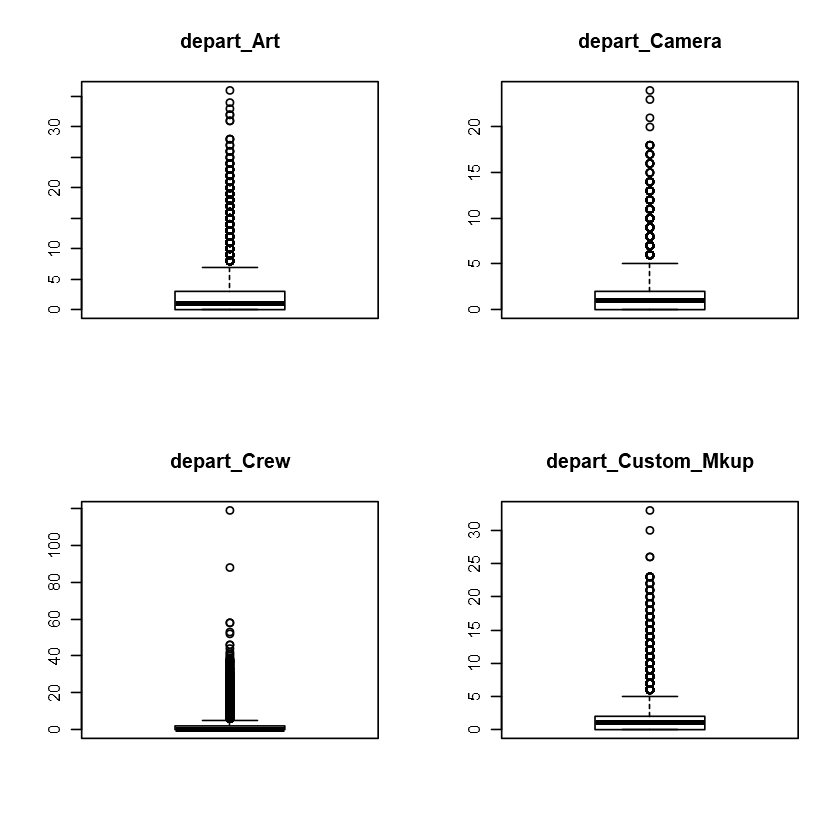

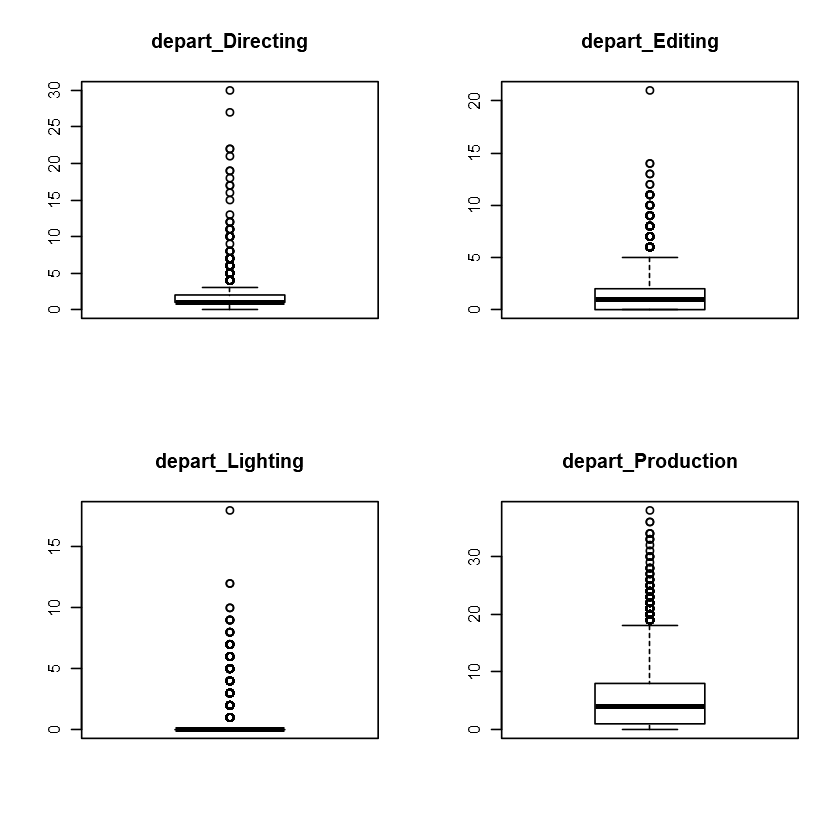

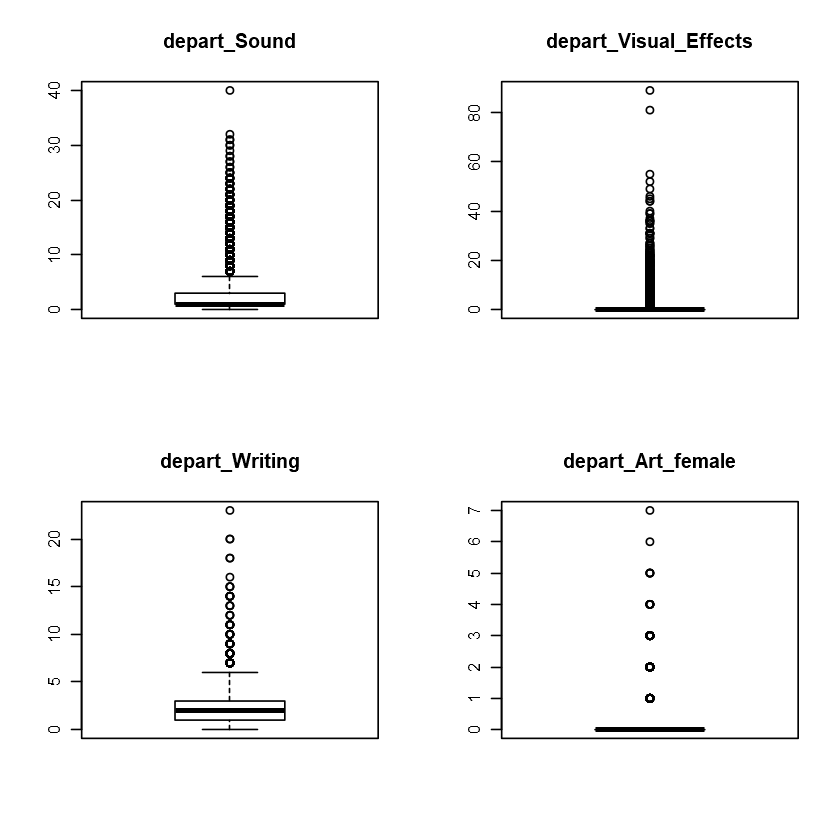

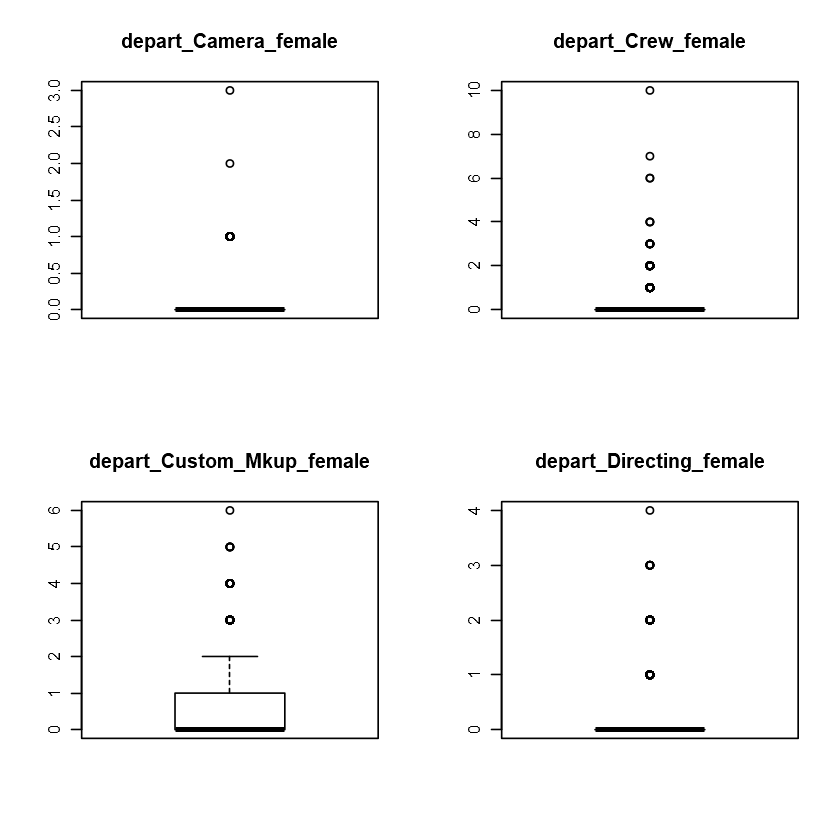

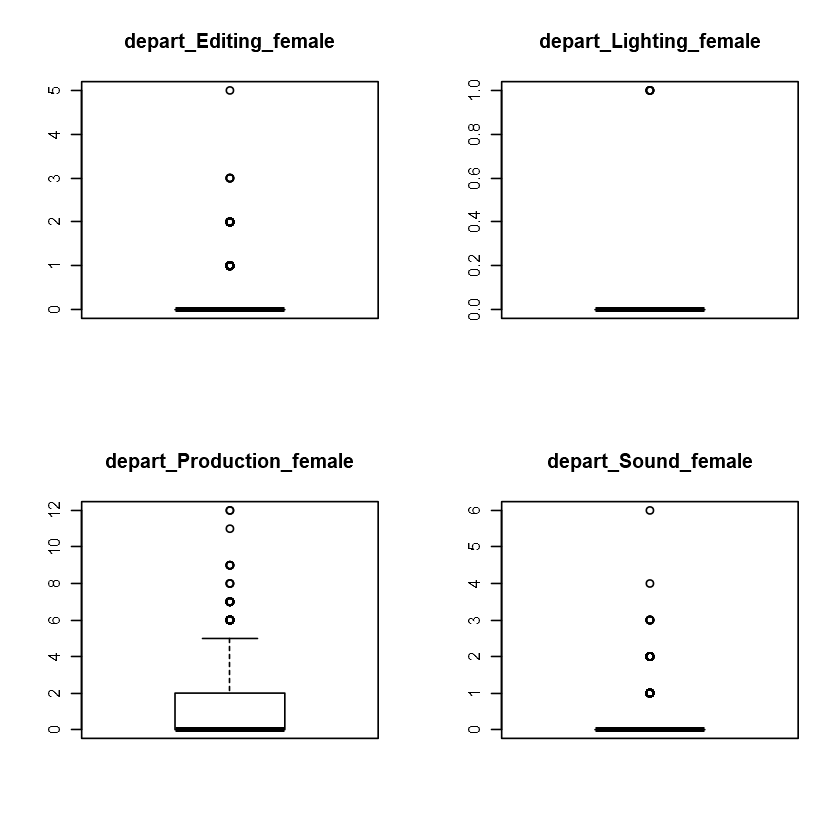

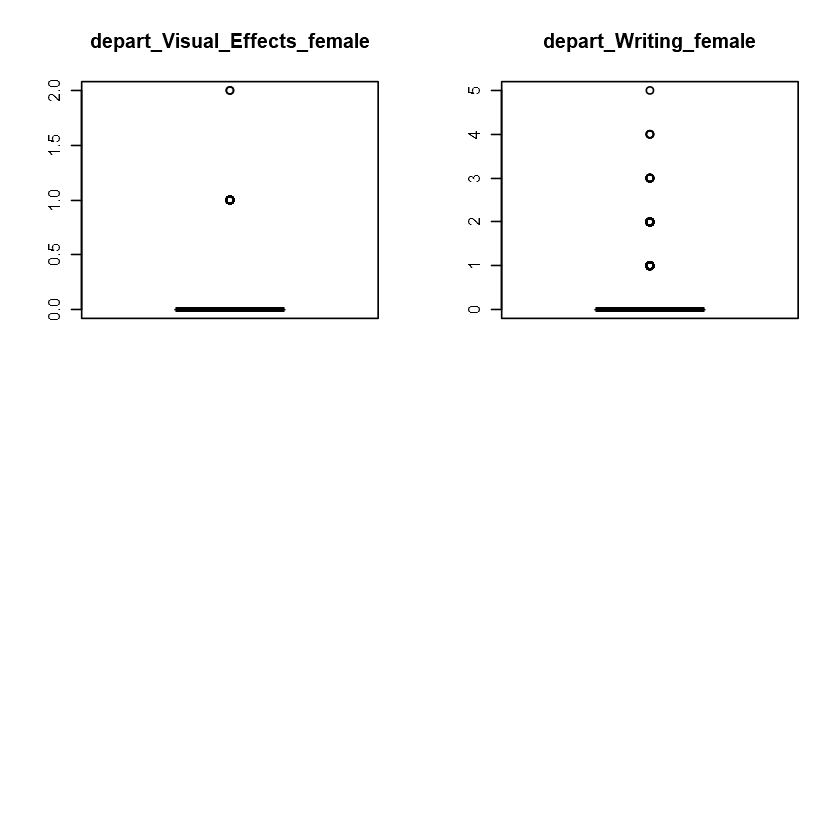

In [17]:
par(mfrow=c(2,2))

for (i in 63:84) {
   boxplot(movies_ff[,i], main = nm[i]) 
} 

##  2.3 Correlation matrix

In [316]:
cor_res <- cor(movies_ff[5:84],y=NULL, use ="pairwise.complete.obs")
head(cor_res)

Warning message in cor(movies_ff[5:84], y = NULL, use = "pairwise.complete.obs"):
"the standard deviation is zero"


runtime budget  popularity revenue sw_lang_en
runtime                       1.0000  0.2165  0.1122     0.2168 -0.1256   
budget                        0.2165  1.0000  0.3394     0.7528  0.1904   
popularity                    0.1122  0.3394  1.0000     0.4611  0.1194   
revenue                       0.2168  0.7528  0.4611     1.0000  0.1417   
sw_lang_en                   -0.1256  0.1904  0.1194     0.1417  1.0000   
sw_web_presence               0.0318  0.2520  0.1641     0.2631  0.0358   
sw_has_poster                 0.0097  0.0101  0.0115     0.0089  0.0170   
sw_tagline                    0.0031  0.2100  0.1557     0.1793  0.3998   
release_year                 -0.0359  0.2202  0.1022     0.1382 -0.1393   
release_month                 0.1291  0.0374  0.0194     0.0208  0.0143   
high_release_month            0.0580 -0.0750 -0.0231    -0.0860  0.0026   
release_day                   0.0267  0.0332  0.0367     0.0451  0.0020   
seasonality                   0.1077  0.1745  0.0749     0.2016  0.0111   
sw_collection                 0.0355  0.1229  0.0836     0.1321 -0.0251   
producers_cnt                 0.0726  0.1874  0.1046     0.1292 -0.0581   
countries_cnt                 0.1009  0.0987  0.0719     0.0521 -0.0601   
lang_US                      -0.0878  0.1866  0.1344     0.1336  0.7745   
lang_FR                       0.0652  0.0004 -0.0018     0.0061 -0.1569   
lang_RU                       0.0354  0.0115 -0.0185    -0.0070 -0.1461   
lang_ES                       0.0441  0.0231  0.0084     0.0237 -0.0637   
lang_JA                       0.0588  0.0065  0.0151    -0.0034 -0.2026   
keywords_cnt                  0.1374  0.1971  0.1806     0.1868  0.1315   
actor0_movies_cnt             0.0614  0.3199  0.1669     0.2163  0.2336   
actor0_movies_5y_cnt          0.0507  0.2968  0.1534     0.1995  0.2471   
actor1_movies_cnt             0.0436  0.2872  0.1418     0.1949  0.2137   
actor1_movies_5y_cnt          0.0556  0.2913  0.1537     0.2132  0.2339   
actor2_movies_cnt             0.0337  0.2809  0.1520     0.1774  0.2180   
actor2_movies_5y_cnt          0.0470  0.3038  0.1438     0.2160  0.2295   
sw_female_actor0             -0.0653 -0.0659 -0.0002    -0.0352  0.0245   
sw_female_actor1              0.0073 -0.0015  0.0101     0.0119  0.0681   
...                          ...     ...     ...        ...     ...       
genre_documentary            -0.0813 -0.1022 -0.0807    -0.0782  0.0323   
genre_science_fiction        -0.0213  0.1988  0.0987     0.1321  0.0515   
genre_mystery                 0.0296  0.0085  0.0232    -0.0150  0.0319   
genre_music                   0.0297 -0.0437 -0.0275    -0.0324  0.0493   
genre_romance                 0.0706 -0.1006 -0.0630    -0.0500 -0.0067   
genre_family                 -0.1541  0.1962  0.0687     0.1614  0.0745   
genre_war                     0.1687  0.0198  0.0134    -0.0229 -0.0497   
genre_foreign                 0.0466 -0.0616 -0.0671    -0.0483 -0.1218   
depart_Art                    0.1816  0.4806  0.2856     0.3681  0.1785   
depart_Camera                 0.1634  0.3503  0.2614     0.3047  0.1413   
depart_Crew                   0.1324  0.3563  0.2610     0.2762  0.1123   
depart_Custom_Mkup            0.1849  0.3841  0.2773     0.3141  0.1582   
depart_Directing              0.0662  0.2172  0.1569     0.1983  0.0713   
depart_Editing                0.1665  0.3636  0.2390     0.3193  0.1589   
depart_Lighting               0.1089  0.3304  0.2208     0.2594  0.1084   
depart_Production             0.1215  0.3480  0.2390     0.2973  0.1900   
depart_Sound                  0.1551  0.3654  0.2378     0.3056  0.1359   
depart_Visual_Effects         0.0378  0.4061  0.2569     0.3506  0.0829   
depart_Writing                0.0558  0.2890  0.1591     0.2589  0.0353   
depart_Art_female             0.0839  0.2402  0.1377     0.1794  0.1503   
depart_Camera_female         -0.0077  0.0406  0.0643     0.0308  0.0462   
depart_Crew_female            0.0517  0.1675  0.1771  

In [296]:
if(!require(corrplot)) {install.packages("corrplot");require(corrplot)}

Loading required package: corrplot

corrplot 0.84 loaded



In [340]:
corrplot(cor_res, type = "upper", 
         tl.col = "Blue", tl.srt = 90)
options(repr.plot.width = 50, repr.plot.height = 50)

In [342]:
corrplot.mixed(cor_res, lower.col = "black", number.cex = .7, tl.srt = 90)

### 2.4 Revenue Analysis

Warning message:
"Removed 4382 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."


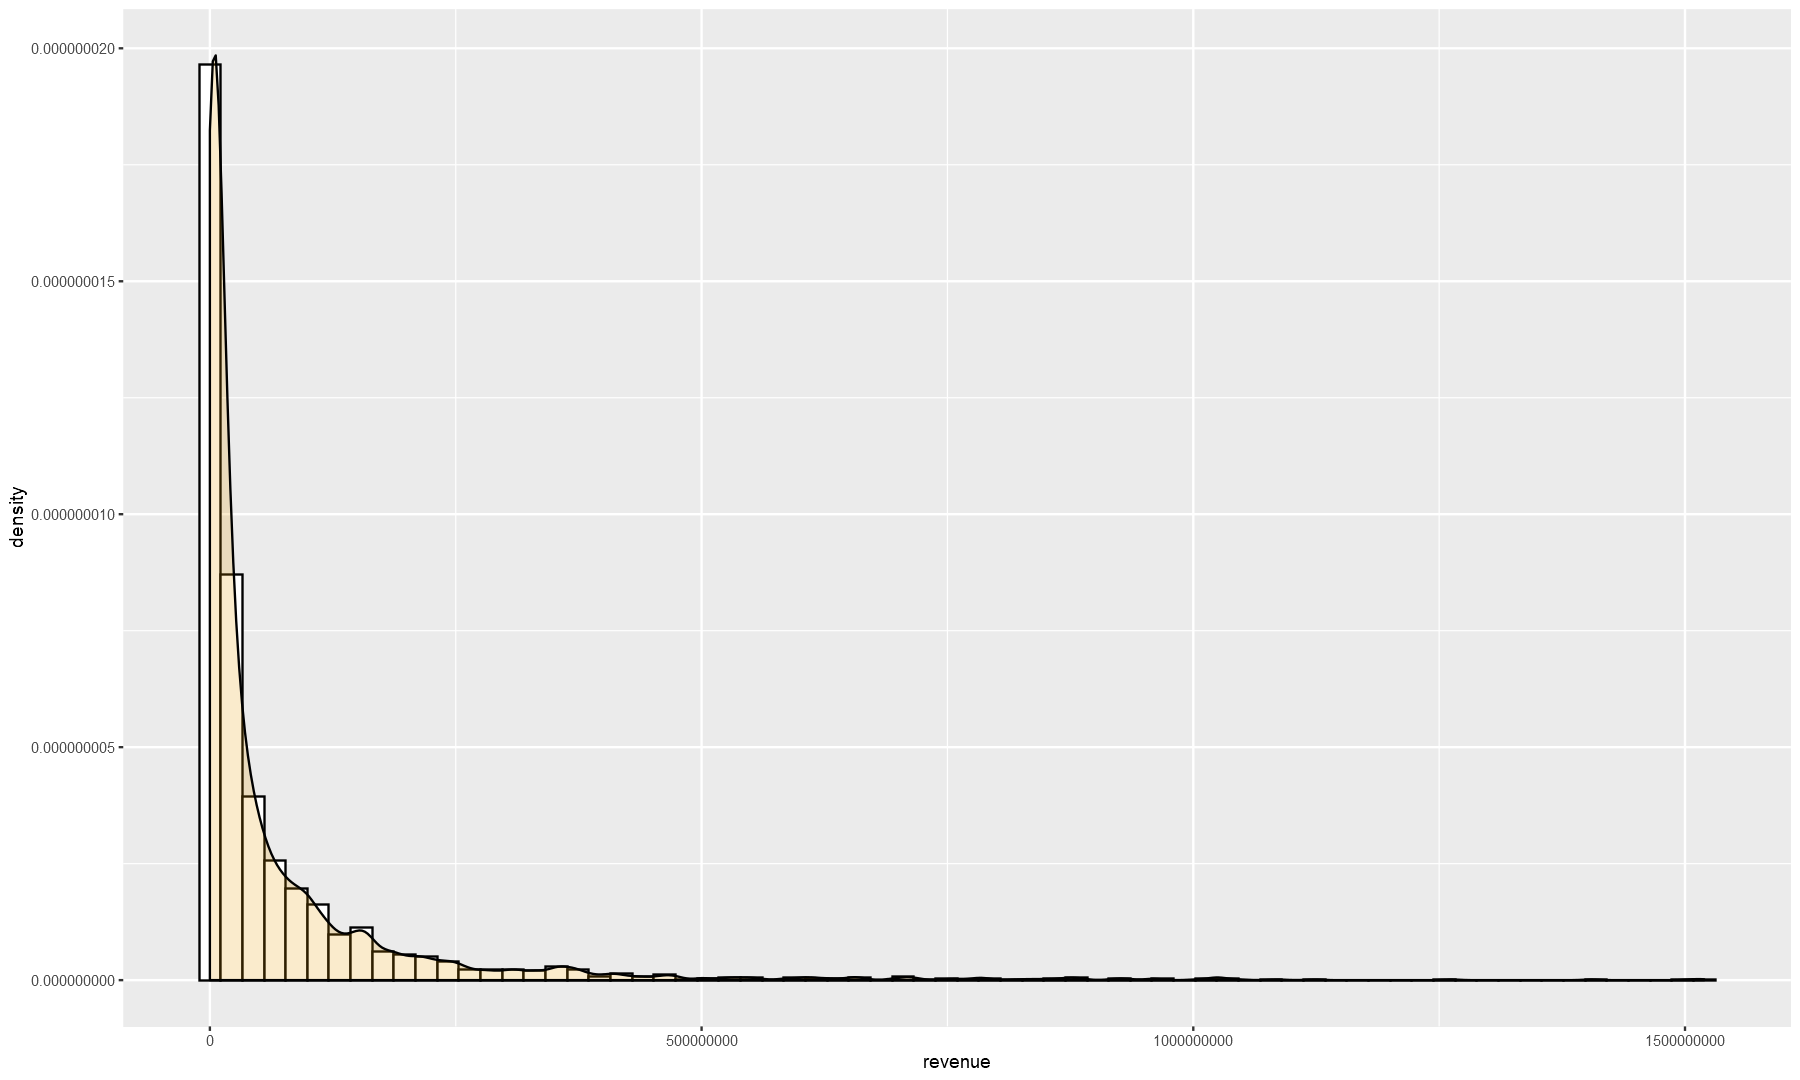

In [348]:
ggplot(movies_ff, aes(x=revenue)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white",bins = 70)+
 geom_density(alpha=0.2, fill="#E69F00") + theme_get()

In [360]:
ggplot(movies_ff, aes(x=log(revenue))) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white",bins = 70)+
 geom_density(alpha=0.2, fill="#E69F00") + theme_get()

Warning message:
"Removed 4382 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."


#### differences between the average revenue by language?

In [361]:
ggplot(data=movies_ff) +
    geom_density(aes(log(revenue), group=original_language, color=original_language))

Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."


In [371]:
plot(movies_ff$revenue ~ movies_ff$original_language)

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"NAs introduced by coercion"
Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"


ERROR: Error in plot.window(...): need finite 'xlim' values


In [370]:
ggplot(data=movies_ff) +
    geom_point(aes(x=sw_lang_en, y=revenue, color = original_language))

Warning message:
"Removed 4382 rows containing missing values (geom_point)."


Warning message:
"Removed 4384 rows containing missing values (geom_point)."


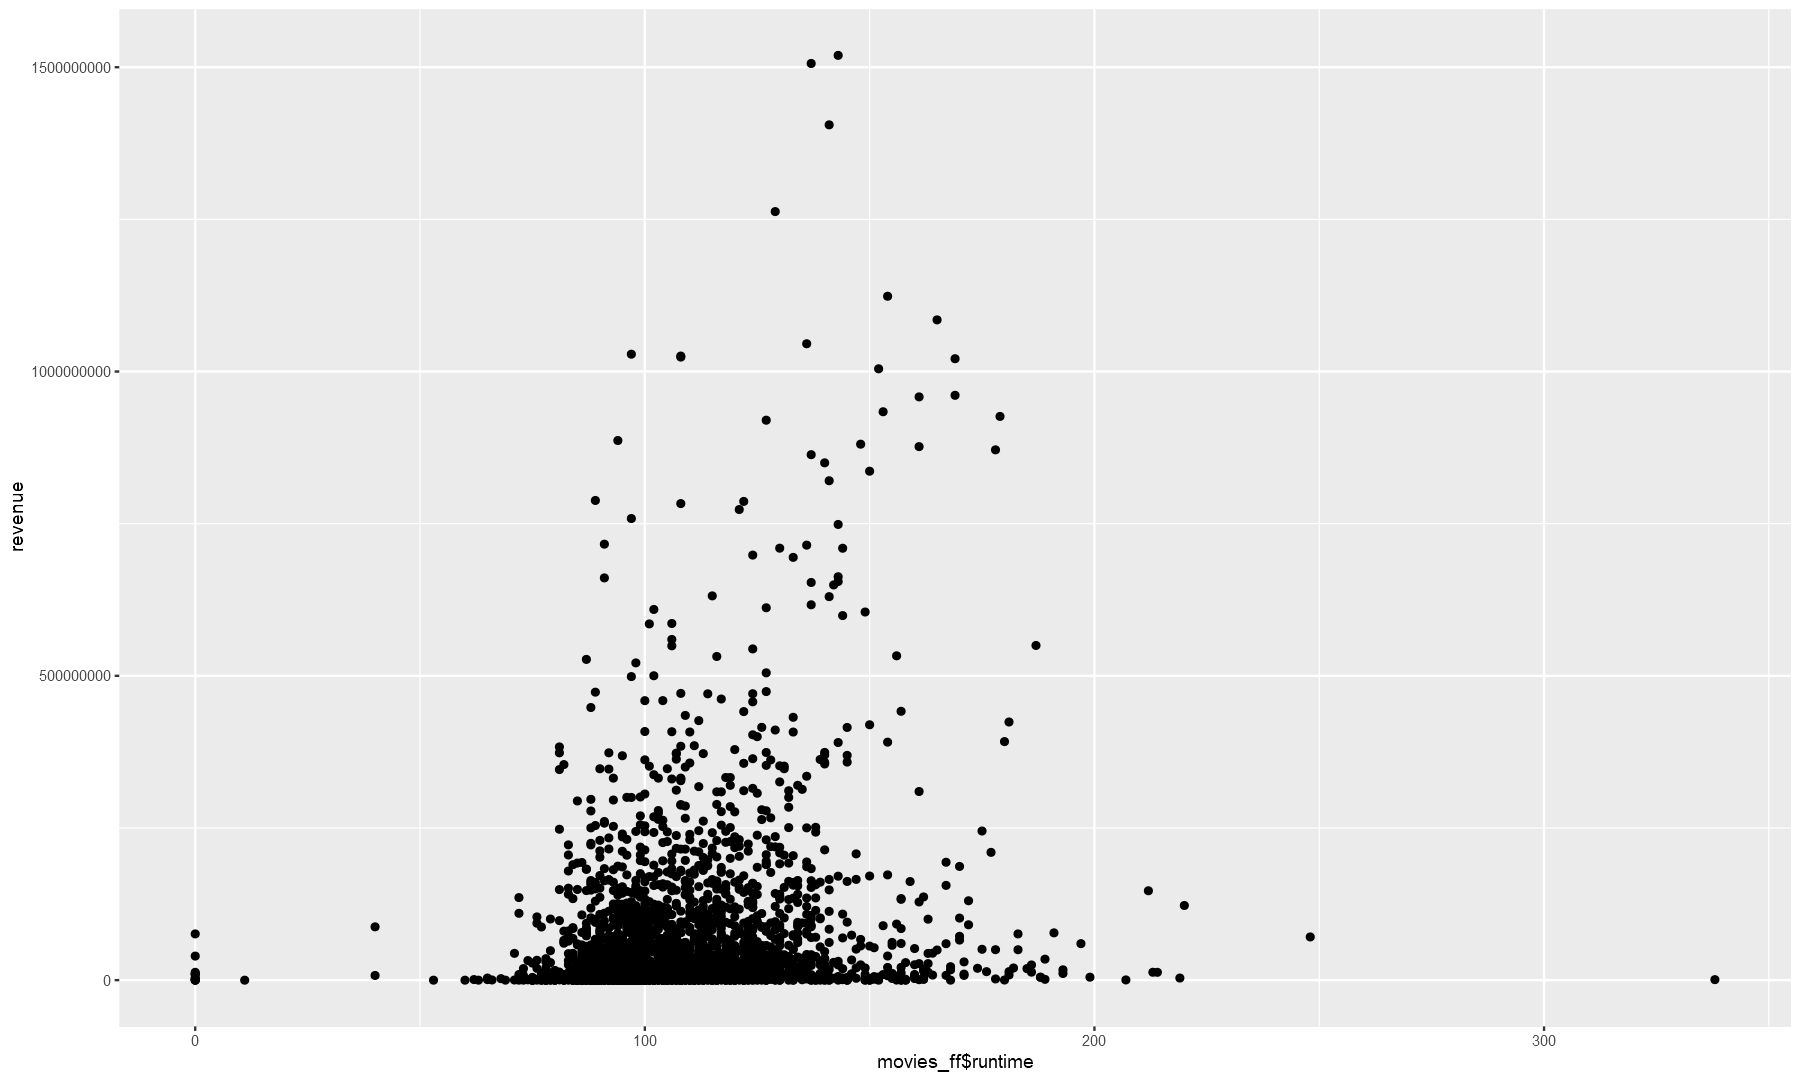

In [368]:
ggplot(data=movies_ff) +
    geom_point(aes(x=movies_ff$runtime, y=revenue))

In [29]:
dbDisconnect(con)